In [1]:
import numpy as np
import scipy.optimize as opt
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib as mpl
from openpyxl.utils.dataframe import dataframe_to_rows
import os
#import xlwt
from openpyxl import load_workbook
import time
import scipy
import math
from scipy.interpolate import interp1d
from scipy import optimize
from scipy.signal import savgol_filter #Smooth
import ast


In [2]:
cm =1/2.54
def fig_pre_def(fx=8, fy=6,lw=1,dpi = 200):
    cm =1/2.54
    plt.rcParams['figure.dpi'] = dpi
    plt.rc('font', family='Helvetica')         # 自型
    plt.rcParams['axes.linewidth'] = lw     # 設置外框的寬度
    return  plt.figure(figsize=(fx*cm,fy*cm))   
    ax = fig.add_subplot(1, 1, 1)
def fig_post_def(xticks =(None,None),yticks =(None,None), 
                 xlim=(None,None),ylim=(None,None),
                 xlabel = None,ylabel=None,
                 title=None,
                 lg_fs = 6,lb_fs = 8, n_col =1,
                 unit = 1/2.54, SVG = False,onefig=True):
    if xticks[0] != None:
        # Edit the major and minor tick locations 設定格線 不指定將由程式自行設定
        ax.xaxis.set_major_locator(mpl.ticker.MultipleLocator(xticks[0]))    
        ax.xaxis.set_minor_locator(mpl.ticker.MultipleLocator(xticks[1]))    
    if yticks[0] != None:
        ax.yaxis.set_major_locator(mpl.ticker.MultipleLocator(yticks[0]))
        ax.yaxis.set_minor_locator(mpl.ticker.MultipleLocator(yticks[1]))
    #plt.rc('xtick', labelsize=fontsize)          # X軸數字的文字大小
    #plt.rc('ytick', labelsize=fontsize)          # Y軸數字的文字大小
    ax.tick_params(axis='x', labelsize= lb_fs)
    ax.tick_params(axis='y', labelsize= lb_fs)
    ax.xaxis.set_tick_params(which='major', size=10*unit, width=1, direction='in', top='on')    # x軸主要格線
    ax.xaxis.set_tick_params(which='minor', size=7*unit, width=1, direction='in', top='on')     # x軸次要格線
    ax.yaxis.set_tick_params(which='major', size=10*unit, width=1, direction='in', right='on')   # y軸主要格線
    ax.yaxis.set_tick_params(which='minor', size=7*unit, width=1, direction='in', right='on')   # y軸次要格線
    new_rc_params = {'text.usetex': False,
        "svg.fonttype": 'none'
        }
    plt.rcParams['axes.linewidth'] = 1     # 設置外框的寬度
    mpl.rcParams.update(new_rc_params)
    if xlim != None:
        ax.set_xlim(xlim)
    if ylim != None:
        ax.set_ylim(ylim)
    if xlabel != None:
        ax.set_xlabel(xlabel,fontsize=lb_fs)
    if ylabel != None:
        ax.set_ylabel(ylabel,fontsize=lb_fs)

    if SVG == True:
        ax.axes.xaxis.set_ticklabels([])
        ax.axes.yaxis.set_ticklabels([])

        new_rc_params = {'text.usetex': False,
        "svg.fonttype": 'none'
        }
        plt.rcParams['axes.linewidth'] = 1     # 設置外框的寬度
        mpl.rcParams.update(new_rc_params)
    if onefig ==True:
        plt.gca().set_position([0, 0, 1, 1])


    plt.legend(fontsize=lg_fs,title=title,title_fontsize=lg_fs,frameon= False,ncol=n_col)
    plt.rcParams['figure.dpi'] = 80
#cm =1/2.54
#fig = fig_pre_def(6,4.5,1)# 圖片大小
#ax = fig.add_subplot(1, 1, 1)          # 產生1x1格圖片、在第一格
#plt.scatter(x,y, alpha=0.6,linewidth=0,s=30*cm,label=' ')
#plt.plot(x,y     ,'--ob',markersize=8*cm,linewidth=3*cm,mew=0,label='point source')
#fig_post_def()
def sorting(input_data, bin_number , lower_range, upper_range):
    hist, edges = np.histogram( #hist 每格裡面統計的數量 edges:每一格的邊界
    input_data, #要分析的矩陣
    bins=bin_number, 
    range=(lower_range, upper_range), #範圍
    density=False) #是否Normalized成百分比
    Bin_center = []
    for i in range(len(edges)-1):
        Bin_center_single = round((edges[i]+edges[i+1])/2,2)
        Bin_center = np.append(Bin_center,Bin_center_single)
    
    return Bin_center, hist

In [3]:
def sorting(input_data, bin_number , lower_range, upper_range):
    hist, edges = np.histogram( #hist 每格裡面統計的數量 edges:每一格的邊界
    input_data, #要分析的矩陣
    bins=bin_number, 
    range=(lower_range, upper_range), #範圍
    density=False) #是否Normalized成百分比
    Bin_center = []
    for i in range(len(edges)-1):
        Bin_center_single = round((edges[i]+edges[i+1])/2,2)
        Bin_center = np.append(Bin_center,Bin_center_single)
    return Bin_center, hist

In [4]:
def bar_plot(input_x,input_y,binning):
    xs = [input_x[0] - binning/2]
    ys = [0]
    for i in range(len(input_x)):
        xs.append(input_x[i] - binning/2)
        xs.append(input_x[i] + binning/2)
        ys.append(input_y[i])
        ys.append(input_y[i])
    xs.append(input_x[-1] + binning/2)
    ys.append(0)
    return np.array(xs),np.array(ys)

In [133]:

data_10MeV=[]
for i in np.arange(0,32,1):
    if i ==0:
        data_10MeV = np.loadtxt("../../../../data/NSTOF_simulation_mono_Energy/Output202404_BERT_HP_simulation_60deg_mono_E_2E9/202404_BERT_C_EJ309_N_scatter_exp_60deg_2E9_All_in_one_1.0MeV_"+str(int(i))+".txt")
    else:
        data_10MeV_temp = np.loadtxt("../../../../data/NSTOF_simulation_mono_Energy/Output202404_BERT_HP_simulation_60deg_mono_E_2E9/202404_BERT_C_EJ309_N_scatter_exp_60deg_2E9_All_in_one_1.0MeV_"+str(int(i))+".txt")
        data_10MeV = np.vstack((data_10MeV,data_10MeV_temp))
        
        #print(data_6MeV.shape)

In [134]:
for i in np.arange(2.0,13.0,1.0):
    print(i)
    for ii in np.arange(0,32,1):
        if ii ==0:
            globals()["data_"+str(int(i*10))+"MeV"]= pd.read_csv("../../../../data/NSTOF_simulation_mono_Energy/Output202404_BERT_HP_simulation_60deg_mono_E_2E9/202404_BERT_C_EJ309_N_scatter_exp_60deg_2E9_All_in_one_"+str(i)+"MeV_"+str(int(ii))+".txt", sep="\s+", header=None)
        else:
            temp = pd.read_csv("../../../../data/NSTOF_simulation_mono_Energy/Output202404_BERT_HP_simulation_60deg_mono_E_2E9/202404_BERT_C_EJ309_N_scatter_exp_60deg_2E9_All_in_one_"+str(i)+"MeV_"+str(int(ii))+".txt", sep="\s+", header=None)
            globals()["data_"+str(int(i*10))+"MeV"] = np.vstack((globals()["data_"+str(int(i*10))+"MeV"],temp))
        

2.0
3.0
4.0
5.0
6.0
7.0
8.0
9.0
10.0
11.0
12.0


In [135]:
for i in np.arange(10,130,10):
    globals()["data_"+str(int(i))+"MeV"] = pd.DataFrame(globals()["data_"+str(int(i))+"MeV"],columns=["core","counts","Tri_LO","Tri_pE","Rec_nE","Rec_LO","Tri_p_num","inelastic","C_LO"])


In [136]:
def Light_output_exponential_method(E):
    A=0.62  #0.817
    B=1.3   #2.63
    C=0.39  #0.297
    D=0.97  #1
    LO =A*E-B*(1-np.exp(-1*C*E**D))
    return LO
def interpolation_function(data_x,data_y,new_x):
    new_y = interp1d(data_x, data_y,fill_value="extrapolate")(new_x)
    return new_y

In [137]:
enegy_range= np.arange(0,13,0.0001)
lightoutput_2inches= Light_output_exponential_method(enegy_range)
print(lightoutput_2inches)

[ 0.00000000e+00 -4.83389860e-06 -6.91372695e-06 ...  6.77170428e+00
  6.77176586e+00  6.77182745e+00]


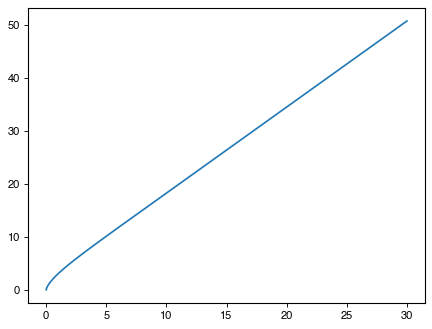

In [138]:
LO_range= np.arange(0,30,0.00001)
P_Energy_inter = interpolation_function(lightoutput_2inches,enegy_range,LO_range)
plt.plot(LO_range,P_Energy_inter)

In [139]:
for i in np.arange(10,130,10):
    globals()["dataE_"+str(int(i))+"MeV"] = globals()["data_"+str(int(i))+"MeV"].copy()
    globals()["dataE_"+str(int(i))+"MeV"]["Recoil_p_E"] = globals()["dataE_"+str(int(i))+"MeV"]['Tri_LO'].apply(lambda x:P_Energy_inter[int(x*100000)])
    globals()["dataE_"+str(int(i))+"MeV"]["Recoil_p_E_diff"] = globals()["dataE_"+str(int(i))+"MeV"]['Recoil_p_E']/globals()["dataE_"+str(int(i))+"MeV"]['Tri_pE']
    globals()["dataE_"+str(int(i))+"MeV"]["Total_E"] = globals()["dataE_"+str(int(i))+"MeV"]['Rec_nE']+globals()["dataE_"+str(int(i))+"MeV"]['Recoil_p_E']
    #print(globals()["dataE_"+str(int(i))+"MeV"].head())

In [140]:
tri_LO_threshold =0.0
rec_LO_threshold =0.0
for i in np.arange(10,130,10):
    globals()["mask_"+str(int(i))+"MeV_scattered_neutron_E"] =  globals()["dataE_"+str(int(i))+"MeV"]['Rec_nE']>0.0
    globals()["mask_"+str(int(i))+"MeV_tri"] =  globals()["dataE_"+str(int(i))+"MeV"]['Tri_LO']>tri_LO_threshold
    globals()["mask_"+str(int(i))+"MeV_rec"] =  globals()["dataE_"+str(int(i))+"MeV"]['Rec_LO']>rec_LO_threshold
    globals()["pro_"+str(int(i))+"MeV"] = globals()["dataE_"+str(int(i))+"MeV"][(globals()["mask_"+str(int(i))+"MeV_tri"]&globals()["mask_"+str(int(i))+"MeV_rec"]&["mask_"+str(int(i))+"MeV_scattered_neutron_E"])]
    

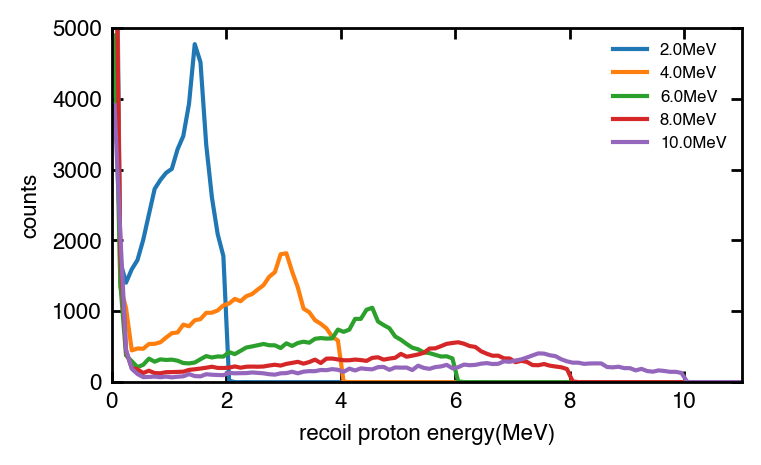

In [141]:
fig = fig_pre_def(8,4.5,1)# 圖片大小
ax = fig.add_subplot(1, 1, 1)          # 產生1x1格圖片、在第一格
for i in np.arange(20,120,20):
    axis,globals()["y_"+str(i)+"MeV"]=sorting(globals()["pro_"+str(int(i))+"MeV"]["Recoil_p_E"] ,120,0,12)
for i in np.arange(20,120,20):
    plt.plot(axis,globals()["y_"+str(i)+"MeV"],label=str(i/10)+"MeV")
fig_post_def(xlim=(0,11),ylim=(0,5000),xlabel="recoil proton energy(MeV)",ylabel="counts")  

fig = fig_pre_def(8,4.5,1)# 圖片大小
ax = fig.add_subplot(1, 1, 1)          # 產生1x1格圖片、在第一格

for i in np.arange(10,130,10):
    mask_diff = globals()["pro_"+str(int(i))+"MeV"]["Tri_p_num"]>0
    globals()["pro_"+str(i)+"MeV_scatter"]=globals()["pro_"+str(int(i))+"MeV"][mask_diff]
    
    axis,globals()["y_"+str(i)+"MeV_eff"]=sorting(globals()["pro_"+str(int(i))+"MeV_scatter"]["Tri_p_num"] ,100,0,100)
    #axis,globals()["y_"+str(i)+"MeV"]=sorting(globals()["pro_"+str(int(i))+"MeV"]["Recoil_p_E"] ,240,0,12)


#for i in np.arange(20,100,30):
i=20
plt.plot(-0.5+axis,globals()["y_"+str(i)+"MeV_eff"],'.-b',label=str(i/10)+"MeV")
#plt.plot(axis,globals()["y_"+str(i)+"MeV_scatter"],'--b',label=str(i/10)+"MeV\nmulti-scattering")
#for i in np.arange(20,100,30):   
i=60
plt.plot(-0.5+axis,globals()["y_"+str(i)+"MeV_eff"],'.-g',label=str(i/10)+"MeV")
#plt.plot(axis,globals()["y_"+str(i)+"MeV_scatter"],'--g',label=str(i/10)+"MeV\nmulti-scattering")
#i=60
#plt.plot(axis,globals()["y_"+str(i)+"MeV"],'r',label=str(i/10)+"MeV")
#plt.plot(axis,globals()["y_"+str(i)+"MeV_scatter"],'--r',label=str(i/10)+"MeV\nmulti-scattering")
i=100
plt.plot(-0.5+axis,globals()["y_"+str(i)+"MeV_eff"],'.-r',label=str(i/10)+"MeV")
#plt.plot(axis,globals()["y_"+str(i)+"MeV_scatter"],'--r',label=str(i/10)+"MeV\nmulti-scattering")
      
fig_post_def(xlim=(0,10),xticks = (2,1)#,ylim=(0,500)
             ,lg_fs=9,n_col =1
             ,xlabel="recoil proton energy (MeV)",ylabel="counts")  
#plt.yscale('log')
#plt.ylim(1,100000)

In [142]:
# 

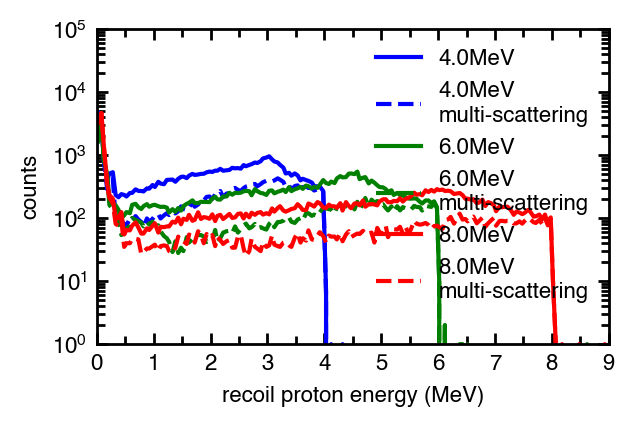

In [143]:
# Recoil proton energy in the trigger detector
fig = fig_pre_def(6.5,4,1)# 圖片大小
ax = fig.add_subplot(1, 1, 1)          # 產生1x1格圖片、在第一格
factor =1
for i in np.arange(10,130,10):
    mask_multi_single_proton = globals()["pro_"+str(int(i))+"MeV"]["Tri_p_num"]==1
    mask_multi_multi_proton_L  = globals()["pro_"+str(int(i))+"MeV"]["Tri_p_num"]>1
    mask_multi_multi_proton_U  = globals()["pro_"+str(int(i))+"MeV"]["Tri_p_num"]<50
    mask_multi_Carbon_proton  = globals()["pro_"+str(int(i))+"MeV"]["Tri_p_num"]==101
    mask_multi_Multi_Carbon_proton  = globals()["pro_"+str(int(i))+"MeV"]["Tri_p_num"]>101
    globals()["pro_"+str(i)+"MeV_SC"]=globals()["pro_"+str(int(i))+"MeV"][mask_multi_single_proton]
    globals()["pro_"+str(i)+"MeV_MS"]=globals()["pro_"+str(int(i))+"MeV"][mask_multi_multi_proton_L]
    globals()["pro_"+str(i)+"MeV_C_SC"]=globals()["pro_"+str(int(i))+"MeV"][mask_multi_Carbon_proton]
    globals()["pro_"+str(i)+"MeV_C_MC"]=globals()["pro_"+str(int(i))+"MeV"][mask_multi_Multi_Carbon_proton]
    

    axis,globals()["y_"+str(i)+"MeV_SC"]=sorting(globals()["pro_"+str(int(i))+"MeV_SC"]["Recoil_p_E"] ,240,0,12)
    axis,globals()["y_"+str(i)+"MeV_MS"]=sorting(globals()["pro_"+str(int(i))+"MeV_MS"]["Recoil_p_E"] ,240,0,12)
    axis,globals()["y_"+str(i)+"MeV_C_SC"]=sorting(globals()["pro_"+str(int(i))+"MeV_C_SC"]["Recoil_p_E"] ,240,0,12)
    axis,globals()["y_"+str(i)+"MeV_C_MC"]=sorting(globals()["pro_"+str(int(i))+"MeV_C_MC"]["Recoil_p_E"] ,240,0,12)
    axis,globals()["y_"+str(i)+"MeV"]=sorting(globals()["pro_"+str(int(i))+"MeV"]["Recoil_p_E"] ,240,0,12)


#for i in np.arange(20,100,30):
i=40
plt.plot(axis,globals()["y_"+str(i)+"MeV"]/factor,'b',label=str(i/10)+"MeV")
plt.plot(axis,globals()["y_"+str(i)+"MeV_MS"]/factor,'--b',label=str(i/10)+"MeV\nmulti-scattering")
#plt.plot(axis,globals()["y_"+str(i)+"MeV_C_SC"]/factor,'--b',label=str(i/10)+"MeV\ncarbon proton")
#plt.plot(axis,globals()["y_"+str(i)+"MeV_C_MC"]/factor,'--b',label=str(i/10)+"MeV\ncarbon multi-scattering")
#for i in np.arange(20,100,30):   
i=60
plt.plot(axis,globals()["y_"+str(i)+"MeV"]/factor,'g',label=str(i/10)+"MeV")
plt.plot(axis,globals()["y_"+str(i)+"MeV_MS"]/factor,'--g',label=str(i/10)+"MeV\nmulti-scattering")
#plt.plot(axis,globals()["y_"+str(i)+"MeV_C_SC"]/factor,'--b',label=str(i/10)+"MeV\ncarbon proton")
#plt.plot(axis,globals()["y_"+str(i)+"MeV_C_MC"]/factor,'--b',label=str(i/10)+"MeV\ncarbon multi-scattering")
#i=60
#plt.plot(axis,globals()["y_"+str(i)+"MeV"],'r',label=str(i/10)+"MeV")
#plt.plot(axis,globals()["y_"+str(i)+"MeV_scatter"],'--r',label=str(i/10)+"MeV\nmulti-scattering")
i=80
plt.plot(axis,globals()["y_"+str(i)+"MeV"]/factor,'r',label=str(i/10)+"MeV")
plt.plot(axis,globals()["y_"+str(i)+"MeV_MS"]/factor,'--r',label=str(i/10)+"MeV\nmulti-scattering")
#plt.plot(axis,globals()["y_"+str(i)+"MeV_C_SC"]/factor,'--b',label=str(i/10)+"MeV\ncarbon proton")
#plt.plot(axis,globals()["y_"+str(i)+"MeV_C_MC"]/factor,'--b',label=str(i/10)+"MeV\ncarbon multi-scattering")
      
fig_post_def(xlim=(0,9),xticks = (1,0.5)#,ylim=(0,500)
             ,ylim=(0,2500/factor),yticks = (500/factor,250/factor)
             ,lg_fs=8,n_col =1
             ,xlabel="recoil proton energy (MeV)",ylabel=r"counts")  
plt.yscale('log')
plt.ylim(1,100000)
plt.savefig('/Users/thlin/Dropbox/Research/Publication/2023 NSTOF/Figure/Python_export/Fig3_simulation_recoil_proton_E.svg', format="svg")


(0.0, 500.0)

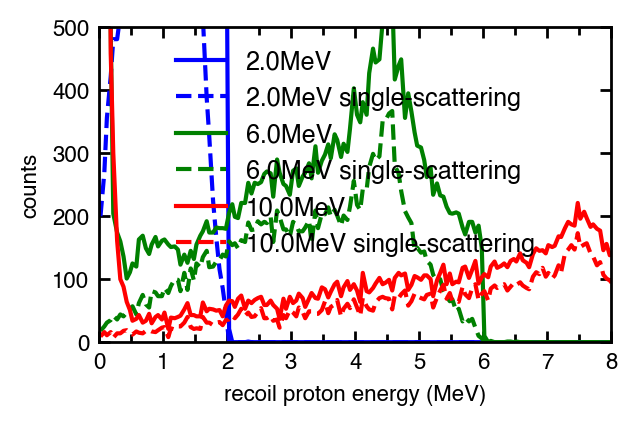

In [144]:
# Recoil proton energy in the trigger detector
fig = fig_pre_def(6.5,4,1)# 圖片大小
ax = fig.add_subplot(1, 1, 1)          # 產生1x1格圖片、在第一格

for i in np.arange(10,130,10):
    mask_diff = globals()["pro_"+str(int(i))+"MeV"]["Tri_p_num"]>1
    globals()["pro_"+str(i)+"MeV_scatter"]=globals()["pro_"+str(int(i))+"MeV"][mask_diff]
    
    axis,globals()["y_"+str(i)+"MeV_scatter"]=sorting(globals()["pro_"+str(int(i))+"MeV_scatter"]["Recoil_p_E"] ,240,0,12)
    axis,globals()["y_"+str(i)+"MeV"]=sorting(globals()["pro_"+str(int(i))+"MeV"]["Recoil_p_E"] ,240,0,12)

    
#for i in np.arange(20,100,30):
i=20
plt.plot(axis,globals()["y_"+str(i)+"MeV"],'b',label=str(i/10)+"MeV")
plt.plot(axis,globals()["y_"+str(i)+"MeV"]-globals()["y_"+str(i)+"MeV_scatter"],'--b',label=str(i/10)+"MeV single-scattering")

#for i in np.arange(20,100,30):   
i=60
plt.plot(axis,globals()["y_"+str(i)+"MeV"],'g',label=str(i/10)+"MeV")
plt.plot(axis,globals()["y_"+str(i)+"MeV"]-globals()["y_"+str(i)+"MeV_scatter"],'--g',label=str(i/10)+"MeV single-scattering")
#i=60
#plt.plot(axis,globals()["y_"+str(i)+"MeV"],'r',label=str(i/10)+"MeV")
#plt.plot(axis,globals()["y_"+str(i)+"MeV_scatter"],'--r',label=str(i/10)+"MeV\nmulti-scattering")
i=100
plt.plot(axis,globals()["y_"+str(i)+"MeV"],'r',label=str(i/10)+"MeV")
plt.plot(axis,globals()["y_"+str(i)+"MeV"]-globals()["y_"+str(i)+"MeV_scatter"],'--r',label=str(i/10)+"MeV single-scattering")
      
fig_post_def(xlim=(0,8),xticks = (1,0.5)#,ylim=(0,500)
             ,lg_fs=9,n_col =1
             ,xlabel="recoil proton energy (MeV)",ylabel="counts")  
#plt.yscale('log')
plt.ylim(0,500)

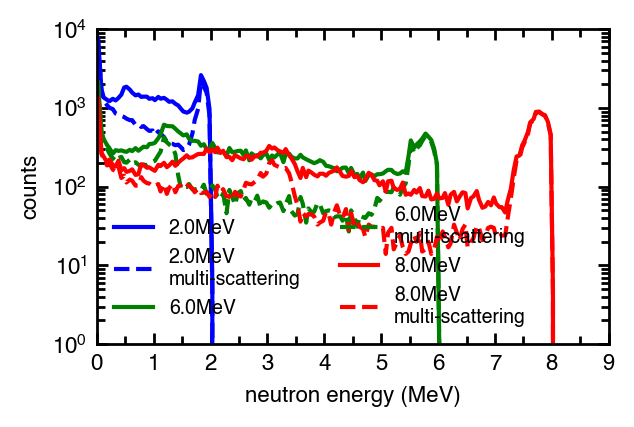

In [145]:
# Neutron energy on the recording detector
fig = fig_pre_def(6.5,4,1)# 圖片大小
ax = fig.add_subplot(1, 1, 1)          # 產生1x1格圖片、在第一格

factor =1
for i in np.arange(10,130,10):
    mask_multi_single_proton = globals()["pro_"+str(int(i))+"MeV"]["Tri_p_num"]==1
    mask_multi_multi_proton_L  = globals()["pro_"+str(int(i))+"MeV"]["Tri_p_num"]>1
    mask_multi_multi_proton_U  = globals()["pro_"+str(int(i))+"MeV"]["Tri_p_num"]<50
    mask_multi_Carbon_proton  = globals()["pro_"+str(int(i))+"MeV"]["Tri_p_num"]==101
    mask_multi_Multi_Carbon_proton  = globals()["pro_"+str(int(i))+"MeV"]["Tri_p_num"]>101
    globals()["pro_"+str(i)+"MeV_SC"]=globals()["pro_"+str(int(i))+"MeV"][mask_multi_single_proton]
    globals()["pro_"+str(i)+"MeV_MS"]=globals()["pro_"+str(int(i))+"MeV"][mask_multi_multi_proton_L]
    globals()["pro_"+str(i)+"MeV_C_SC"]=globals()["pro_"+str(int(i))+"MeV"][mask_multi_Carbon_proton]
    globals()["pro_"+str(i)+"MeV_C_MC"]=globals()["pro_"+str(int(i))+"MeV"][mask_multi_Multi_Carbon_proton]
    

    axis,globals()["y_"+str(i)+"MeV_SC"]=sorting(globals()["pro_"+str(int(i))+"MeV_SC"]['Rec_nE'] ,240,0,12)
    axis,globals()["y_"+str(i)+"MeV_MS"]=sorting(globals()["pro_"+str(int(i))+"MeV_MS"]["Rec_nE"] ,240,0,12)
    axis,globals()["y_"+str(i)+"MeV_C_SC"]=sorting(globals()["pro_"+str(int(i))+"MeV_C_SC"]["Rec_nE"] ,240,0,12)
    axis,globals()["y_"+str(i)+"MeV_C_MC"]=sorting(globals()["pro_"+str(int(i))+"MeV_C_MC"]["Rec_nE"] ,240,0,12)
    axis,globals()["y_"+str(i)+"MeV"]=sorting(globals()["pro_"+str(int(i))+"MeV"]["Rec_nE"] ,240,0,12)


#for i in np.arange(20,100,30):
i=20
plt.plot(axis,globals()["y_"+str(i)+"MeV"]/factor,'b',label=str(i/10)+"MeV")
plt.plot(axis,globals()["y_"+str(i)+"MeV_MS"]/factor,'--b',label=str(i/10)+"MeV\nmulti-scattering")
#plt.plot(axis,globals()["y_"+str(i)+"MeV_C_SC"]/factor,'--b',label=str(i/10)+"MeV\ncarbon proton")
#plt.plot(axis,globals()["y_"+str(i)+"MeV_C_MC"]/factor,'--b',label=str(i/10)+"MeV\ncarbon multi-scattering")
#for i in np.arange(20,100,30):   
i=60
plt.plot(axis,globals()["y_"+str(i)+"MeV"]/factor,'g',label=str(i/10)+"MeV")
plt.plot(axis,globals()["y_"+str(i)+"MeV_MS"]/factor,'--g',label=str(i/10)+"MeV\nmulti-scattering")
#plt.plot(axis,globals()["y_"+str(i)+"MeV_C_SC"]/factor,'--b',label=str(i/10)+"MeV\ncarbon proton")
#plt.plot(axis,globals()["y_"+str(i)+"MeV_C_MC"]/factor,'--b',label=str(i/10)+"MeV\ncarbon multi-scattering")
#i=60
#plt.plot(axis,globals()["y_"+str(i)+"MeV"],'r',label=str(i/10)+"MeV")
#plt.plot(axis,globals()["y_"+str(i)+"MeV_scatter"],'--r',label=str(i/10)+"MeV\nmulti-scattering")
i=80
plt.plot(axis,globals()["y_"+str(i)+"MeV"]/factor,'r',label=str(i/10)+"MeV")
plt.plot(axis,globals()["y_"+str(i)+"MeV_MS"]/factor,'--r',label=str(i/10)+"MeV\nmulti-scattering")
#plt.plot(axis,globals()["y_"+str(i)+"MeV_C_SC"]/factor,'--b',label=str(i/10)+"MeV\ncarbon proton")
#plt.plot(axis,globals()["y_"+str(i)+"MeV_C_MC"]/factor,'--b',label=str(i/10)+"MeV\ncarbon multi-scattering")

fig_post_def(xlim=(0,9),xticks = (1,0.5)#,ylim=(0,500)
             ,lg_fs=7,n_col =2
             ,xlabel="neutron energy (MeV)",ylabel="counts")  
plt.yscale('log')
plt.ylim(1,10000)
plt.savefig('/Users/thlin/Dropbox/Research/Publication/2023 NSTOF/Figure/Python_export/Fig3_simulation_neutron_E.svg', format="svg")


In [146]:
def gaussian(x, A,x0,sigma):
    return A * np.exp(-(x - x0) ** 2 / (2 * sigma ** 2))

def ER_function_improve(x,LO,A,a,b,c): #20240225THL
    Gaussian_distribution = np.zeros(len(x))
    for LO_i, A_i in zip(LO,A):
        delta_E = ((a**2)*(LO_i**2)+((b**2)*LO_i)+c**2)**0.5
        sigma_ER = delta_E/2.355
        Gaussian_distribution_temp = gaussian(x,1,LO_i,sigma_ER)
        G_sum = sum(Gaussian_distribution_temp)
        if Gaussian_distribution_temp[0]>0:
            Gaussian_distribution_temp_with_negtive = gaussian((x+(x[0]-x[-1])/2),1,LO_i,sigma_ER)# shift hallf to construct the gaussin below zero
            G_sum =sum(Gaussian_distribution_temp_with_negtive)
        #if (G_sum <= 1):
        #    G_sum =1
        Gaussian_distribution  += A_i*Gaussian_distribution_temp/G_sum
        #plt.plot(x,A_i*Gaussian_distribution_temp/G_sum)
    return Gaussian_distribution



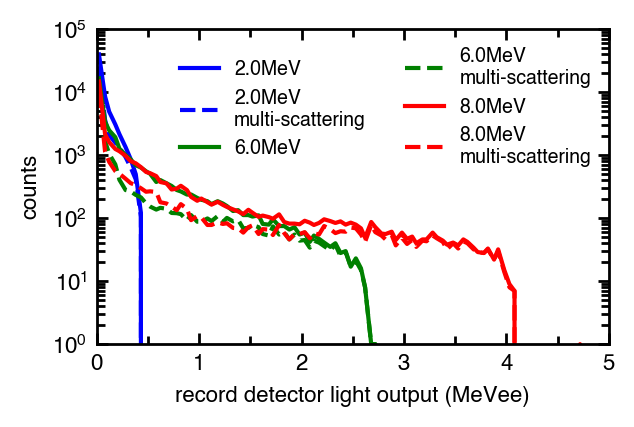

In [147]:
fig = fig_pre_def(6.5,4,1)# 圖片大小
ax = fig.add_subplot(1, 1, 1)          # 產生1x1格圖片、在第一格

for i in np.arange(10,130,10):
    mask_diff = globals()["pro_"+str(int(i))+"MeV"]["Tri_p_num"]>1
    globals()["pro_"+str(i)+"MeV_scatter"]=globals()["pro_"+str(int(i))+"MeV"][mask_diff]
    
    axis,globals()["y_"+str(i)+"MeV_scatter"]=sorting(globals()["pro_"+str(int(i))+"MeV_scatter"]["Rec_LO"] ,240,0,12)
    axis,globals()["y_"+str(i)+"MeV"]=sorting(globals()["pro_"+str(int(i))+"MeV"]["Rec_LO"] ,240,0,12)
    globals()["y_"+str(i)+"MeV_LO"]         = ER_function_improve(axis,axis,globals()["y_"+str(i)+"MeV"],0.113,0.065,0.06)#,3.245e-02 , 5.701e-02 , 1.084e-01)
    globals()["y_"+str(i)+"MeV_scatter_LO"] = ER_function_improve(axis,axis,globals()["y_"+str(i)+"MeV_scatter"],0.113,0.065,0.06)#,3.245e-02 , 5.701e-02 , 1.084e-01)
    
#for i in np.arange(20,100,30):
i=20
plt.plot(axis,globals()["y_"+str(i)+"MeV"],'b',label=str(i/10)+"MeV")
plt.plot(axis,globals()["y_"+str(i)+"MeV_scatter"],'--b',label=str(i/10)+"MeV\nmulti-scattering")
#plt.plot(axis,globals()["y_"+str(i)+"MeV_LO"],'b',label=str(i/10)+"MeV")
#plt.plot(axis,globals()["y_"+str(i)+"MeV_scatter_LO"],'--b',label=str(i/10)+"MeV\nmulti-scattering")
 
i=60
#plt.plot(axis,globals()["y_"+str(i)+"MeV_LO"],'g',alpha = 0.7,label=str(i/10)+"MeV")
#plt.plot(axis,globals()["y_"+str(i)+"MeV_scatter_LO"],'--g',label=str(i/10)+"MeV\nmulti-scattering")
plt.plot(axis,globals()["y_"+str(i)+"MeV"],'g',label=str(i/10)+"MeV")
plt.plot(axis,globals()["y_"+str(i)+"MeV_scatter"],'--g',label=str(i/10)+"MeV\nmulti-scattering")

i=80
plt.plot(axis,globals()["y_"+str(i)+"MeV"],'r',label=str(i/10)+"MeV")
plt.plot(axis,globals()["y_"+str(i)+"MeV_scatter"],'--r',label=str(i/10)+"MeV\nmulti-scattering")
#plt.plot(axis,globals()["y_"+str(i)+"MeV_LO"],'r',label=str(i/10)+"MeV")
#plt.plot(axis,globals()["y_"+str(i)+"MeV_scatter_LO"],'--r',label=str(i/10)+"MeV\nmulti-scattering")
      
fig_post_def(xlim=(0,5),xticks = (1,0.5)#,ylim=(0,500)
             ,lg_fs=7,n_col =2
             
             ,xlabel="record detector light output (MeVee)",ylabel="counts")  
plt.yscale('log')
plt.ylim(1,100000)
plt.savefig('/Users/thlin/Dropbox/Research/Publication/2023 NSTOF/Figure/Python_export/Fig3_rec_LO.svg', format="svg")

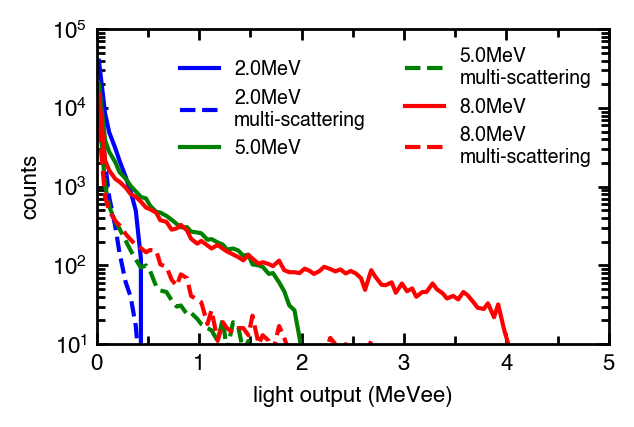

In [148]:
fig = fig_pre_def(6.5,4,1)# 圖片大小
#fig = fig_pre_def(7.5,3,1)# 圖片大小
ax = fig.add_subplot(1, 1, 1)          # 產生1x1格圖片、在第一格

factor =1
for i in np.arange(10,130,10):
    mask_multi_single_proton              = globals()["pro_"+str(int(i))+"MeV"]["Tri_p_num"]==1
    mask_multi_multi_proton_L             = globals()["pro_"+str(int(i))+"MeV"]["Tri_p_num"]>1
    mask_multi_multi_proton_U             = globals()["pro_"+str(int(i))+"MeV"]["Tri_p_num"]<50
    mask_multi_Carbon_proton              = globals()["pro_"+str(int(i))+"MeV"]["Tri_p_num"]==101
    mask_multi_Multi_Carbon_proton        = globals()["pro_"+str(int(i))+"MeV"]["Tri_p_num"]>101
    mask_multi_inelasitc                  = globals()["pro_"+str(int(i))+"MeV"]["inelastic"]==1
    globals()["pro_"+str(i)+"MeV"]     =globals()["pro_"+str(int(i))+"MeV"]
    globals()["pro_"+str(i)+"MeV_except_SC"]     =globals()["pro_"+str(int(i))+"MeV"][mask_multi_multi_proton_L&mask_multi_multi_proton_U|mask_multi_Multi_Carbon_proton|mask_multi_inelasitc]
    globals()["pro_"+str(i)+"MeV_MS"]     =globals()["pro_"+str(int(i))+"MeV"][mask_multi_multi_proton_L&mask_multi_multi_proton_U]
    globals()["pro_"+str(i)+"MeV_C_SC"]   =globals()["pro_"+str(int(i))+"MeV"][mask_multi_Carbon_proton]
    globals()["pro_"+str(i)+"MeV_C_MC"]   =globals()["pro_"+str(int(i))+"MeV"][mask_multi_Multi_Carbon_proton&mask_multi_multi_proton_L&mask_multi_multi_proton_U]
    globals()["pro_"+str(i)+"MeV_proton"]     =globals()["pro_"+str(int(i))+"MeV"][mask_multi_multi_proton_U]
    globals()["pro_"+str(i)+"MeV_carbon"]     =globals()["pro_"+str(int(i))+"MeV"][mask_multi_Carbon_proton | mask_multi_Multi_Carbon_proton]
    
    axis,globals()["y_"+str(i)+"MeV"]     =sorting(globals()["pro_"+str(int(i))+"MeV"]["Rec_LO"] ,240,0,12)
    axis,globals()["y_"+str(i)+"MeV_except_SC"]     =sorting(globals()["pro_"+str(int(i))+"MeV_except_SC"]["Rec_LO"] ,240,0,12)
    axis,globals()["y_"+str(i)+"MeV_SC"]  =sorting(globals()["pro_"+str(int(i))+"MeV_SC"]['Rec_LO'] ,240,0,12)
    axis,globals()["y_"+str(i)+"MeV_MS"]  =sorting(globals()["pro_"+str(int(i))+"MeV_MS"]["Rec_LO"] ,240,0,12)
    axis,globals()["y_"+str(i)+"MeV_C_SC"]=sorting(globals()["pro_"+str(int(i))+"MeV_C_SC"]["Rec_LO"] ,240,0,12)
    axis,globals()["y_"+str(i)+"MeV_C_MC"]=sorting(globals()["pro_"+str(int(i))+"MeV_C_MC"]["Rec_LO"] ,240,0,12)
    axis,globals()["y_"+str(i)+"MeV_proton"]=sorting(globals()["pro_"+str(int(i))+"MeV_proton"]["Rec_LO"] ,240,0,12)
    axis,globals()["y_"+str(i)+"MeV_carbon"]=sorting(globals()["pro_"+str(int(i))+"MeV_carbon"]["Rec_LO"] ,240,0,12)

    globals()["y_"+str(i)+"MeV_LO"]      = ER_function_improve(axis,axis,globals()["y_"+str(i)+"MeV"],0.113,0.065,0.06)#,3.245e-02 , 5.701e-02 , 1.084e-01)
    globals()["y_"+str(i)+"MeV_SC_LO"]   = ER_function_improve(axis,axis,globals()["y_"+str(i)+"MeV_SC"],0.113,0.065,0.06)#,3.245e-02 , 5.701e-02 , 1.084e-01)
    globals()["y_"+str(i)+"MeV_MC_LO"]   = ER_function_improve(axis,axis,globals()["y_"+str(i)+"MeV_MS"],0.113,0.065,0.06)#,3.245e-02 , 5.701e-02 , 1.084e-01)
    globals()["y_"+str(i)+"MeV_C_SC_LO"] = ER_function_improve(axis,axis,globals()["y_"+str(i)+"MeV_C_SC"],0.113,0.065,0.06)#,3.245e-02 , 5.701e-02 , 1.084e-01)
    globals()["y_"+str(i)+"MeV_C_MC_LO"] = ER_function_improve(axis,axis,globals()["y_"+str(i)+"MeV_C_MC"],0.113,0.065,0.06)#,3.245e-02 , 5.701e-02 , 1.084e-01)
    globals()["y_"+str(i)+"MeV_proton_LO"] = ER_function_improve(axis,axis,globals()["y_"+str(i)+"MeV_proton"],0.113,0.065,0.06)#,3.245e-02 , 5.701e-02 , 1.084e-01)
    globals()["y_"+str(i)+"MeV_carbon_LO"] = ER_function_improve(axis,axis,globals()["y_"+str(i)+"MeV_carbon"],0.113,0.065,0.06)#,3.245e-02 , 5.701e-02 , 1.084e-01)

#for i in np.arange(20,100,30):
i=20
plt.plot(axis,globals()["y_"+str(i)+"MeV"]/factor,'b',label=str(i/10)+"MeV")
plt.plot(axis,globals()["y_"+str(i)+"MeV_except_SC"]/factor,'--b',label=str(i/10)+"MeV\nmulti-scattering")
#plt.plot(axis,globals()["y_"+str(i)+"MeV_SC"]/factor,'b',label=str(i/10)+"MeV")
#plt.plot(axis,globals()["y_"+str(i)+"MeV_MS"]/factor,'--b',label=str(i/10)+"MeV\nmulti-scattering")
#plt.plot(axis,globals()["y_"+str(i)+"MeV_C_SC"]/factor,'--b',label=str(i/10)+"MeV\ncarbon proton")
#plt.plot(axis,globals()["y_"+str(i)+"MeV_C_MC"]/factor,'--b',label=str(i/10)+"MeV\ncarbon multi-scattering")
#for i in np.arange(20,100,30):   
i=50
plt.plot(axis,globals()["y_"+str(i)+"MeV"]/factor,'g',label=str(i/10)+"MeV")
plt.plot(axis,globals()["y_"+str(i)+"MeV_except_SC"]/factor,'--g',label=str(i/10)+"MeV\nmulti-scattering")
#plt.plot(axis,globals()["y_"+str(i)+"MeV_MS"]/factor,'--b',label=str(i/10)+"MeV\nmulti-scattering")
#plt.plot(axis,globals()["y_"+str(i)+"MeV_proton"]/factor,'b',label=str(i/10)+"MeV\nproton")
#plt.plot(axis,globals()["y_"+str(i)+"MeV_carbon"]/factor,'--b',label=str(i/10)+"MeV\ncarbon")
#plt.plot(axis,globals()["y_"+str(i)+"MeV_C_SC"]/factor,'--b',label=str(i/10)+"MeV\ncarbon proton")
#plt.plot(axis,globals()["y_"+str(i)+"MeV_C_MC"]/factor,'--b',label=str(i/10)+"MeV\ncarbon multi-scattering")
#i=60
#plt.plot(axis,globals()["y_"+str(i)+"MeV"],'r',label=str(i/10)+"MeV")
#plt.plot(axis,globals()["y_"+str(i)+"MeV_scatter"],'--r',label=str(i/10)+"MeV\nmulti-scattering")
i=80
plt.plot(axis,globals()["y_"+str(i)+"MeV"]/factor,'r',label=str(i/10)+"MeV")
plt.plot(axis,globals()["y_"+str(i)+"MeV_except_SC"]/factor,'--r',label=str(i/10)+"MeV\nmulti-scattering")
#plt.plot(axis,globals()["y_"+str(i)+"MeV_MS"]+globals()["y_"+str(i)+"MeV_SC"]/factor,'r',label=str(i/10)+"MeV")
#plt.plot(axis,globals()["y_"+str(i)+"MeV_MS"]/factor,'--r',label=str(i/10)+"MeV\nmulti-scattering")
#plt.plot(axis,globals()["y_"+str(i)+"MeV_proton"]/factor,'r',label=str(i/10)+"MeV\nproton")
#plt.plot(axis,globals()["y_"+str(i)+"MeV_carbon"]/factor,'--r',label=str(i/10)+"MeV\ncarbon")
#plt.plot(axis,globals()["y_"+str(i)+"MeV_C_SC"]/factor,'--b',label=str(i/10)+"MeV\ncarbon proton")
#plt.plot(axis,globals()["y_"+str(i)+"MeV_C_MC"]/factor,'--b',label=str(i/10)+"MeV\ncarbon multi-scattering")
      
fig_post_def(xlim=(0,5),xticks = (1,0.5)#,ylim=(0,500)
             ,lg_fs=7,n_col =2
             
             ,xlabel="light output (MeVee)",ylabel="counts")  
plt.yscale('log')
plt.ylim(10,100000)
plt.savefig('/Users/thlin/Dropbox/Research/Publication/2023 NSTOF/Figure/Python_export/Fig3_rec_LO.svg', format="svg")

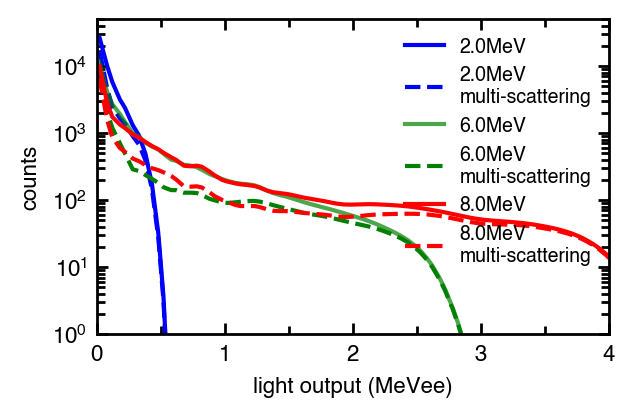

In [149]:
fig = fig_pre_def(6.5,4,1)# 圖片大小
ax = fig.add_subplot(1, 1, 1)          # 產生1x1格圖片、在第一格

for i in np.arange(10,130,10):
    mask_diff = globals()["pro_"+str(int(i))+"MeV"]["Tri_p_num"]>1
    globals()["pro_"+str(i)+"MeV_scatter"]=globals()["pro_"+str(int(i))+"MeV"][mask_diff]
    
    axis,globals()["y_"+str(i)+"MeV_scatter"]=sorting(globals()["pro_"+str(int(i))+"MeV_scatter"]["Rec_LO"] ,240,0,12)
    axis,globals()["y_"+str(i)+"MeV"]=sorting(globals()["pro_"+str(int(i))+"MeV"]["Rec_LO"] ,240,0,12)
    globals()["y_"+str(i)+"MeV_LO"]         = ER_function_improve(axis,axis,globals()["y_"+str(i)+"MeV"],0.113,0.065,0.06)#,3.245e-02 , 5.701e-02 , 1.084e-01)
    globals()["y_"+str(i)+"MeV_scatter_LO"] = ER_function_improve(axis,axis,globals()["y_"+str(i)+"MeV_scatter"],0.113,0.065,0.06)#,3.245e-02 , 5.701e-02 , 1.084e-01)
    
#for i in np.arange(20,100,30):
i=20
#plt.plot(axis,globals()["y_"+str(i)+"MeV"],'b',label=str(i/10)+"MeV")
#plt.plot(axis,globals()["y_"+str(i)+"MeV_scatter"],'--c',label=str(i/10)+"MeV\nmulti-scattering")
plt.plot(axis,globals()["y_"+str(i)+"MeV_LO"],'b',label=str(i/10)+"MeV")
plt.plot(axis,globals()["y_"+str(i)+"MeV_scatter_LO"],'--b',label=str(i/10)+"MeV\nmulti-scattering")
 
i=60
plt.plot(axis,globals()["y_"+str(i)+"MeV_LO"],'g',alpha = 0.7,label=str(i/10)+"MeV")
plt.plot(axis,globals()["y_"+str(i)+"MeV_scatter_LO"],'--g',label=str(i/10)+"MeV\nmulti-scattering")
#i=60
#plt.plot(axis,globals()["y_"+str(i)+"MeV"],'r',label=str(i/10)+"MeV")
#plt.plot(axis,globals()["y_"+str(i)+"MeV_scatter"],'--r',label=str(i/10)+"MeV\nmulti-scattering")
i=80
plt.plot(axis,globals()["y_"+str(i)+"MeV_LO"],'r',label=str(i/10)+"MeV")
plt.plot(axis,globals()["y_"+str(i)+"MeV_scatter_LO"],'--r',label=str(i/10)+"MeV\nmulti-scattering")
      
fig_post_def(xlim=(0,4),xticks = (1,0.5)#,ylim=(0,500)
             ,lg_fs=7,n_col =1
             
             ,xlabel="light output (MeVee)",ylabel="counts")  
plt.yscale('log')
plt.ylim(1,50000)
plt.savefig('/Users/thlin/Dropbox/Research/Publication/2023 NSTOF/Figure/Python_export/Fig3_rec_LO.svg', format="svg")

(1, 50000)

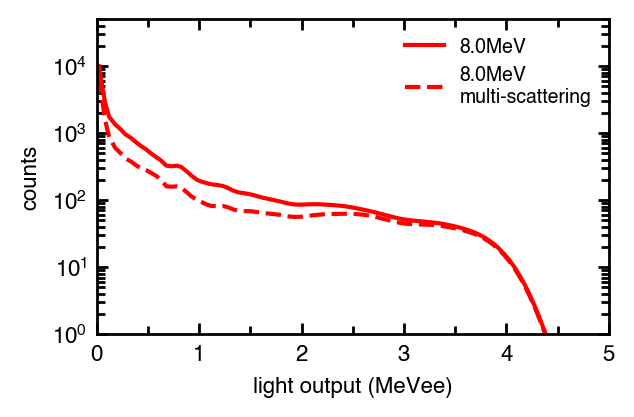

In [150]:
fig = fig_pre_def(6.5,4,1)# 圖片大小
ax = fig.add_subplot(1, 1, 1)          # 產生1x1格圖片、在第一格

for i in np.arange(10,130,10):
    mask_diff = globals()["pro_"+str(int(i))+"MeV"]["Tri_p_num"]>1
    globals()["pro_"+str(i)+"MeV_scatter"]=globals()["pro_"+str(int(i))+"MeV"][mask_diff]
    
    axis,globals()["y_"+str(i)+"MeV_scatter"]=sorting(globals()["pro_"+str(int(i))+"MeV_scatter"]["Rec_LO"] ,240,0,12)
    axis,globals()["y_"+str(i)+"MeV"]=sorting(globals()["pro_"+str(int(i))+"MeV"]["Rec_LO"] ,240,0,12)
    globals()["y_"+str(i)+"MeV_LO"]         = ER_function_improve(axis,axis,globals()["y_"+str(i)+"MeV"],0.113,0.065,0.06)#,3.245e-02 , 5.701e-02 , 1.084e-01)
    globals()["y_"+str(i)+"MeV_scatter_LO"] = ER_function_improve(axis,axis,globals()["y_"+str(i)+"MeV_scatter"],0.113,0.065,0.06)#,3.245e-02 , 5.701e-02 , 1.084e-01)
    
#for i in np.arange(20,100,30):
#i=20
#plt.plot(axis,globals()["y_"+str(i)+"MeV"],'b',label=str(i/10)+"MeV")
#plt.plot(axis,globals()["y_"+str(i)+"MeV_scatter"],'--c',label=str(i/10)+"MeV\nmulti-scattering")
#plt.plot(axis,globals()["y_"+str(i)+"MeV_LO"],'b',label=str(i/10)+"MeV")
#plt.plot(axis,globals()["y_"+str(i)+"MeV_scatter_LO"],'--b',label=str(i/10)+"MeV\nmulti-scattering")
 
#i=50
#plt.plot(axis,globals()["y_"+str(i)+"MeV_LO"],'g',alpha = 0.7,label=str(i/10)+"MeV")
#plt.plot(axis,globals()["y_"+str(i)+"MeV_scatter_LO"],'--g',label=str(i/10)+"MeV\nmulti-scattering")
#i=60
#plt.plot(axis,globals()["y_"+str(i)+"MeV"],'r',label=str(i/10)+"MeV")
#plt.plot(axis,globals()["y_"+str(i)+"MeV_scatter"],'--r',label=str(i/10)+"MeV\nmulti-scattering")
i=80
plt.plot(axis,globals()["y_"+str(i)+"MeV_LO"],'r',label=str(i/10)+"MeV")
plt.plot(axis,globals()["y_"+str(i)+"MeV_scatter_LO"],'--r',label=str(i/10)+"MeV\nmulti-scattering")
      
fig_post_def(xlim=(0,5),xticks = (1,0.5)#,ylim=(0,500)
             ,lg_fs=7,n_col =1
             
             ,xlabel="light output (MeVee)",ylabel="counts")  
plt.yscale('log')
plt.ylim(1,50000)
#plt.savefig('/Users/thlin/Dropbox/Research/Publication/2023 NSTOF/Figure/Python_export/Fig3_rec_LO.svg', format="svg")

In [151]:
x = axis[:,np.newaxis]
y= globals()["y_"+str(i)+"MeV_LO"][:,np.newaxis]
xy = np.hstack((x,y))
#print(xy)
np.savetxt('simulation_output.txt',xy)

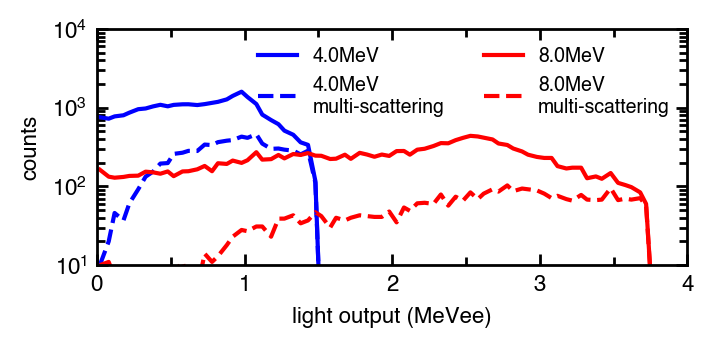

In [152]:
# light output  in the trigger detector
#fig = fig_pre_def(6.5,4,1)# 圖片大小
fig = fig_pre_def(7.5,3,1)# 圖片大小
ax = fig.add_subplot(1, 1, 1)          # 產生1x1格圖片、在第一格
'''
for i in np.arange(20,130,20):
    mask_diff = globals()["pro_"+str(int(i))+"MeV"]["Tri_p_num"]>1
    mask_inelastic = globals()["pro_"+str(int(i))+"MeV"]["inelastic"]>0
    globals()["pro_"+str(i)+"MeV_scatter"]=globals()["pro_"+str(int(i))+"MeV"][mask_diff]
    globals()["pro_"+str(i)+"MeV_inelastic"]=globals()["pro_"+str(int(i))+"MeV"][mask_diff & mask_inelastic]

    axis,globals()["y_"+str(i)+"MeV_scatter"]=sorting(globals()["pro_"+str(int(i))+"MeV_scatter"]["Tri_LO"] ,240,0,12)
    axis,globals()["y_"+str(i)+"MeV"]=sorting(globals()["pro_"+str(int(i))+"MeV"]["Tri_LO"] ,240,0,12)
    axis,globals()["y_"+str(i)+"MeV_inelastic"]=sorting(globals()["pro_"+str(int(i))+"MeV_inelastic"]["Tri_LO"] ,240,0,12)
    globals()["y_"+str(i)+"MeV_LO"]           = ER_function_improve(axis,axis,globals()["y_"+str(i)+"MeV"],0.131,0.08,0.062)#,2.461e-02 , 4.063e-02 , 7.418e-02)
    globals()["y_"+str(i)+"MeV_scatter_LO"]   = ER_function_improve(axis,axis,globals()["y_"+str(i)+"MeV_scatter"],0.131,0.08,0.062)#,2.461e-02 , 4.063e-02 , 7.418e-02)
    globals()["y_"+str(i)+"MeV_inelastic_LO"] = ER_function_improve(axis,axis,globals()["y_"+str(i)+"MeV_inelastic"],0.131,0.08,0.062)#,2.461e-02 , 4.063e-02 , 7.418e-02)
'''

factor =1
for i in np.arange(10,130,10):
    mask_multi_single_proton              = globals()["pro_"+str(int(i))+"MeV"]["Tri_p_num"]==1
    mask_multi_multi_proton_L             = globals()["pro_"+str(int(i))+"MeV"]["Tri_p_num"]>1
    mask_multi_multi_proton_U             = globals()["pro_"+str(int(i))+"MeV"]["Tri_p_num"]<50
    mask_multi_Carbon_proton              = globals()["pro_"+str(int(i))+"MeV"]["Tri_p_num"]==101
    mask_multi_Multi_Carbon_proton        = globals()["pro_"+str(int(i))+"MeV"]["Tri_p_num"]>101
    globals()["pro_"+str(i)+"MeV_SC"]     =globals()["pro_"+str(int(i))+"MeV"][mask_multi_single_proton]
    globals()["pro_"+str(i)+"MeV_MS"]     =globals()["pro_"+str(int(i))+"MeV"][mask_multi_multi_proton_L&mask_multi_multi_proton_U]
    globals()["pro_"+str(i)+"MeV_C_SC"]   =globals()["pro_"+str(int(i))+"MeV"][mask_multi_Carbon_proton]
    globals()["pro_"+str(i)+"MeV_C_MC"]   =globals()["pro_"+str(int(i))+"MeV"][mask_multi_Multi_Carbon_proton&mask_multi_multi_proton_L&mask_multi_multi_proton_U]
    globals()["pro_"+str(i)+"MeV_proton"]     =globals()["pro_"+str(int(i))+"MeV"][mask_multi_multi_proton_U]
    globals()["pro_"+str(i)+"MeV_carbon"]     =globals()["pro_"+str(int(i))+"MeV"][mask_multi_Carbon_proton | mask_multi_Multi_Carbon_proton]
    
    axis,globals()["y_"+str(i)+"MeV"]     =sorting(globals()["pro_"+str(int(i))+"MeV"]["Tri_LO"] ,240,0,12)
    axis,globals()["y_"+str(i)+"MeV_SC"]  =sorting(globals()["pro_"+str(int(i))+"MeV_SC"]['Tri_LO'] ,240,0,12)
    axis,globals()["y_"+str(i)+"MeV_MS"]  =sorting(globals()["pro_"+str(int(i))+"MeV_MS"]["Tri_LO"] ,240,0,12)
    axis,globals()["y_"+str(i)+"MeV_C_SC"]=sorting(globals()["pro_"+str(int(i))+"MeV_C_SC"]["Tri_LO"] ,240,0,12)
    axis,globals()["y_"+str(i)+"MeV_C_MC"]=sorting(globals()["pro_"+str(int(i))+"MeV_C_MC"]["Tri_LO"] ,240,0,12)
    axis,globals()["y_"+str(i)+"MeV_proton"]=sorting(globals()["pro_"+str(int(i))+"MeV_proton"]["Tri_LO"] ,240,0,12)
    axis,globals()["y_"+str(i)+"MeV_carbon"]=sorting(globals()["pro_"+str(int(i))+"MeV_carbon"]["Tri_LO"] ,240,0,12)

    globals()["y_"+str(i)+"MeV_LO"]      = ER_function_improve(axis,axis,globals()["y_"+str(i)+"MeV"],0.113,0.065,0.06)#,3.245e-02 , 5.701e-02 , 1.084e-01)
    globals()["y_"+str(i)+"MeV_SC_LO"]   = ER_function_improve(axis,axis,globals()["y_"+str(i)+"MeV_SC"],0.113,0.065,0.06)#,3.245e-02 , 5.701e-02 , 1.084e-01)
    globals()["y_"+str(i)+"MeV_MC_LO"]   = ER_function_improve(axis,axis,globals()["y_"+str(i)+"MeV_MS"],0.113,0.065,0.06)#,3.245e-02 , 5.701e-02 , 1.084e-01)
    globals()["y_"+str(i)+"MeV_C_SC_LO"] = ER_function_improve(axis,axis,globals()["y_"+str(i)+"MeV_C_SC"],0.113,0.065,0.06)#,3.245e-02 , 5.701e-02 , 1.084e-01)
    globals()["y_"+str(i)+"MeV_C_MC_LO"] = ER_function_improve(axis,axis,globals()["y_"+str(i)+"MeV_C_MC"],0.113,0.065,0.06)#,3.245e-02 , 5.701e-02 , 1.084e-01)
    globals()["y_"+str(i)+"MeV_proton_LO"] = ER_function_improve(axis,axis,globals()["y_"+str(i)+"MeV_proton"],0.113,0.065,0.06)#,3.245e-02 , 5.701e-02 , 1.084e-01)
    globals()["y_"+str(i)+"MeV_carbon_LO"] = ER_function_improve(axis,axis,globals()["y_"+str(i)+"MeV_carbon"],0.113,0.065,0.06)#,3.245e-02 , 5.701e-02 , 1.084e-01)

#for i in np.arange(20,100,30):
#i=20
#plt.plot(axis,globals()["y_"+str(i)+"MeV_SC"]/factor,'b',label=str(i/10)+"MeV")
#plt.plot(axis,globals()["y_"+str(i)+"MeV_MS"]/factor,'--b',label=str(i/10)+"MeV\nmulti-scattering")
#plt.plot(axis,globals()["y_"+str(i)+"MeV_C_SC"]/factor,'--b',label=str(i/10)+"MeV\ncarbon proton")
#plt.plot(axis,globals()["y_"+str(i)+"MeV_C_MC"]/factor,'--b',label=str(i/10)+"MeV\ncarbon multi-scattering")
#for i in np.arange(20,100,30):   
i=40
plt.plot(axis,globals()["y_"+str(i)+"MeV_MS"]+globals()["y_"+str(i)+"MeV_SC"]/factor,'b',label=str(i/10)+"MeV")
plt.plot(axis,globals()["y_"+str(i)+"MeV_MS"]/factor,'--b',label=str(i/10)+"MeV\nmulti-scattering")
#plt.plot(axis,globals()["y_"+str(i)+"MeV_proton"]/factor,'b',label=str(i/10)+"MeV\nproton")
#plt.plot(axis,globals()["y_"+str(i)+"MeV_carbon"]/factor,'--b',label=str(i/10)+"MeV\ncarbon")
#plt.plot(axis,globals()["y_"+str(i)+"MeV_C_SC"]/factor,'--b',label=str(i/10)+"MeV\ncarbon proton")
#plt.plot(axis,globals()["y_"+str(i)+"MeV_C_MC"]/factor,'--b',label=str(i/10)+"MeV\ncarbon multi-scattering")
#i=60
#plt.plot(axis,globals()["y_"+str(i)+"MeV"],'r',label=str(i/10)+"MeV")
#plt.plot(axis,globals()["y_"+str(i)+"MeV_scatter"],'--r',label=str(i/10)+"MeV\nmulti-scattering")
i=80
plt.plot(axis,globals()["y_"+str(i)+"MeV_MS"]+globals()["y_"+str(i)+"MeV_SC"]/factor,'r',label=str(i/10)+"MeV")
plt.plot(axis,globals()["y_"+str(i)+"MeV_MS"]/factor,'--r',label=str(i/10)+"MeV\nmulti-scattering")
#plt.plot(axis,globals()["y_"+str(i)+"MeV_proton"]/factor,'r',label=str(i/10)+"MeV\nproton")
#plt.plot(axis,globals()["y_"+str(i)+"MeV_carbon"]/factor,'--r',label=str(i/10)+"MeV\ncarbon")
#plt.plot(axis,globals()["y_"+str(i)+"MeV_C_SC"]/factor,'--b',label=str(i/10)+"MeV\ncarbon proton")
#plt.plot(axis,globals()["y_"+str(i)+"MeV_C_MC"]/factor,'--b',label=str(i/10)+"MeV\ncarbon multi-scattering")
 
fig_post_def(xlim=(0,4),xticks = (1,0.5)#,ylim=(0,500)
             ,lg_fs=7,n_col =2
             ,xlabel="light output (MeVee)",ylabel="counts")  
plt.yscale('log')
plt.ylim(10,10000)
plt.savefig('/Users/thlin/Dropbox/Research/Publication/2023 NSTOF/Figure/Python_export/Fig3_tri_LO.svg', format="svg")

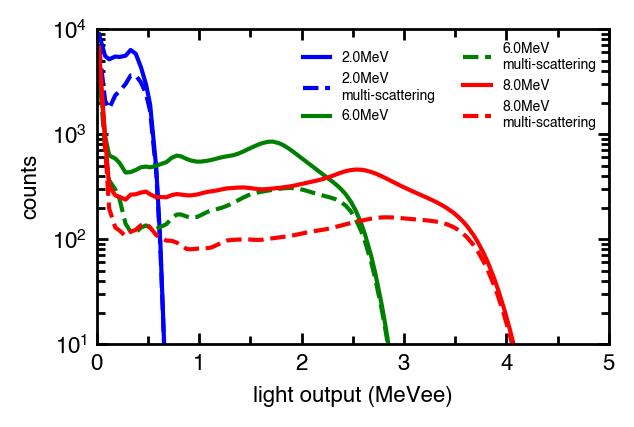

In [25]:
# light output  in the trigger detector
fig = fig_pre_def(6.5,4,1)# 圖片大小
ax = fig.add_subplot(1, 1, 1)          # 產生1x1格圖片、在第一格

for i in np.arange(10,130,10):
    mask_diff = globals()["pro_"+str(int(i))+"MeV"]["Tri_p_num"]>1
    mask_inelastic = globals()["pro_"+str(int(i))+"MeV"]["inelastic"]>0
    globals()["pro_"+str(i)+"MeV_scatter"]=globals()["pro_"+str(int(i))+"MeV"][mask_diff]
    globals()["pro_"+str(i)+"MeV_inelastic"]=globals()["pro_"+str(int(i))+"MeV"][mask_diff & mask_inelastic]

    axis,globals()["y_"+str(i)+"MeV_scatter"]=sorting(globals()["pro_"+str(int(i))+"MeV_scatter"]["Tri_LO"] ,240,0,12)
    axis,globals()["y_"+str(i)+"MeV"]=sorting(globals()["pro_"+str(int(i))+"MeV"]["Tri_LO"] ,240,0,12)
    axis,globals()["y_"+str(i)+"MeV_inelastic"]=sorting(globals()["pro_"+str(int(i))+"MeV_inelastic"]["Tri_LO"] ,240,0,12)
    globals()["y_"+str(i)+"MeV_LO"]           = ER_function_improve(axis,axis,globals()["y_"+str(i)+"MeV"],0.131,0.08,0.062)#,2.461e-02 , 4.063e-02 , 7.418e-02)
    globals()["y_"+str(i)+"MeV_scatter_LO"]   = ER_function_improve(axis,axis,globals()["y_"+str(i)+"MeV_scatter"],0.131,0.08,0.062)#,2.461e-02 , 4.063e-02 , 7.418e-02)
    globals()["y_"+str(i)+"MeV_inelastic_LO"] = ER_function_improve(axis,axis,globals()["y_"+str(i)+"MeV_inelastic"],0.131,0.08,0.062)#,2.461e-02 , 4.063e-02 , 7.418e-02)
    
#for i in np.arange(20,100,30):
i=20
#plt.plot(axis,globals()["y_"+str(i)+"MeV"],'b',label=str(i/10)+"MeV")
#plt.plot(axis,globals()["y_"+str(i)+"MeV_scatter"],'--b',label=str(i/10)+"MeV\nmulti-scattering")
#plt.plot(axis,globals()["y_"+str(i)+"MeV_inelastic"],'-.b',label=str(i/10)+"MeV\ninelastic")
#---
plt.plot(axis,globals()["y_"+str(i)+"MeV_LO"],'b',label=str(i/10)+"MeV")
plt.plot(axis,globals()["y_"+str(i)+"MeV_scatter_LO"],'--b',label=str(i/10)+"MeV\nmulti-scattering")
#plt.plot(axis,globals()["y_"+str(i)+"MeV_inelastic_LO"],'-.b',label=str(i/10)+"MeV\ninelastic")

i=60
#plt.plot(axis,globals()["y_"+str(i)+"MeV"],'g',label=str(i/10)+"MeV")
#plt.plot(axis,globals()["y_"+str(i)+"MeV_scatter"],'--g',label=str(i/10)+"MeV\nmulti-scattering")
#plt.plot(axis,globals()["y_"+str(i)+"MeV_inelastic"],'-.g',label=str(i/10)+"MeV\ninelastic")
#---
plt.plot(axis,globals()["y_"+str(i)+"MeV_LO"],'g',label=str(i/10)+"MeV")
plt.plot(axis,globals()["y_"+str(i)+"MeV_scatter_LO"],'--g',label=str(i/10)+"MeV\nmulti-scattering")
#plt.plot(axis,globals()["y_"+str(i)+"MeV_inelastic_LO"],'-g',label=str(i/10)+"MeV\ninelastic")

i=80
#plt.plot(axis,globals()["y_"+str(i)+"MeV"],'r',label=str(i/10)+"MeV")
#plt.plot(axis,globals()["y_"+str(i)+"MeV_scatter"],'--r',label=str(i/10)+"MeV\nmulti-scattering")
#plt.plot(axis,globals()["y_"+str(i)+"MeV_inelastic"],'-.r',label=str(i/10)+"MeV\ninelastic")
#---
plt.plot(axis,globals()["y_"+str(i)+"MeV_LO"],'r',label=str(i/10)+"MeV")
plt.plot(axis,globals()["y_"+str(i)+"MeV_scatter_LO"],'--r',label=str(i/10)+"MeV\nmulti-scattering")
#plt.plot(axis,globals()["y_"+str(i)+"MeV_inelastic_LO"],'-.c',label=str(i/10)+"MeV\ninelastic")
      
fig_post_def(xlim=(0,5),xticks = (1,0.5)#,ylim=(0,500)
             ,lg_fs=5,n_col =2
             ,xlabel="light output (MeVee)",ylabel="counts")  
plt.yscale('log')
plt.ylim(10,10000)
plt.savefig('/Users/thlin/Dropbox/Research/Publication/2023 NSTOF/Figure/Python_export/Fig3_tri_LO.svg', format="svg")

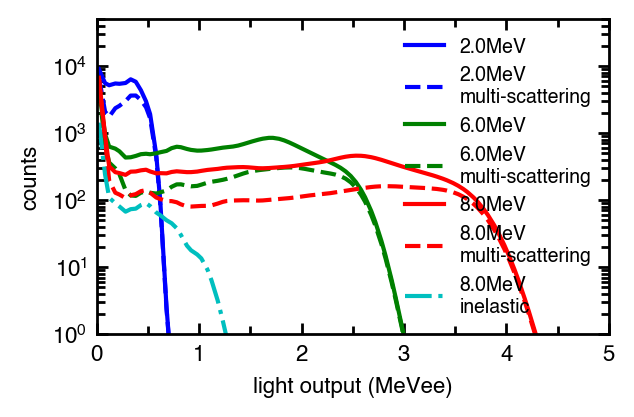

In [26]:
# light output  in the trigger detector
fig = fig_pre_def(6.5,4,1)# 圖片大小
ax = fig.add_subplot(1, 1, 1)          # 產生1x1格圖片、在第一格

for i in np.arange(10,130,10):
    mask_diff = globals()["pro_"+str(int(i))+"MeV"]["Tri_p_num"]>1
    mask_inelastic = globals()["pro_"+str(int(i))+"MeV"]["inelastic"]>0
    globals()["pro_"+str(i)+"MeV_scatter"]=globals()["pro_"+str(int(i))+"MeV"][mask_diff]
    globals()["pro_"+str(i)+"MeV_inelastic"]=globals()["pro_"+str(int(i))+"MeV"][mask_diff & mask_inelastic]

    axis,globals()["y_"+str(i)+"MeV_scatter"]=sorting(globals()["pro_"+str(int(i))+"MeV_scatter"]["Tri_LO"] ,240,0,12)
    axis,globals()["y_"+str(i)+"MeV"]=sorting(globals()["pro_"+str(int(i))+"MeV"]["Tri_LO"] ,240,0,12)
    axis,globals()["y_"+str(i)+"MeV_inelastic"]=sorting(globals()["pro_"+str(int(i))+"MeV_inelastic"]["Tri_LO"] ,240,0,12)
    globals()["y_"+str(i)+"MeV_LO"]           = ER_function_improve(axis,axis,globals()["y_"+str(i)+"MeV"],0.131,0.08,0.062)#,2.461e-02 , 4.063e-02 , 7.418e-02)
    globals()["y_"+str(i)+"MeV_scatter_LO"]   = ER_function_improve(axis,axis,globals()["y_"+str(i)+"MeV_scatter"],0.131,0.08,0.062)#,2.461e-02 , 4.063e-02 , 7.418e-02)
    globals()["y_"+str(i)+"MeV_inelastic_LO"] = ER_function_improve(axis,axis,globals()["y_"+str(i)+"MeV_inelastic"],0.131,0.08,0.062)#,2.461e-02 , 4.063e-02 , 7.418e-02)
    
#for i in np.arange(20,100,30):
i=20
#plt.plot(axis,globals()["y_"+str(i)+"MeV"],'b',label=str(i/10)+"MeV")
#plt.plot(axis,globals()["y_"+str(i)+"MeV_scatter"],'--b',label=str(i/10)+"MeV\nmulti-scattering")
#plt.plot(axis,globals()["y_"+str(i)+"MeV_inelastic"],'-.b',label=str(i/10)+"MeV\ninelastic")
#---
plt.plot(axis,globals()["y_"+str(i)+"MeV_LO"],'b',label=str(i/10)+"MeV")
plt.plot(axis,globals()["y_"+str(i)+"MeV_scatter_LO"],'--b',label=str(i/10)+"MeV\nmulti-scattering")
#plt.plot(axis,globals()["y_"+str(i)+"MeV_inelastic_LO"],'-.b',label=str(i/10)+"MeV\ninelastic")

i=60
#plt.plot(axis,globals()["y_"+str(i)+"MeV"],'g',label=str(i/10)+"MeV")
#plt.plot(axis,globals()["y_"+str(i)+"MeV_scatter"],'--g',label=str(i/10)+"MeV\nmulti-scattering")
#plt.plot(axis,globals()["y_"+str(i)+"MeV_inelastic"],'-.g',label=str(i/10)+"MeV\ninelastic")
#---
plt.plot(axis,globals()["y_"+str(i)+"MeV_LO"],'g',label=str(i/10)+"MeV")
plt.plot(axis,globals()["y_"+str(i)+"MeV_scatter_LO"],'--g',label=str(i/10)+"MeV\nmulti-scattering")
#plt.plot(axis,globals()["y_"+str(i)+"MeV_inelastic_LO"],'-g',label=str(i/10)+"MeV\ninelastic")

i=80
#plt.plot(axis,globals()["y_"+str(i)+"MeV"],'r',label=str(i/10)+"MeV")
#plt.plot(axis,globals()["y_"+str(i)+"MeV_scatter"],'--r',label=str(i/10)+"MeV\nmulti-scattering")
#plt.plot(axis,globals()["y_"+str(i)+"MeV_inelastic"],'-.r',label=str(i/10)+"MeV\ninelastic")
#---
plt.plot(axis,globals()["y_"+str(i)+"MeV_LO"],'r',label=str(i/10)+"MeV")
plt.plot(axis,globals()["y_"+str(i)+"MeV_scatter_LO"],'--r',label=str(i/10)+"MeV\nmulti-scattering")
plt.plot(axis,globals()["y_"+str(i)+"MeV_inelastic_LO"],'-.c',label=str(i/10)+"MeV\ninelastic")
      
fig_post_def(xlim=(0,5),xticks = (1,0.5)#,ylim=(0,500)
             ,lg_fs=7,n_col =1
             ,xlabel="light output (MeVee)",ylabel="counts")  
plt.yscale('log')
plt.ylim(1,50000)
plt.savefig('/Users/thlin/Dropbox/Research/Publication/2023 NSTOF/Figure/Python_export/Fig3_tri_LO.svg', format="svg")

In [27]:
mask = pro_60MeV_scatter["Tri_LO"]<0.3
pro_60MeV_scatter_03=pro_60MeV_scatter[mask]
print(pro_60MeV_scatter_03)

       core  counts    Tri_LO    Tri_pE    Rec_nE    Rec_LO  Tri_p_num  \
1       0.0     2.0  0.001257  0.073954  5.926070  0.041150      100.0   
4       0.0     5.0  0.007553  0.444301  1.108690  0.000958      100.0   
21      0.0    22.0  0.009390  0.552329  5.447870  1.253020      100.0   
24      0.0    25.0  0.082936  0.946170  0.643619  0.028845      101.0   
25      0.0    26.0  0.110540  0.857224  0.679172  0.036944      101.0   
...     ...     ...       ...       ...       ...       ...        ...   
35387  31.0  1043.0  0.004541  0.267108  1.312680  0.022591      100.0   
35394  31.0  1050.0  0.006715  0.395010  5.605130  0.079146      100.0   
35395  31.0  1051.0  0.006556  0.385619  1.146150  0.083442      100.0   
35400  31.0  1056.0  0.005361  0.315376  5.684740  0.057009      200.0   
35404  31.0  1060.0  0.007039  0.414088  5.517350  1.236620      100.0   

       inelastic      C_LO  Recoil_p_E  Recoil_p_E_diff   Total_E  
1            0.0  0.001257    0.022770     

In [28]:
Ep_x = np.arange(0,10,0.001)
LO_x = np.arange(0,10,0.001)
Ep_y = np.zeros(1000)
Ep_y[0] = 2
LO_y = ER_function_improve(LO_x,Ep_x,Ep_y,0.1,0.2,0.3)


1.0031316969011534


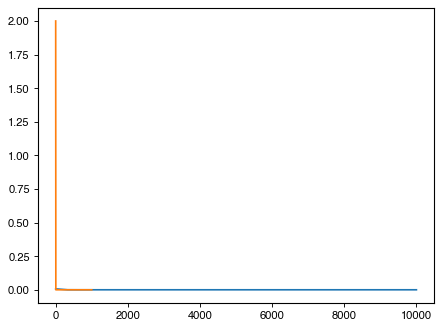

In [29]:
plt.plot(LO_y)
plt.plot(Ep_y)
print(sum(LO_y))

KeyError: 'pro_15MeV'

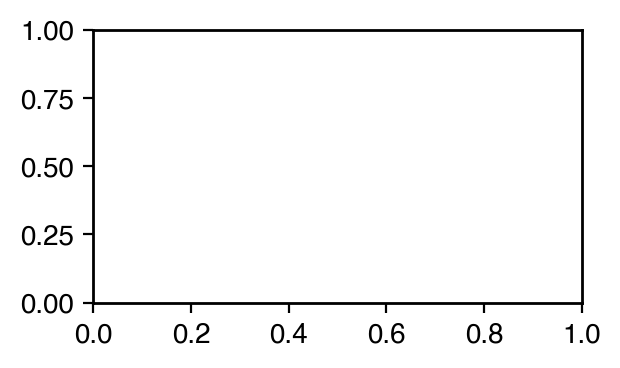

In [30]:
fig = fig_pre_def(8,4.5,1)# 圖片大小
ax = fig.add_subplot(1, 1, 1)          # 產生1x1格圖片、在第一格

for i in np.arange(10,125,5):
    axis,globals()["y_"+str(i)+"MeV"]=sorting(globals()["pro_"+str(int(i))+"MeV"]["Rec_nE"] ,240,0,12)
for i in np.arange(10,125,5):
    plt.plot(axis,globals()["y_"+str(i)+"MeV"],label=str(i/10)+"MeV")
fig_post_def(xlim=(0,10),ylim=(1,500),lg_fs=9,
             xlabel="recorded energy(MeV)",ylabel="counts")  

(10, 10000)

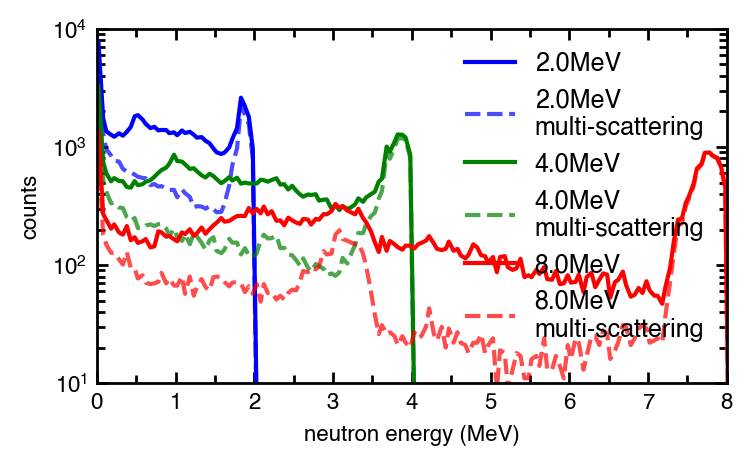

In [ ]:
fig = fig_pre_def(8,4.5,1)# 圖片大小
ax = fig.add_subplot(1, 1, 1)          # 產生1x1格圖片、在第一格

for i in np.arange(10,130,10):
    mask_diff = globals()["pro_"+str(int(i))+"MeV"]["Recoil_p_E_diff"]<0.95
    globals()["pro_"+str(i)+"MeV_scatter"]=globals()["pro_"+str(int(i))+"MeV"][mask_diff]
    axis,globals()["y_"+str(i)+"MeV_scatter"]=sorting(globals()["pro_"+str(int(i))+"MeV_scatter"]["Rec_nE"] ,240,0,12)

    axis,globals()["y_"+str(i)+"MeV"]=sorting(globals()["pro_"+str(int(i))+"MeV"]["Rec_nE"] ,240,0,12)
    #ER_function_improve
i=20
plt.plot(axis,globals()["y_"+str(i)+"MeV"],'b',label=str(i/10)+"MeV")
plt.plot(axis,globals()["y_"+str(i)+"MeV_scatter"] ,'--b',alpha=0.7, label=str(i/10)+"MeV\nmulti-scattering")
i=40
plt.plot(axis,globals()["y_"+str(i)+"MeV"],'g',alpha=1,label=str(i/10)+"MeV")
plt.plot(axis,globals()["y_"+str(i)+"MeV_scatter"],'--g',alpha=0.7,label=str(i/10)+"MeV\nmulti-scattering")
i=80
plt.plot(axis,globals()["y_"+str(i)+"MeV"],'r',alpha=1,label=str(i/10)+"MeV")
plt.plot(axis,globals()["y_"+str(i)+"MeV_scatter"],'--r',alpha=0.7,label=str(i/10)+"MeV\nmulti-scattering")

fig_post_def(xlim=(0,8),xticks = (1,0.5),ylim=(0,300)
             ,lg_fs=9,n_col =1
             ,xlabel="neutron energy (MeV)",ylabel="counts")  
plt.yscale('log')
plt.ylim(10,10000)
#plt.savefig('/Users/thlin/Dropbox/PhD_thesis_博士論文/Figure/mono_test.svg', format="svg")

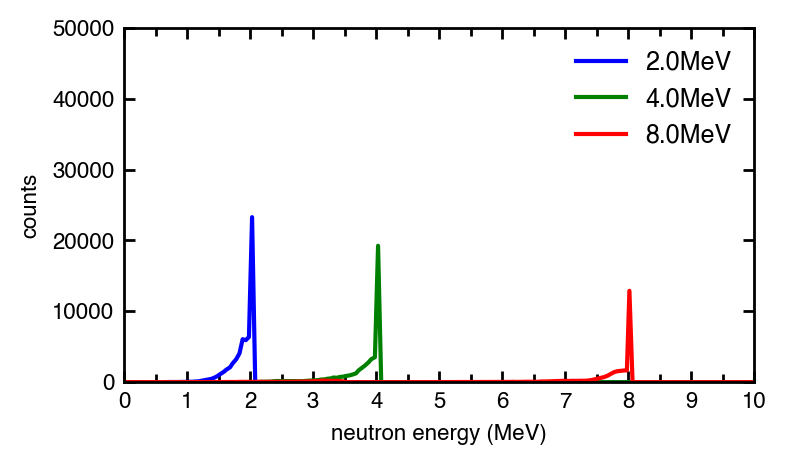

In [ ]:
fig = fig_pre_def(8,4.5,1)# 圖片大小
ax = fig.add_subplot(1, 1, 1)          # 產生1x1格圖片、在第一格

for i in np.arange(10,130,10):
    mask_diff = globals()["pro_"+str(int(i))+"MeV"]["Recoil_p_E_diff"]>0
    globals()["pro_"+str(i)+"MeV_scatter"]=globals()["pro_"+str(int(i))+"MeV"][mask_diff]

    axis,globals()["y_"+str(i)+"MeV"]=sorting(globals()["pro_"+str(int(i))+"MeV"]["Total_E"] ,240,0,12)
i=20
plt.plot(axis,globals()["y_"+str(i)+"MeV"],'b',label=str(i/10)+"MeV")
#plt.plot(axis,globals()["y_"+str(i)+"MeV_scatter"] ,'--b',alpha=0.7, label=str(i/10)+"MeV\nmulti-scattering")
i=40
plt.plot(axis,globals()["y_"+str(i)+"MeV"],'g',alpha=1,label=str(i/10)+"MeV")
#plt.plot(axis,globals()["y_"+str(i)+"MeV_scatter"],'--g',alpha=0.7,label=str(i/10)+"MeV\nmulti-scattering")
i=80
plt.plot(axis,globals()["y_"+str(i)+"MeV"],'r',alpha=1,label=str(i/10)+"MeV")
#plt.plot(axis,globals()["y_"+str(i)+"MeV_scatter"],'--r',alpha=0.7,label=str(i/10)+"MeV\nmulti-scattering")

fig_post_def(xlim=(0,10),xticks = (1,0.5),ylim=(0,50000)
             ,lg_fs=9,n_col =1
             ,xlabel="neutron energy (MeV)",ylabel="counts")  
#plt.yscale('log')
#plt.ylim(1,10000)
#plt.savefig('/Users/thlin/Dropbox/PhD_thesis_博士論文/Figure/mono_test.svg', format="svg")

(1.0, 250.0)

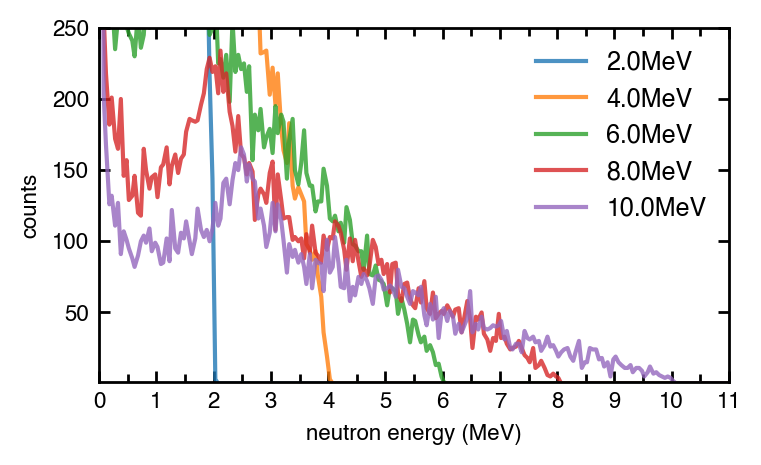

In [ ]:
fig = fig_pre_def(8,4.5,1)# 圖片大小
ax = fig.add_subplot(1, 1, 1)          # 產生1x1格圖片、在第一格
for i in np.arange(20,120,20):
    axis,globals()["y_"+str(i)+"MeV"]=sorting(globals()["pro_"+str(int(i))+"MeV"]["Rec_nE"] ,240,0,12)
for i in np.arange(20,120,20):
    plt.plot(axis,globals()["y_"+str(i)+"MeV"],alpha = 0.8,label=str(i/10)+"MeV")
fig_post_def(xlim=(0,11),xticks = (1,0.5)#,ylim=(0,500)
             ,lg_fs=9
             ,xlabel="neutron energy (MeV)",ylabel="counts")  
#plt.yscale('log')
plt.ylim(1,250)

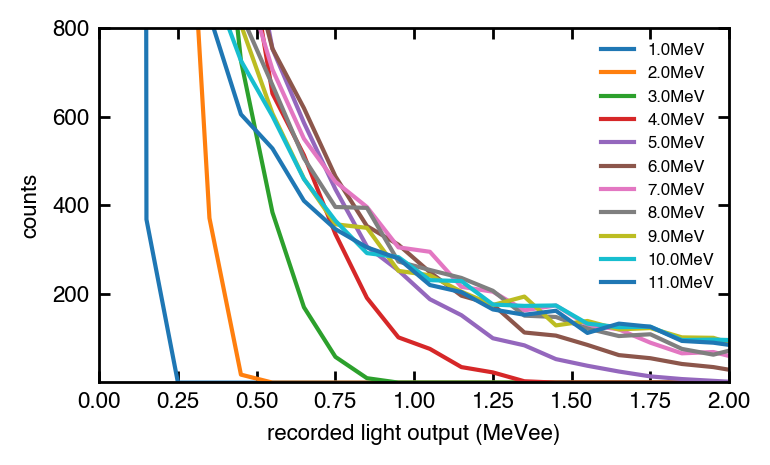

In [ ]:




fig = fig_pre_def(8,4.5,1)# 圖片大小
ax = fig.add_subplot(1, 1, 1)          # 產生1x1格圖片、在第一格
for i in np.arange(10,120,10):
    axis,globals()["y_"+str(i)+"MeV"]=sorting(globals()["pro_"+str(int(i))+"MeV"]["Rec_LO"] ,100,0,10)
for i in np.arange(10,120,10):
    plt.plot(axis,globals()["y_"+str(i)+"MeV"],label=str(i/10)+"MeV")
fig_post_def(xlim=(0,2),ylim=(1,800),xlabel="recorded light output (MeVee)",ylabel="counts")  

In [ ]:
#fig = fig_pre_def(8,8,1)# 圖片大小
#ax = fig.add_subplot(1, 1, 1)  

#plt.hist2d(pro_20MeV['Recoil_p_E'],pro_20MeV['Rec_nE'], bins=(200, 200),cmin=1, cmap=plt.cm.jet)


#  Tri = 0 /Rec =0

In [163]:
import matplotlib.cm as cm

In [164]:
def bar_plot(input_x,input_y,binning):
    xs = [input_x[0] - binning/2]
    ys = [0]
    for i in range(len(input_x)):
        xs.append(input_x[i] - binning/2)
        xs.append(input_x[i] + binning/2)
        ys.append(input_y[i])
        ys.append(input_y[i])
    xs.append(input_x[-1] + binning/2)
    ys.append(0)
    return np.array(xs),np.array(ys)

In [180]:
tri_LO_threshold =0.0
rec_LO_threshold =0.0
for i in np.arange(10,130,10):
    globals()["mask_"+str(int(i))+"MeV_scattered_neutron_E"] =  globals()["dataE_"+str(int(i))+"MeV"]['Rec_nE']>0.0
    globals()["mask_"+str(int(i))+"MeV_tri"] =  globals()["dataE_"+str(int(i))+"MeV"]['Tri_LO']>tri_LO_threshold
    globals()["mask_"+str(int(i))+"MeV_rec"] =  globals()["dataE_"+str(int(i))+"MeV"]['Rec_LO']>rec_LO_threshold
    #globals()["mask_"+str(int(i))+"MeV_multi"] =  globals()["dataE_"+str(int(i))+"MeV"]['Tri_p_num']>1
    globals()["pro_"+str(int(i))+"MeV"] = globals()["dataE_"+str(int(i))+"MeV"][(globals()["mask_"+str(int(i))+"MeV_tri"]&globals()["mask_"+str(int(i))+"MeV_rec"])]
    globals()["proT_"+str(int(i))+"MeV"] = globals()["dataE_"+str(int(i))+"MeV"][(globals()["mask_"+str(int(i))+"MeV_tri"]&globals()["mask_"+str(int(i))+"MeV_rec"]&globals()["mask_"+str(int(i))+"MeV_scattered_neutron_E"])]

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


efficiency:  [76688. 61387. 51003. 46925. 41175. 35423. 30939. 32834. 24913. 24963.
 24930. 23562.]
[[5.00000000e-01 0.00000000e+00 1.00000000e+00 1.00000000e+00]
 [3.19607843e-01 2.79582593e-01 9.89980213e-01 1.00000000e+00]
 [1.39215686e-01 5.36866598e-01 9.60121645e-01 1.00000000e+00]
 [4.11764706e-02 7.51331890e-01 9.11022649e-01 1.00000000e+00]
 [2.29411765e-01 9.11022649e-01 8.40344072e-01 1.00000000e+00]
 [4.09803922e-01 9.89980213e-01 7.55382735e-01 1.00000000e+00]
 [5.90196078e-01 9.89980213e-01 6.55283850e-01 1.00000000e+00]
 [7.70588235e-01 9.11022649e-01 5.42053356e-01 1.00000000e+00]
 [9.58823529e-01 7.51331890e-01 4.12356317e-01 1.00000000e+00]
 [1.00000000e+00 5.36866598e-01 2.79582593e-01 1.00000000e+00]
 [1.00000000e+00 2.79582593e-01 1.41206152e-01 1.00000000e+00]
 [1.00000000e+00 1.22464680e-16 6.12323400e-17 1.00000000e+00]]


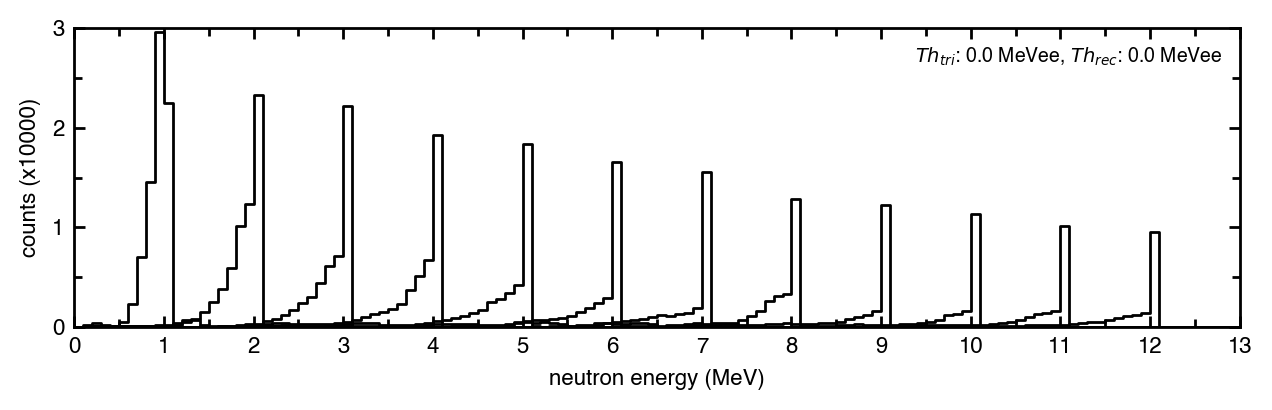

In [181]:
fig = fig_pre_def(14.8,3.8,1)# 圖片大小
ax = fig.add_subplot(1, 1, 1)          # 產生1x1格圖片、在第一格
eff = [] 
divider =10000
group = np.arange(10,130,10)
for i in group:
    axis,globals()["y_"+str(i)+"MeV"]=sorting(globals()["pro_"+str(int(i))+"MeV"]["Total_E"] ,130,0,13)
    axis,globals()["yT_"+str(i)+"MeV"]=sorting(globals()["proT_"+str(int(i))+"MeV"]["Total_E"] ,130,0,13)
    #print(globals()["y_"+str(i)+"MeV"])
    eff = np.append(eff, sum(globals()["y_"+str(i)+"MeV"]))
    bar_axis,globals()["bar_y_"+str(i)+"MeV"] = bar_plot(axis,globals()["y_"+str(i)+"MeV"],13/130)
    bar_axis,globals()["barT_y_"+str(i)+"MeV"] = bar_plot(axis,globals()["yT_"+str(i)+"MeV"],13/130)
print("efficiency: ",eff)

colors = cm.rainbow(np.linspace(0, 1, len(group)))
print(colors)
for i,c in zip(group,colors):
    #plt.plot(axis,globals()["y_"+str(i)+"MeV"]/divider,label=str(i/10)+" MeV",linewidth =1.5)
    #plt.plot(bar_axis,globals()["barT_y_"+str(i)+"MeV"]/divider,linewidth =1,color=c, #,label=str(i/10)+"MeV"
    #         )
    plt.plot(bar_axis,globals()["bar_y_"+str(i)+"MeV"]/divider,linewidth =1,color='black', #,label=str(i/10)+"MeV"
             )
    
fig_post_def(xlim=(0,13),ylim=(0,30000/divider)
             ,xticks = (1,0.5),yticks = (10000/divider,5000/divider)
             ,xlabel="neutron energy (MeV)",ylabel="counts (x10000)"
             ,lg_fs=7,n_col =4
             ,title = r'$Th_{tri}$: '+ str(tri_LO_threshold)+ ' MeVee, $Th_{rec}$: '+ str(rec_LO_threshold)+' MeVee') 
#plt.yscale('log')
#plt.ylim(10,1000000)

#plt.savefig('/Users/thlin/Dropbox/Research/Publication/2023 NSTOF/Figure/Python_export/Fig2_simulation_ret_E_0_0.svg', format="svg")


efficiency:  [51003. 41175. 30939. 24913. 24930.]
[[5.00000000e-01 0.00000000e+00 1.00000000e+00 1.00000000e+00]
 [1.96078431e-03 7.09281308e-01 9.23289106e-01 1.00000000e+00]
 [5.03921569e-01 9.99981027e-01 7.04925547e-01 1.00000000e+00]
 [1.00000000e+00 7.00543038e-01 3.78411050e-01 1.00000000e+00]
 [1.00000000e+00 1.22464680e-16 6.12323400e-17 1.00000000e+00]]


<Figure size 1165.35x299.213 with 0 Axes>

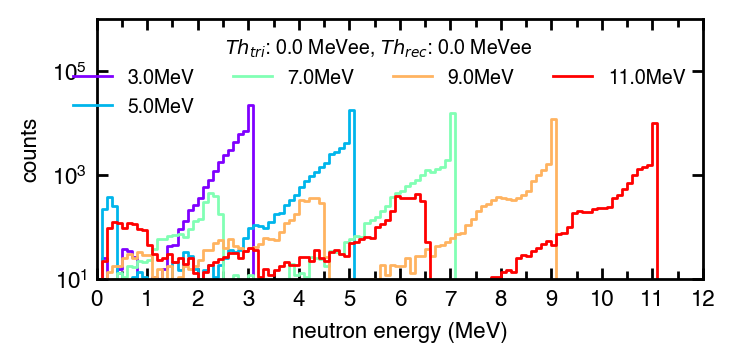

In [186]:
fig = fig_pre_def(14.8,3.8,1)# 圖片大小
fig = fig_pre_def(7.7,3.3,1)# 圖片大小
ax = fig.add_subplot(1, 1, 1)          # 產生1x1格圖片、在第一格
eff = [] 
divider =1
group = np.arange(30,130,20)
for i in group:
    axis,globals()["y_"+str(i)+"MeV"]=sorting(globals()["pro_"+str(int(i))+"MeV"]["Total_E"] ,130,0,13)
    axis,globals()["yT_"+str(i)+"MeV"]=sorting(globals()["proT_"+str(int(i))+"MeV"]["Total_E"] ,130,0,13)
    #print(globals()["y_"+str(i)+"MeV"])
    eff = np.append(eff, sum(globals()["y_"+str(i)+"MeV"]))
    bar_axis,globals()["bar_y_"+str(i)+"MeV"] = bar_plot(axis,globals()["y_"+str(i)+"MeV"],13/130)
    bar_axis,globals()["barT_y_"+str(i)+"MeV"] = bar_plot(axis,globals()["yT_"+str(i)+"MeV"],13/130)
print("efficiency: ",eff)

colors = cm.rainbow(np.linspace(0, 1, len(group)))
print(colors)
for i,c in zip(group,colors):
    #plt.plot(axis,globals()["y_"+str(i)+"MeV"]/divider,label=str(i/10)+" MeV",linewidth =1.5)
    plt.plot(bar_axis,globals()["bar_y_"+str(i)+"MeV"]/divider,linewidth =1,color=c,label=str(i/10)+"MeV"
             )
    #plt.plot(bar_axis,globals()["barT_y_"+str(i)+"MeV"]/divider,linewidth =1,color='black', #,label=str(i/10)+"MeV"
    #         )
    
fig_post_def(xlim=(0,12),ylim=(0,30000/divider)
             ,xticks = (1,0.5),yticks = (10000/divider,5000/divider)
             ,xlabel="neutron energy (MeV)",ylabel="counts"
             ,lg_fs=7,n_col =4
             ,title = r'$Th_{tri}$: '+ str(tri_LO_threshold)+ ' MeVee, $Th_{rec}$: '+ str(rec_LO_threshold)+' MeVee') 
plt.yscale('log')
plt.ylim(10,1000000)

plt.savefig('/Users/thlin/Dropbox/Research/Publication/2023 NSTOF/Figure/Python_export/Fig2_simulation_ret_E_0_0.svg', format="svg")


#  Tri = 0.0 /Rec =0.4

In [187]:
tri_LO_threshold =0.125
rec_LO_threshold =0.125
for i in np.arange(10,130,10):
    globals()["mask_"+str(int(i))+"MeV_scattered_neutron_E"] =  globals()["dataE_"+str(int(i))+"MeV"]['Rec_nE']>0.0
    globals()["mask_"+str(int(i))+"MeV_tri"] =  globals()["dataE_"+str(int(i))+"MeV"]['Tri_LO']>tri_LO_threshold
    globals()["mask_"+str(int(i))+"MeV_rec"] =  globals()["dataE_"+str(int(i))+"MeV"]['Rec_LO']>rec_LO_threshold
    globals()["pro_"+str(int(i))+"MeV"] = globals()["dataE_"+str(int(i))+"MeV"][(globals()["mask_"+str(int(i))+"MeV_tri"]&globals()["mask_"+str(int(i))+"MeV_rec"])]
    globals()["proT_"+str(int(i))+"MeV"] = globals()["dataE_"+str(int(i))+"MeV"][(globals()["mask_"+str(int(i))+"MeV_tri"]&globals()["mask_"+str(int(i))+"MeV_rec"]&globals()["mask_"+str(int(i))+"MeV_scattered_neutron_E"])]

efficiency:  [ 1028.  9278. 10373.  9222.  8289.]
[[5.00000000e-01 0.00000000e+00 1.00000000e+00 1.00000000e+00]
 [1.96078431e-03 7.09281308e-01 9.23289106e-01 1.00000000e+00]
 [5.03921569e-01 9.99981027e-01 7.04925547e-01 1.00000000e+00]
 [1.00000000e+00 7.00543038e-01 3.78411050e-01 1.00000000e+00]
 [1.00000000e+00 1.22464680e-16 6.12323400e-17 1.00000000e+00]]
[0.79474708 0.69993533 0.73990167 0.71524615 0.73615635]


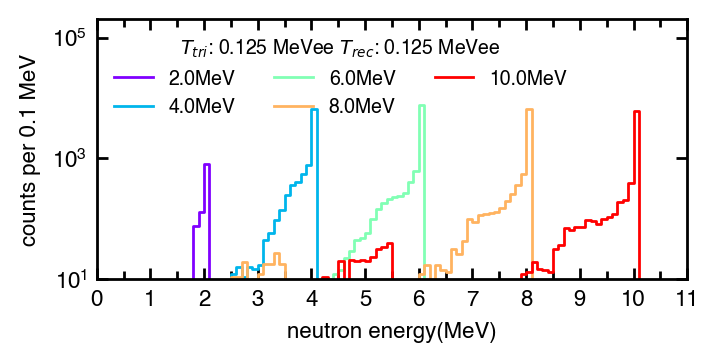

In [189]:
#fig = fig_pre_def(14.8,3.5,1)# 圖片大小
fig = fig_pre_def(7.5,3.3,1)# 圖片大小
ax = fig.add_subplot(1, 1, 1)          # 產生1x1格圖片、在第一格
eff = [] 
divider =1
group = np.arange(20,120,20)
for i in group:
    axis,globals()["y_"+str(i)+"MeV"]=sorting(globals()["pro_"+str(int(i))+"MeV"]["Total_E"] ,130,0,13)
    axis,globals()["yT_"+str(i)+"MeV"]=sorting(globals()["proT_"+str(int(i))+"MeV"]["Total_E"] ,130,0,13)
    #print(globals()["y_"+str(i)+"MeV"])
    eff = np.append(eff, sum(globals()["y_"+str(i)+"MeV"]))
    bar_axis,globals()["bar_y_"+str(i)+"MeV"] = bar_plot(axis,globals()["y_"+str(i)+"MeV"],13/130)
    bar_axis,globals()["barT_y_"+str(i)+"MeV"] = bar_plot(axis,globals()["yT_"+str(i)+"MeV"],13/130)
print("efficiency: ",eff)

colors = cm.rainbow(np.linspace(0, 1, len(group)))
print(colors)
peak_ratio_0125=[]
for i,c in zip(group,colors):
    #plt.plot(axis,globals()["y_"+str(i)+"MeV"]/divider,label=str(i/10)+" MeV",linewidth =1.5)
    plt.plot(bar_axis,globals()["bar_y_"+str(i)+"MeV"]/divider,linewidth =1,color=c, label=str(i/10)+"MeV"
             )
    #plt.plot(bar_axis,globals()["barT_y_"+str(i)+"MeV"]/divider,'--',linewidth =1,color='black', #,label=str(i/10)+"MeV"
    #         )
    peak_ratio_0125 = np.append(peak_ratio_0125,globals()["y_"+str(i)+"MeV"][i]/sum(globals()["y_"+str(i)+"MeV"]))
print(peak_ratio_0125)




fig_post_def(xlim=(0,11),xticks = (1,0.5)
             #,ylim=(0,12000/divider),yticks = (10000/divider,1000/divider)
             ,xlabel="neutron energy(MeV)",ylabel="counts per 0.1 MeV"
             ,lg_fs=7,n_col =3
             ,title = r'$T_{tri}$: '+ str(tri_LO_threshold)+ ' MeVee $T_{rec}$: '+ str(rec_LO_threshold)+' MeVee') 
plt.yscale('log')
plt.ylim(10,200000)
plt.savefig('/Users/thlin/Dropbox/Research/Publication/2023 NSTOF/Figure/Python_export/Fig2_simulation_ret_E_0125_0125.svg', format="svg")

efficiency:  [   0. 1152. 3337. 3979. 4233.]
[[5.00000000e-01 0.00000000e+00 1.00000000e+00 1.00000000e+00]
 [1.96078431e-03 7.09281308e-01 9.23289106e-01 1.00000000e+00]
 [5.03921569e-01 9.99981027e-01 7.04925547e-01 1.00000000e+00]
 [1.00000000e+00 7.00543038e-01 3.78411050e-01 1.00000000e+00]
 [1.00000000e+00 1.22464680e-16 6.12323400e-17 1.00000000e+00]]


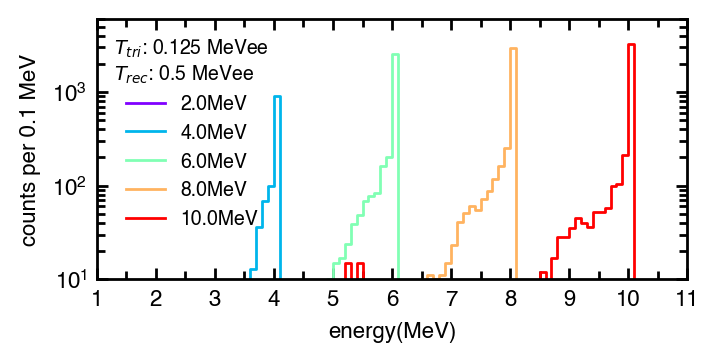

In [178]:
tri_LO_threshold =0.125
rec_LO_threshold =0.5
for i in np.arange(10,130,10):
    globals()["mask_"+str(int(i))+"MeV_scattered_neutron_E"] =  globals()["dataE_"+str(int(i))+"MeV"]['Rec_nE']>0.72
    globals()["mask_"+str(int(i))+"MeV_tri"] =  globals()["dataE_"+str(int(i))+"MeV"]['Tri_LO']>tri_LO_threshold
    globals()["mask_"+str(int(i))+"MeV_rec"] =  globals()["dataE_"+str(int(i))+"MeV"]['Rec_LO']>rec_LO_threshold
    globals()["pro_"+str(int(i))+"MeV"] = globals()["dataE_"+str(int(i))+"MeV"][(globals()["mask_"+str(int(i))+"MeV_tri"]&globals()["mask_"+str(int(i))+"MeV_rec"])]
    globals()["proT_"+str(int(i))+"MeV"] = globals()["dataE_"+str(int(i))+"MeV"][(globals()["mask_"+str(int(i))+"MeV_tri"]&globals()["mask_"+str(int(i))+"MeV_rec"]&globals()["mask_"+str(int(i))+"MeV_scattered_neutron_E"])]

#fig = fig_pre_def(14.8,3.5,1)# 圖片大小
fig = fig_pre_def(7.5,3.3,1)# 圖片大小
ax = fig.add_subplot(1, 1, 1)          # 產生1x1格圖片、在第一格
eff = [] 
divider=1
group = np.arange(20,120,20)
for i in group:
    axis,globals()["y_"+str(i)+"MeV"]=sorting(globals()["pro_"+str(int(i))+"MeV"]["Total_E"] ,130,0,13)
    axis,globals()["yT_"+str(i)+"MeV"]=sorting(globals()["proT_"+str(int(i))+"MeV"]["Total_E"] ,130,0,13)
    #print(globals()["y_"+str(i)+"MeV"])
    eff = np.append(eff, sum(globals()["y_"+str(i)+"MeV"]))
    bar_axis,globals()["bar_y_"+str(i)+"MeV"] = bar_plot(axis,globals()["y_"+str(i)+"MeV"],13/130)
    bar_axis,globals()["barT_y_"+str(i)+"MeV"] = bar_plot(axis,globals()["yT_"+str(i)+"MeV"],13/130)
print("efficiency: ",eff)

colors = cm.rainbow(np.linspace(0, 1, len(group)))
print(colors)

for i,c in zip(group,colors):
    #plt.plot(axis,globals()["y_"+str(i)+"MeV"]/divider,label=str(i/10)+" MeV",linewidth =1.5)
    plt.plot(bar_axis,globals()["bar_y_"+str(i)+"MeV"]/divider,linewidth =1,color=c, label=str(i/10)+"MeV"
             )
    #plt.plot(bar_axis,globals()["barT_y_"+str(i)+"MeV"]/divider,'--',linewidth =1,color='black', #,label=str(i/10)+"MeV"
      #       )


fig_post_def(xlim=(1,11),ylim=(0,6000/divider)
             ,xlabel="energy(MeV)",ylabel="counts per 0.1 MeV"
             ,xticks = (1,0.5),yticks = (1000/divider,500/divider)
             ,lg_fs=7,n_col =1
             ,title = r'$T_{tri}$: '+ str(tri_LO_threshold)+ ' MeVee \n$T_{rec}$: '+ str(rec_LO_threshold)+' MeVee') 
plt.yscale('log')
plt.ylim(10,6000)
plt.savefig('/Users/thlin/Dropbox/Research/Publication/2023 NSTOF/Figure/Python_export/Fig2_simulation_ret_E_0125_05.svg', format="svg")

#  Tri = 0.2 /Rec =0

In [ ]:
tri_LO_threshold =0.125
rec_LO_threshold =0.5
for i in np.arange(10,130,10):
    globals()["mask_"+str(int(i))+"MeV_scattered_neutron_E"] =  globals()["dataE_"+str(int(i))+"MeV"]['Rec_nE']>0.72
    globals()["mask_"+str(int(i))+"MeV_tri"] =  globals()["dataE_"+str(int(i))+"MeV"]['Tri_LO']>tri_LO_threshold
    globals()["mask_"+str(int(i))+"MeV_rec"] =  globals()["dataE_"+str(int(i))+"MeV"]['Rec_LO']>rec_LO_threshold
    globals()["pro_"+str(int(i))+"MeV"] = globals()["dataE_"+str(int(i))+"MeV"][(globals()["mask_"+str(int(i))+"MeV_tri"]&globals()["mask_"+str(int(i))+"MeV_rec"])]
    globals()["proT_"+str(int(i))+"MeV"] = globals()["dataE_"+str(int(i))+"MeV"][(globals()["mask_"+str(int(i))+"MeV_tri"]&globals()["mask_"+str(int(i))+"MeV_rec"]&globals()["mask_"+str(int(i))+"MeV_scattered_neutron_E"])]

KeyError: 'pro_15MeV'

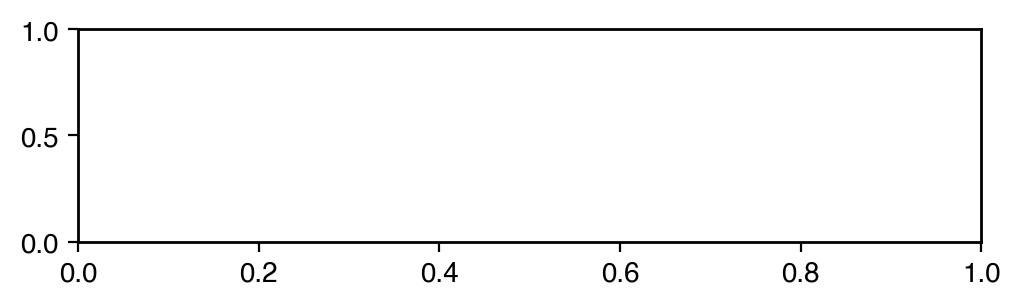

In [ ]:
tri_LO_threshold =0.125
rec_LO_threshold =0.5
for i in np.arange(10,130,10):
    globals()["mask_"+str(int(i))+"MeV_scattered_neutron_E"] =  globals()["dataE_"+str(int(i))+"MeV"]['Rec_nE']>0.72
    globals()["mask_"+str(int(i))+"MeV_tri"] =  globals()["dataE_"+str(int(i))+"MeV"]['Tri_LO']>tri_LO_threshold
    globals()["mask_"+str(int(i))+"MeV_rec"] =  globals()["dataE_"+str(int(i))+"MeV"]['Rec_LO']>rec_LO_threshold
    globals()["pro_"+str(int(i))+"MeV"] = globals()["dataE_"+str(int(i))+"MeV"][(globals()["mask_"+str(int(i))+"MeV_tri"]&globals()["mask_"+str(int(i))+"MeV_rec"])]
    globals()["proT_"+str(int(i))+"MeV"] = globals()["dataE_"+str(int(i))+"MeV"][(globals()["mask_"+str(int(i))+"MeV_tri"]&globals()["mask_"+str(int(i))+"MeV_rec"]&globals()["mask_"+str(int(i))+"MeV_scattered_neutron_E"])]
fig = fig_pre_def(14.8,3.5,1)# 圖片大小
ax = fig.add_subplot(1, 1, 1)          # 產生1x1格圖片、在第一格
eff = [] 
divider =1
for i in np.arange(10,130,10):
    axis,globals()["y_"+str(i)+"MeV"]=sorting(globals()["pro_"+str(int(i))+"MeV"]["Total_E"] ,130,0,13)
    #print(globals()["y_"+str(i)+"MeV"])
    bar_axis,globals()["bar03_y_"+str(i)+"MeV"] = bar_plot(axis,globals()["y_"+str(i)+"MeV"],13/130)
    eff = np.append(eff, sum(globals()["y_"+str(i)+"MeV"]))
print(i," .  ",eff)
peak_ratio_03=[]
for i in np.arange(10,125,5):
    #plt.plot(axis,globals()["y_"+str(i)+"MeV"]/divider,linewidth =1.2)#,label=str(i/10)+"MeV")
    plt.plot(bar_axis,globals()["bar03_y_"+str(i)+"MeV"]/divider,linewidth =1#,label=str(i/10)+"MeV"
             )
    peak_ratio_03 = np.append(peak_ratio_03,globals()["y_"+str(i)+"MeV"][i]/sum(globals()["y_"+str(i)+"MeV"]))
print(peak_ratio_03)

fig_post_def(xlim=(0,13)#,ylim=(0,8000/divider)
             ,xticks = (1,0.5)#,yticks = (2000/divider,500/divider)
             ,xlabel="energy(MeV)",ylabel="counts (x100)"
             ,lg_fs=9,n_col =2
             ,title = r'$T_{tri}$: '+ str(tri_LO_threshold)+ ' MeVee\n$T_{rec}$: '+ str(rec_LO_threshold)+' MeVee') 
plt.yscale('log')
plt.ylim(10,100000)
#plt.savefig('/Users/thlin/Dropbox/PhD_thesis_博士論文/Figure/NSTOF_simulation_threshold_3.svg', format="svg")

# tri = 0.2/ Rec= 0.3

efficiency:  [   0.    0.    0.    0.  750. 2004. 3031. 3338. 3582. 3852. 3845. 3870.]
120  .   [   0.    0.    0.    0.  750. 2004. 3031. 3338. 3582. 3852. 3845. 3870.]
3034.0
[       nan        nan        nan        nan 0.82533333 0.79441118
 0.7852194  0.75104853 0.79006142 0.7834891  0.7716515  0.7870801 ]


/var/folders/qd/hhwc9gc95fv6tx8vycl4f3bm0000gn/T/ipykernel_65223/3410053969.py:24: RuntimeWarning: invalid value encountered in scalar divide
  peak_ratio_05 = np.append(peak_ratio_05,globals()["y_"+str(i)+"MeV"][i]/sum(globals()["y_"+str(i)+"MeV"]))


(1, 12000)

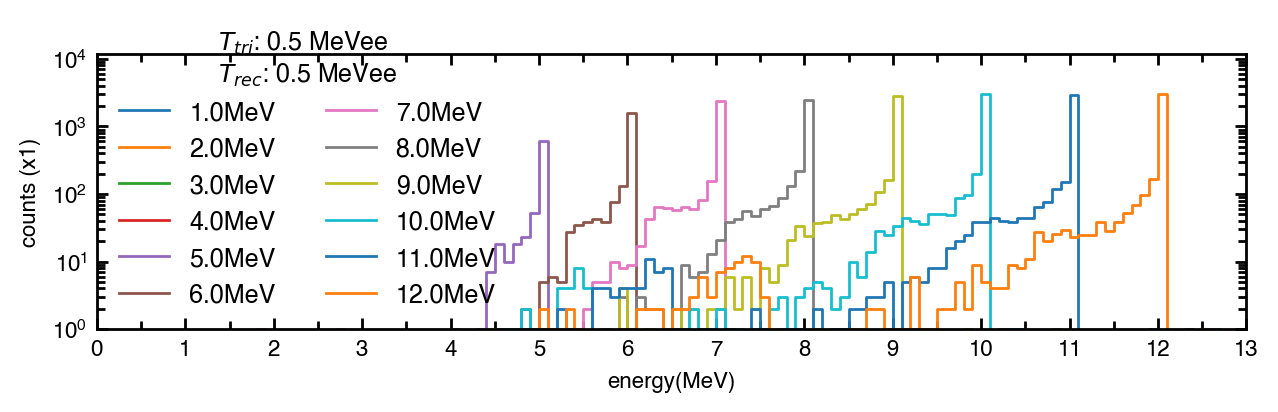

In [31]:
tri_LO_threshold =0.5
rec_LO_threshold =0.5
for i in np.arange(10,130,10):
    globals()["mask_"+str(int(i))+"MeV_tri"] =  globals()["dataE_"+str(int(i))+"MeV"]['Tri_LO']>tri_LO_threshold
    globals()["mask_"+str(int(i))+"MeV_rec"] =  globals()["dataE_"+str(int(i))+"MeV"]['Rec_LO']>rec_LO_threshold
    globals()["pro_"+str(int(i))+"MeV"] = globals()["dataE_"+str(int(i))+"MeV"][(globals()["mask_"+str(int(i))+"MeV_tri"]&globals()["mask_"+str(int(i))+"MeV_rec"])]
fig = fig_pre_def(14.6,3.5,1)# 圖片大小
ax = fig.add_subplot(1, 1, 1)          # 產生1x1格圖片、在第一格
eff = [] 
divider=1
for i in np.arange(10,130,10):
    axis,globals()["y_"+str(i)+"MeV"]=sorting(globals()["pro_"+str(int(i))+"MeV"]["Total_E"] ,130,0,13)
    #print(globals()["y_"+str(i)+"MeV"])
    eff = np.append(eff, sum(globals()["y_"+str(i)+"MeV"]))

    bar_axis,globals()["bar05_y_"+str(i)+"MeV"] = bar_plot(axis,globals()["y_"+str(i)+"MeV"],13/130)
print("efficiency: ",eff)
print(i," .  ",eff)
print(np.average(eff[4:]))
peak_ratio_05=[]
for i in np.arange(10,130,10):
    #plt.plot(axis,globals()["y_"+str(i)+"MeV"]/divider,linewidth =1.2)#,label=str(i/10)+"MeV")
    plt.plot(bar_axis,globals()["bar05_y_"+str(i)+"MeV"]/divider,label=str(i/10)+"MeV",linewidth =1)
    peak_ratio_05 = np.append(peak_ratio_05,globals()["y_"+str(i)+"MeV"][i]/sum(globals()["y_"+str(i)+"MeV"]))
print(peak_ratio_05)

fig_post_def(xlim=(0,13),ylim=(0,6000/divider)
             ,xlabel="energy(MeV)",ylabel="counts (x"+str(divider)+")"
             ,xticks = (1,0.5),yticks = (1000/divider,500/divider)
             ,lg_fs=9,n_col =2
             ,title = r'$T_{tri}$: '+ str(tri_LO_threshold)+ ' MeVee\n$T_{rec}$: '+ str(rec_LO_threshold)+' MeVee') 
plt.yscale('log')
plt.ylim(1,12000)
#plt.savefig('/Users/thlin/Dropbox/PhD_thesis_博士論文/Figure/NSTOF_simulation_threshold_4.svg', format="svg")

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


(0.0001, 1.2)

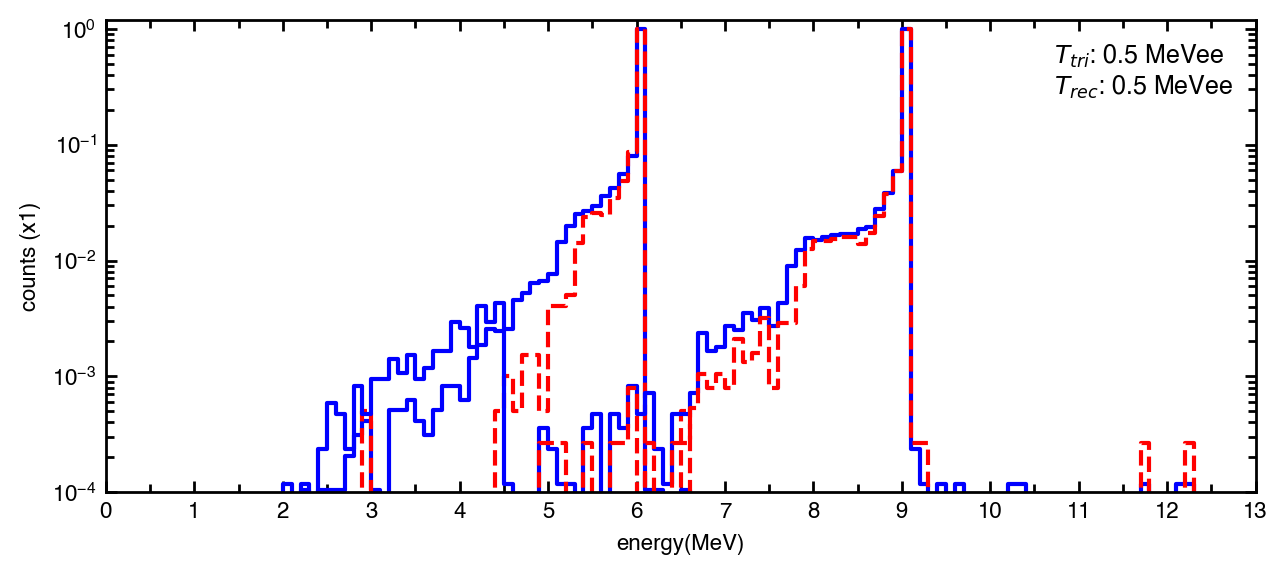

In [ ]:
fig = fig_pre_def(14.6,6,1)# 圖片大小
ax = fig.add_subplot(1, 1, 1)          # 產生1x1格圖片、在第一格

for i in np.arange(60,120,30):
    plt.plot(bar_axis,globals()["bar0125_y_"+str(i)+"MeV"]/max(globals()["bar0125_y_"+str(i)+"MeV"]),'b')#,label=str(i/10)+"MeV",linewidth =1)
    plt.plot(bar_axis,globals()["bar05_y_"+str(i)+"MeV"]/max(globals()["bar05_y_"+str(i)+"MeV"]),'--r')#,label=str(i/10)+"MeV",linewidth =1)
    #peak_ratio_05 = np.append(peak_ratio_05,sum(globals()["y_"+str(i)+"MeV"][i-1:i+1])/sum(globals()["y_"+str(i)+"MeV"]))
#print(peak_ratio_05)

fig_post_def(xlim=(0,13),ylim=(0,1.2/divider)
             ,xlabel="energy(MeV)",ylabel="counts (x"+str(divider)+")"
             ,xticks = (1,0.5),yticks = (1000/divider,500/divider)
             ,lg_fs=9,n_col =2
             ,title = r'$T_{tri}$: '+ str(tri_LO_threshold)+ ' MeVee\n$T_{rec}$: '+ str(rec_LO_threshold)+' MeVee') 
plt.yscale('log')
plt.ylim(0.0001,1.2)
#plt.savefig('/Users/thlin/Dropbox/PhD_thesis_博士論文/Figure/NSTOF_simulation_threshold_4.svg', format="svg")

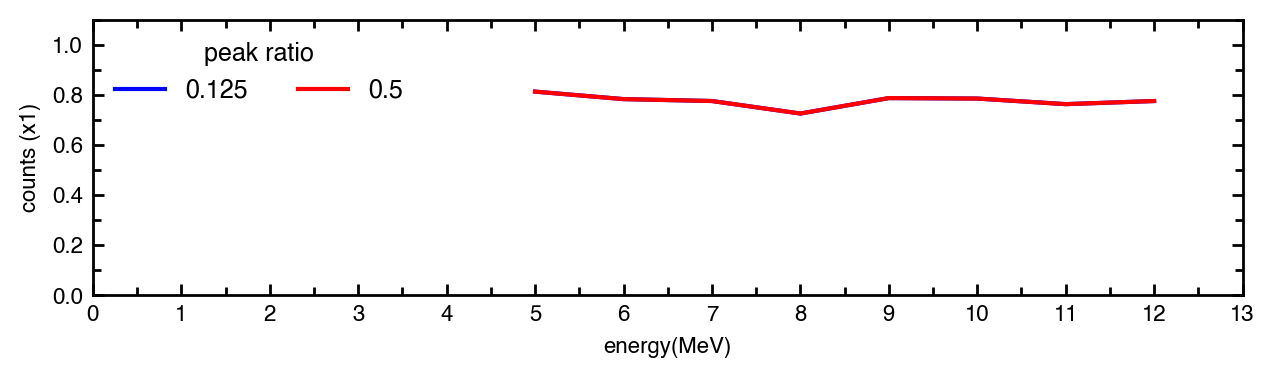

In [ ]:
fig = fig_pre_def(14.6,3.5,1)# 圖片大小
ax = fig.add_subplot(1, 1, 1)          # 產生1x1格圖片、在第一格
peak_ratio_x = np.arange(1,13,1)
plt.plot(peak_ratio_x,peak_ratio_0125,'b',label = '0.125')
plt.plot(peak_ratio_x,peak_ratio_05,'r',label = '0.5')
fig_post_def(xlim=(0,13),ylim=(0,1.1)
             ,xlabel="energy(MeV)",ylabel="counts (x"+str(divider)+")"
             ,xticks = (1,0.5),yticks = (0.2,0.1)
             ,lg_fs=9,n_col =2
             ,title = r'peak ratio') 

#plt.savefig('/Users/thlin/Dropbox/PhD_thesis_博士論文/Figure/NSTOF_simulation_threshold_4.svg', format="svg")

In [ ]:
tri_LO_threshold =0.5
rec_LO_threshold =0.5
for i in np.arange(10,130,10):
    globals()["mask_"+str(int(i))+"MeV_tri"] =  globals()["dataE_"+str(int(i))+"MeV"]['Tri_LO']>tri_LO_threshold
    globals()["mask_"+str(int(i))+"MeV_rec"] =  globals()["dataE_"+str(int(i))+"MeV"]['Rec_LO']>rec_LO_threshold
    globals()["pro_"+str(int(i))+"MeV"] = globals()["dataE_"+str(int(i))+"MeV"][(globals()["mask_"+str(int(i))+"MeV_tri"]&globals()["mask_"+str(int(i))+"MeV_rec"])]

efficiency:  [   0.    0.    0.    0. 1013. 2520. 3901. 4283. 4805. 4967. 4925. 5020.]
120  .   [   0.    0.    0.    0. 1013. 2520. 3901. 4283. 4805. 4967. 4925. 5020.]
3929.25
3105 884


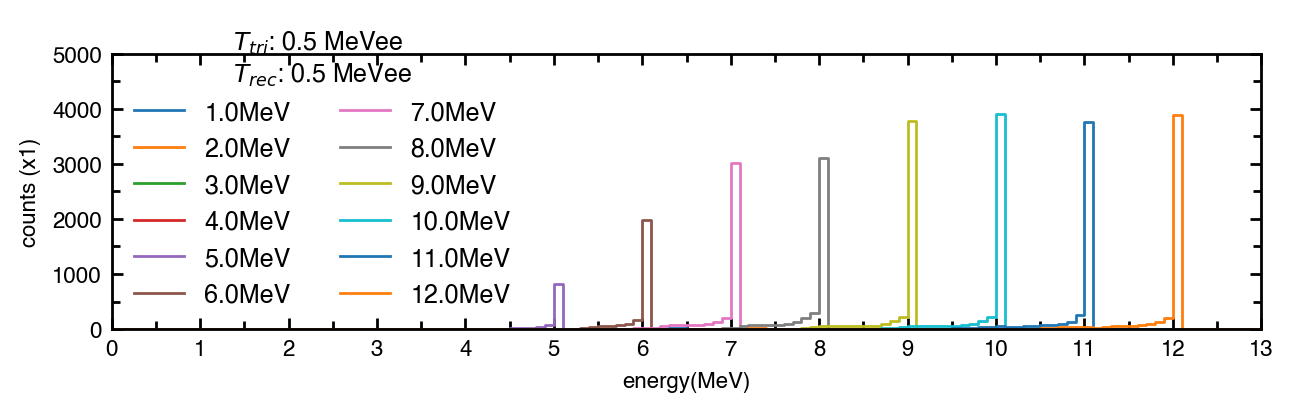

In [ ]:
fig = fig_pre_def(14.6,3.5,1)# 圖片大小
ax = fig.add_subplot(1, 1, 1)          # 產生1x1格圖片、在第一格
eff = [] 
divider=1
for i in np.arange(10,130,10):
    axis,globals()["y_"+str(i)+"MeV"]=sorting(globals()["pro_"+str(int(i))+"MeV"]["Rec_nE"]+globals()["pro_"+str(int(i))+"MeV"]["Recoil_p_E"] ,130,0,13)
    #print(globals()["y_"+str(i)+"MeV"])
    eff = np.append(eff, sum(globals()["y_"+str(i)+"MeV"]))

    bar_axis,globals()["bar_y_"+str(i)+"MeV"] = bar_plot(axis,globals()["y_"+str(i)+"MeV"],13/130)
print("efficiency: ",eff)
print(i," .  ",eff)
print(np.average(eff[4:]))
for i in np.arange(10,130,10):
    #plt.plot(axis,globals()["y_"+str(i)+"MeV"]/divider,linewidth =1.2)#,label=str(i/10)+"MeV")
    plt.plot(bar_axis,globals()["bar_y_"+str(i)+"MeV"]/divider,label=str(i/10)+"MeV",linewidth =1)
print(y_80MeV[80],sum(y_80MeV[0:79]))
fig_post_def(xlim=(0,13),ylim=(0,5000/divider)
             ,xlabel="energy(MeV)",ylabel="counts (x"+str(divider)+")"
             ,xticks = (1,0.5),yticks = (1000/divider,500/divider)
             ,lg_fs=9,n_col =2
             ,title = r'$T_{tri}$: '+ str(tri_LO_threshold)+ ' MeVee\n$T_{rec}$: '+ str(rec_LO_threshold)+' MeVee') 

#plt.savefig('/Users/thlin/Dropbox/PhD_thesis_博士論文/Figure/NSTOF_simulation_threshold_4.svg', format="svg")

In [ ]:
tri_LO_threshold =0.2
rec_LO_threshold =0.50
for i in np.arange(10,120,10):
    globals()["mask_"+str(int(i))+"MeV_tri"] =  globals()["dataE_"+str(int(i))+"MeV"]['Tri_LO']>tri_LO_threshold
    globals()["mask_"+str(int(i))+"MeV_rec"] =  globals()["dataE_"+str(int(i))+"MeV"]['Rec_LO']>rec_LO_threshold
    globals()["pro_"+str(int(i))+"MeV"] = globals()["dataE_"+str(int(i))+"MeV"][(globals()["mask_"+str(int(i))+"MeV_tri"]&globals()["mask_"+str(int(i))+"MeV_rec"])]

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


110  .   [  0.   0.   0. 104. 312. 430. 509. 504. 548. 584. 536.]
110  . max eff   [  0.   0.   0.  82. 253. 322. 405. 361. 426. 455. 393.]
489.0


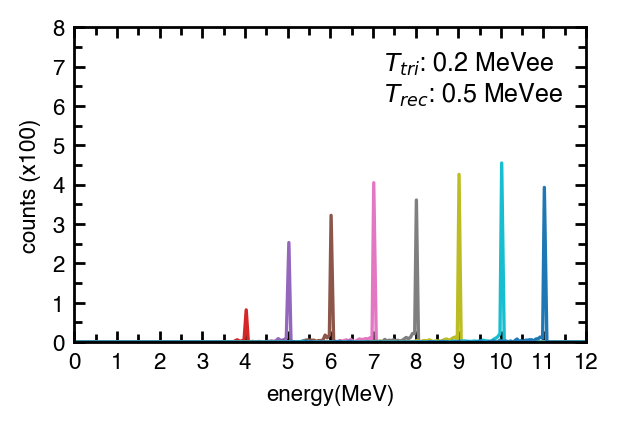

In [ ]:
fig = fig_pre_def(6.5,4,1)# 圖片大小
ax = fig.add_subplot(1, 1, 1)          # 產生1x1格圖片、在第一格
eff = []
max_eff =[]
divider=100
for i in np.arange(10,120,10):
    axis,globals()["y_"+str(i)+"MeV"]=sorting(globals()["pro_"+str(int(i))+"MeV"]["Rec_nE"]+globals()["pro_"+str(int(i))+"MeV"]["Recoil_p_E"] ,240,0,12)
    #print(globals()["y_"+str(i)+"MeV"])
    eff = np.append(eff, sum(globals()["y_"+str(i)+"MeV"]))
    max_eff = np.append(max_eff, np.max(globals()["y_"+str(i)+"MeV"]))
print(i," .  ",eff)
print(i," . max eff  ",max_eff)
print(np.average(eff[4:]))
for i in np.arange(10,120,10):
    plt.plot(axis,globals()["y_"+str(i)+"MeV"]/divider,linewidth =1.2)#,label=str(i/10)+"MeV")

fig_post_def(xlim=(0,12),ylim=(0,800/divider)
             ,xlabel="energy(MeV)",ylabel="counts (x100)"
             ,xticks = (1,0.5),yticks = (100/divider,50/divider)
             ,lg_fs=9,n_col =2
             ,title = r'$T_{tri}$: '+ str(tri_LO_threshold)+ ' MeVee\n$T_{rec}$: '+ str(rec_LO_threshold)+' MeVee') 
#plt.savefig('/Users/thlin/Dropbox/PhD_thesis_博士論文/Figure/NSTOF_simulation_threshold_4.svg', format="svg")

In [ ]:
print(sum(y_60MeV))

694


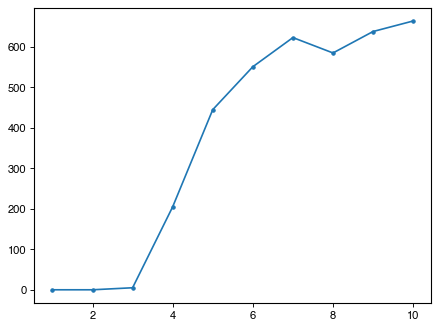

In [ ]:
E_x = np.arange(1,11,1)
plt.plot(E_x,eff,'.-')

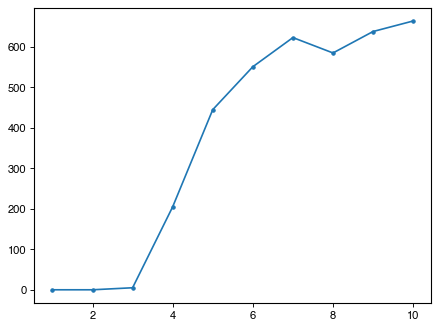

In [ ]:
output_effeciency = np.arange(1,11,1)[:,np.newaxis]
output_effeciency = np.column_stack((output_effeciency,eff[:,np.newaxis]))
plt.plot(output_effeciency[:,0],output_effeciency[:,1],'.-')

In [ ]:
np.savetxt('Deg60_TOF_effciency_threshold.txt',output_effeciency)

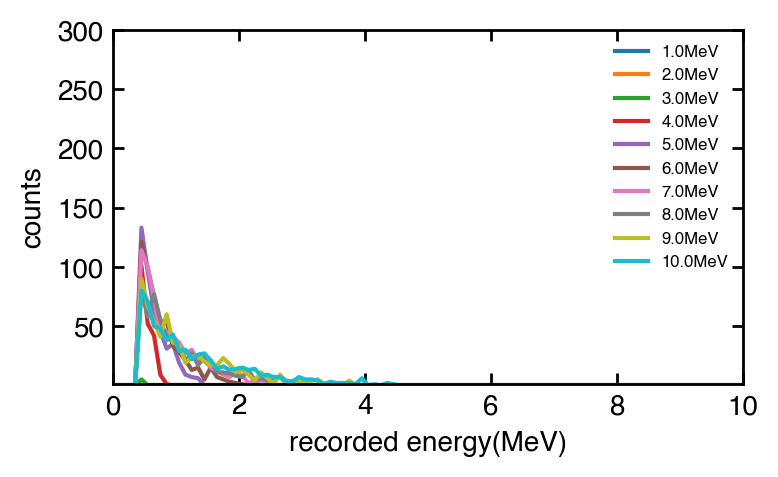

In [ ]:
eff=[]
fig = fig_pre_def(8,4.5,1)# 圖片大小
ax = fig.add_subplot(1, 1, 1)          # 產生1x1格圖片、在第一格
for i in np.arange(10,110,10):
    axis,globals()["y_"+str(i)+"MeV"]=sorting(globals()["pro_"+str(int(i))+"MeV"]["Rec_LO"] ,100,0,10)
    eff = np.append(eff, sum(globals()["y_"+str(i)+"MeV"]))
for i in np.arange(10,110,10):
    plt.plot(axis,globals()["y_"+str(i)+"MeV"],label=str(i/10)+"MeV")
fig_post_def(xlim=(0,10),ylim=(1,300),xlabel="recorded energy(MeV)",ylabel="counts")  

# 8 MeV

In [50]:

C_data_80MeV=[]
for i in np.arange(0,32,1):
    #print(i)
    if i ==0:
        C_data_80MeV = np.loadtxt("../../../../data/NSTOF_simulation_mono_Energy/Output202404_BERT_HP_simulation_60deg_mono_E_2E9/202404_BERT_C_EJ309_N_scatter_exp_60deg_2E9_All_in_one_8.0MeV_"+str(int(i))+".txt")
    else:
        C_data_80MeV_temp = np.loadtxt("../../../../data/NSTOF_simulation_mono_Energy/Output202404_BERT_HP_simulation_60deg_mono_E_2E9/202404_BERT_C_EJ309_N_scatter_exp_60deg_2E9_All_in_one_8.0MeV_"+str(int(i))+".txt")
        C_data_80MeV = np.vstack((C_data_80MeV,C_data_80MeV_temp))
i=80 
globals()["C_data_80MeV"] = pd.DataFrame(globals()["C_data_80MeV"],columns=["core","counts","Tri_LO","Tri_pE","Rec_nE","Rec_LO","Tri_p_num","inelastic","carbon_LO"])
print(C_data_80MeV.head)


data_80MeV=[]
i=8.0
for ii in np.arange(0,32,1):
    if ii ==0:
        globals()["data_"+str(int(i*10))+"MeV"]= pd.read_csv("../../../../data/NSTOF_simulation_mono_Energy/Output202403_BERT_HP_simulation_60deg_mono_E_2E9/202402_BERT_EJ309_N_scatter_exp_60deg_2E9_All_in_one_"+str(i)+"MeV_"+str(int(ii))+".txt", sep="\s+", header=None)
    else:
        temp = pd.read_csv("../../../../data/NSTOF_simulation_mono_Energy/Output202403_BERT_HP_simulation_60deg_mono_E_2E9/202402_BERT_EJ309_N_scatter_exp_60deg_2E9_All_in_one_"+str(i)+"MeV_"+str(int(ii))+".txt", sep="\s+", header=None)
        globals()["data_"+str(int(i*10))+"MeV"] = np.vstack((globals()["data_"+str(int(i*10))+"MeV"],temp))
i=80 
globals()["data_"+str(int(i))+"MeV"] = pd.DataFrame(globals()["data_"+str(int(i))+"MeV"],columns=["core","counts","Tri_LO","Tri_pE","Rec_nE","Rec_LO","Tri_p_num","inelastic"])


<bound method NDFrame.head of        core  counts    Tri_LO    Tri_pE    Rec_nE    Rec_LO  Tri_p_num  \
0       0.0     1.0  0.007836  0.460929  7.539240  0.018545      100.0   
1       0.0     2.0  0.190948  1.734820  1.785210  0.236255      201.0   
2       0.0     3.0  0.005223  0.307253  7.692860  0.007389      100.0   
3       0.0     4.0  0.001549  0.091130  7.908900  0.003717      100.0   
4       0.0     5.0  1.313000  3.688800  4.313200  0.001168        1.0   
...     ...     ...       ...       ...       ...       ...        ...   
32829  31.0  1010.0  3.069600  7.868960  0.135255  0.005926      105.0   
32830  31.0  1011.0  3.030070  7.569720  0.352080  0.017027        2.0   
32831  31.0  1012.0  2.609010  6.083270  1.920020  0.157887        1.0   
32832  31.0  1013.0  2.191500  6.490260  1.513260  0.111540        2.0   
32833  31.0  1014.0  2.360700  5.645050  2.358000  0.187069        1.0   

       inelastic  carbon_LO  
0            0.0   0.007836  
1            1.0   0.

In [51]:
globals()["C_data_80MeV"] = globals()["C_data_"+str(int(i))+"MeV"].copy()
globals()["C_data_80MeV"]["Recoil_p_E"] = globals()["C_data_"+str(int(i))+"MeV"]['Tri_LO'].apply(lambda x:P_Energy_inter[int(x*100000)])
globals()["C_data_80MeV"]["Recoil_p_E_diff"] = globals()["C_data_"+str(int(i))+"MeV"]['Recoil_p_E']/globals()["C_data_"+str(int(i))+"MeV"]['Tri_pE']
globals()["C_data_80MeV"]["Total_E"] = globals()["C_data_"+str(int(i))+"MeV"]['Rec_nE']+globals()["C_data_"+str(int(i))+"MeV"]['Recoil_p_E']
maskT = C_data_80MeV['Rec_nE']>0.0
CT_data_80MeV = C_data_80MeV[maskT]
axis,C_y_80MeV=sorting(globals()["CT_data_80MeV"]["Tri_LO"] ,1200,0,12)
axis,C_LO_y_80MeV=sorting(globals()["C_data_80MeV"]["carbon_LO"] ,1200,0,12)
axis,CT_y_80MeV=sorting(globals()["CT_data_80MeV"]["Tri_LO"] ,1200,0,12)

globals()["data_80MeV"] = globals()["data_"+str(int(i))+"MeV"].copy()
globals()["data_80MeV"]["Recoil_p_E"] = globals()["dataE_"+str(int(i))+"MeV"]['Tri_LO'].apply(lambda x:P_Energy_inter[int(x*100000)])
globals()["data_80MeV"]["Recoil_p_E_diff"] = globals()["dataE_"+str(int(i))+"MeV"]['Recoil_p_E']/globals()["dataE_"+str(int(i))+"MeV"]['Tri_pE']
globals()["data_80MeV"]["Total_E"] = globals()["dataE_"+str(int(i))+"MeV"]['Rec_nE']+globals()["dataE_"+str(int(i))+"MeV"]['Recoil_p_E']
maskT = data_80MeV['Rec_nE']>0.0
data_80MeV = data_80MeV[maskT]
axis,y_80MeV=sorting(globals()["data_80MeV"]["Tri_LO"] ,1200,0,12)

In [53]:
axis,E_C_y_80MeV=sorting(globals()["C_data_80MeV"]["Total_E"] ,120,0,12)
#axis,E_C_LO_y_80MeV=sorting(globals()["C_data_80MeV"]["carbon_LO"] ,1200,0,12)
axis,E_CT_y_80MeV=sorting(globals()["CT_data_80MeV"]["Total_E"] ,120,0,12)
axis,E_y_80MeV=sorting(globals()["data_80MeV"]["Total_E"] ,120,0,12)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


(1, 10000000)

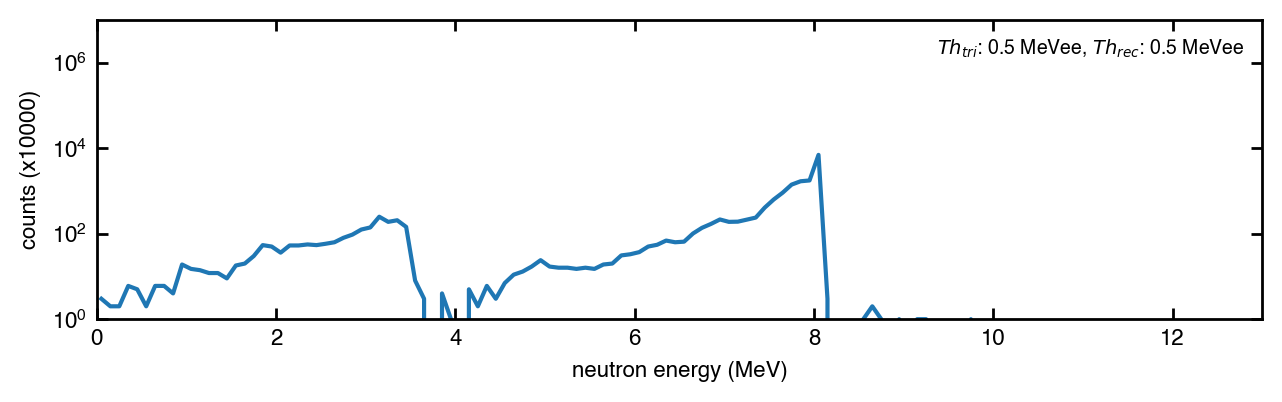

In [54]:

fig = fig_pre_def(14.8,3.8,1)# 圖片大小
ax = fig.add_subplot(1, 1, 1)          # 產生1x1格圖片、在第一格


plt.plot(axis,E_y_80MeV)

fig_post_def(xlim=(0,13),ylim=(0,30000)
             #,xticks = (1,0.5),yticks = (10000/divider,5000/divider)
             ,xlabel="neutron energy (MeV)",ylabel="counts (x10000)"
             ,lg_fs=7,n_col =4
             ,title = r'$Th_{tri}$: '+ str(tri_LO_threshold)+ ' MeVee, $Th_{rec}$: '+ str(rec_LO_threshold)+' MeVee') 
plt.yscale('log')
plt.ylim(1,10000000)

#plt.savefig('/Users/thlin/Dropbox/Research/Publication/2023 NSTOF/Figure/Python_export/Fig2_simulation_ret_E_0_0.svg', format="svg")


In [55]:
print(C_data_80MeV)

       core  counts    Tri_LO    Tri_pE    Rec_nE    Rec_LO  Tri_p_num  \
0       0.0     1.0  0.007836  0.460929  7.539240  0.018545      100.0   
1       0.0     2.0  0.190948  1.734820  1.785210  0.236255      201.0   
2       0.0     3.0  0.005223  0.307253  7.692860  0.007389      100.0   
3       0.0     4.0  0.001549  0.091130  7.908900  0.003717      100.0   
4       0.0     5.0  1.313000  3.688800  4.313200  0.001168        1.0   
...     ...     ...       ...       ...       ...       ...        ...   
32829  31.0  1010.0  3.069600  7.868960  0.135255  0.005926      105.0   
32830  31.0  1011.0  3.030070  7.569720  0.352080  0.017027        2.0   
32831  31.0  1012.0  2.609010  6.083270  1.920020  0.157887        1.0   
32832  31.0  1013.0  2.191500  6.490260  1.513260  0.111540        2.0   
32833  31.0  1014.0  2.360700  5.645050  2.358000  0.187069        1.0   

       inelastic  carbon_LO  Recoil_p_E  Recoil_p_E_diff   Total_E  
0            0.0   0.007836    0.091479   

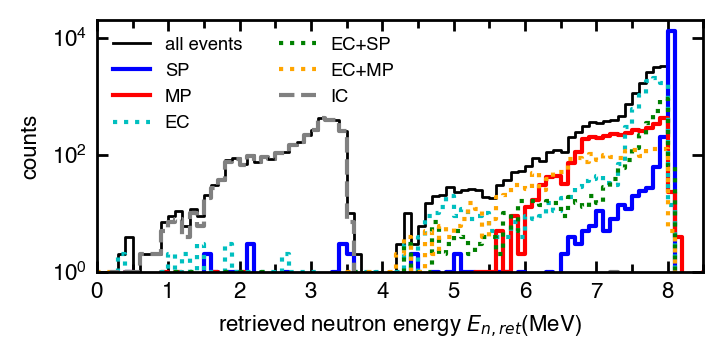

In [117]:
LOmask_Rec_E = C_data_80MeV["Tri_pE"]+C_data_80MeV["Rec_nE"]<10.01
LOmask_Rec_U = C_data_80MeV['Rec_LO']>0.0
LOmask_U = C_data_80MeV['Tri_LO']>0.0
LOmask_L = C_data_80MeV['Tri_LO']<10

LOmask_All = C_data_80MeV['Tri_p_num']>0
LOmask_SP   = C_data_80MeV['Tri_p_num']==1
LOmask_MS_L = C_data_80MeV['Tri_p_num']>1
LOmask_MS_U = C_data_80MeV['Tri_p_num']<100
LOmask_C = C_data_80MeV['Tri_p_num']==100
LOmask_C_SP = C_data_80MeV['Tri_p_num']==101
LOmask_C_MS = C_data_80MeV['Tri_p_num']>101
LOmask_C_MS_U = C_data_80MeV['Tri_p_num']<200
LOmask_C_1 = C_data_80MeV['Tri_p_num']==200
LOmask_1P_MC_1 = C_data_80MeV['Tri_p_num']==201
LOmask_1P_MC_1_L = C_data_80MeV['Tri_p_num']>201
LOmask_1P_MC_1_U = C_data_80MeV['Tri_p_num']<300
LOmask_C_2 = C_data_80MeV['Tri_p_num']==300
LOmask_1P_MC_2 = C_data_80MeV['Tri_p_num']==301
LOmask_1P_MC_2_L = C_data_80MeV['Tri_p_num']>301
LOmask_1P_MC_2_U = C_data_80MeV['Tri_p_num']<400
LOmask_C_3 = C_data_80MeV['Tri_p_num']==400
LOmask_1P_MC_3 = C_data_80MeV['Tri_p_num']==401
LOmask_1P_MC_3_L = C_data_80MeV['Tri_p_num']>401
LOmask_1P_MC_3_U = C_data_80MeV['Tri_p_num']<500
LOmask_C_4 = C_data_80MeV['Tri_p_num']==500
LOmask_1P_MC_4 = C_data_80MeV['Tri_p_num']==501
LOmask_1P_MC_4_L = C_data_80MeV['Tri_p_num']>501
LOmask_1P_MC_4_U = C_data_80MeV['Tri_p_num']<600
LOmask_C_inlastic = C_data_80MeV['inelastic']==1
LOmask_C_elastic = C_data_80MeV['inelastic']==0
LOmask_C_except_Al = C_data_80MeV['inelastic']<2

# All
LO_data_80MeV         = C_data_80MeV[(LOmask_Rec_E&LOmask_Rec_U&LOmask_U&LOmask_L&LOmask_All&LOmask_C_except_Al)]
# single recoil proton
LO_data_80MeV_SP      = C_data_80MeV[(LOmask_Rec_E&LOmask_Rec_U&LOmask_U&LOmask_L&LOmask_SP&LOmask_C_elastic)]
# multiple scattering proton
LO_data_80MeV_MS      = C_data_80MeV[(LOmask_Rec_E&LOmask_Rec_U&LOmask_U&LOmask_L&LOmask_MS_L&LOmask_MS_U&LOmask_C_elastic)]
# elastic carbon involved 
LO_data_80MeV_Proton_carbon_elastic = C_data_80MeV[(LOmask_Rec_E&LOmask_Rec_U&LOmask_U&LOmask_L&LOmask_C_elastic&(LOmask_C_SP|LOmask_1P_MC_1|LOmask_1P_MC_2|LOmask_1P_MC_3|LOmask_1P_MC_4))]

# Multiple carbon and proton
LO_data_80MeV_C_MS    = C_data_80MeV[(LOmask_Rec_E&LOmask_Rec_U&LOmask_U&LOmask_L&LOmask_C_elastic&
                                      (#LOmask_C_1|LOmask_C|LOmask_C_2|LOmask_C_3|LOmask_C_4|
                                       (LOmask_C_MS&LOmask_C_MS_U)|(LOmask_1P_MC_1_L&LOmask_1P_MC_1_U)|(LOmask_1P_MC_2_L&LOmask_1P_MC_2_U)
                                       |(LOmask_1P_MC_3_L&LOmask_1P_MC_3_U)|(LOmask_1P_MC_4_L&LOmask_1P_MC_4_U)))]
#LO_data_80MeV_1P_MC   = C_data_80MeV[(LOmask_Rec_E&LOmask_Rec_U&LOmask_U&LOmask_L&LOmask_C_elastic&(LOmask_1P_MC_1|LOmask_1P_MC_2))]
# inelastic carbon 
LO_data_80MeV_Proton_carbon_inelastic   = C_data_80MeV[(LOmask_Rec_E&LOmask_Rec_U&LOmask_U&LOmask_L&LOmask_C_inlastic)]
# only elastic carbon involved 
LO_data_80MeV_Proton_carbon_elastic_only = C_data_80MeV[(LOmask_Rec_E&LOmask_Rec_U&LOmask_U&LOmask_L&LOmask_C_elastic&(LOmask_C|LOmask_C_1|LOmask_C_2|LOmask_C_3|LOmask_C_4))]

bin =120
axis,y_80MeV_All      =sorting(LO_data_80MeV["Total_E"] ,bin,0,12)
axis,y_80MeV_SP       =sorting(LO_data_80MeV_SP["Total_E"] ,bin,0,12)
axis,y_80MeV_MS       =sorting(LO_data_80MeV_MS["Total_E"] ,bin,0,12)
axis,y_80MeV_P_C_e    =sorting(LO_data_80MeV_Proton_carbon_elastic["Total_E"] ,bin,0,12)
axis,y_80MeV_P_C_ine  =sorting(LO_data_80MeV_Proton_carbon_inelastic["Total_E"] ,bin,0,12)
axis,y_80MeV_C_MS     =sorting(LO_data_80MeV_C_MS["Total_E"] ,bin,0,12)
#axis,y_80MeV_1P_MC    =sorting(LO_data_80MeV_1P_MC["Total_E"] ,bin,0,12)
axis,y_80MeV_C_only    =sorting(LO_data_80MeV_Proton_carbon_elastic_only["Total_E"] ,bin,0,12)


bar_axis,bar_y_80MeV_All      =bar_plot(axis,y_80MeV_All    ,0.1)
bar_axis,bar_y_80MeV_SP       =bar_plot(axis,y_80MeV_SP     ,0.1)
bar_axis,bar_y_80MeV_MS       =bar_plot(axis,y_80MeV_MS     ,0.1)
bar_axis,bar_y_80MeV_P_C_e    =bar_plot(axis,y_80MeV_P_C_e  ,0.1)
bar_axis,bar_y_80MeV_P_C_ine  =bar_plot(axis,y_80MeV_P_C_ine,0.1)
bar_axis,bar_y_80MeV_C_MS     =bar_plot(axis,y_80MeV_C_MS   ,0.1)
#bar_axis,bar_y_80MeV_1P_MC    =bar_plot(axis,y_80MeV_1P_MC  ,0.1)
bar_axis,bar_y_80MeV_C_only    =bar_plot(axis,y_80MeV_C_only  ,0.1)

fig = fig_pre_def(7.7,3.2,1)# 圖片大小
ax = fig.add_subplot(1, 1, 1)          # 產生1x1格圖片、在第一格
plt.plot(bar_axis,bar_y_80MeV_All,'-k',linewidth =1,label = 'all events')
plt.plot(bar_axis,bar_y_80MeV_SP,'b',label = 'SP')# single elastic scattering proton')
plt.plot(bar_axis,bar_y_80MeV_MS,'-r',label ='MP')# multiple elastic scattering protons')
plt.plot(bar_axis,bar_y_80MeV_C_only ,':c',label ='EC')# (elastic carbon)')
plt.plot(bar_axis,bar_y_80MeV_P_C_e,':g',label ='EC+SP')# single elastic scattering proton and elastic scattering carbon')
plt.plot(bar_axis,bar_y_80MeV_C_MS ,':',color='orange',label ='EC+MP')# (multiple carbons and protons)')
plt.plot(bar_axis,bar_y_80MeV_P_C_ine,'--',color='gray',label ='IC')# inelastic carbon')



bar_all = bar_y_80MeV_SP+bar_y_80MeV_MS+bar_y_80MeV_P_C_e+bar_y_80MeV_P_C_ine+bar_y_80MeV_C_MS+bar_y_80MeV_C_only
#plt.plot(bar_axis,bar_all,'-',color='orange',label ='All_test')


#plt.plot(bar_axis,bar_y_80MeV_1P_MC,'--',color='gray',label ='one proton + multiple elatic carbon')
#plt.plot(bar_axis,bar_y_80MeV_C_MS-bar_y_80MeV_1P_MC,'--',color='orange',label ='multi proton + multiple carbon')
#plt.plot(axis,y_80MeV_SP+y_80MeV_MS+y_80MeV_C_SP+y_80MeV_C_MS,'--c',label ='sum')

fig_post_def(xlim=(0,8.5),xticks=(1,0.5)
             ,ylim=(1,20000)
             ,xlabel="retrieved neutron energy $E_{n,ret}$(MeV)",ylabel="counts"
             #,xticks = (1,0.5),yticks = (0.2,0.1)
             ,lg_fs=6.6,n_col =2
             #,title = '8 MeV'
             ) 
plt.yscale('log')

plt.savefig('/Users/thlin/Dropbox/Research/Publication/2023 NSTOF/Figure/Python_export/Fig2_th0_LO_ret.svg', format="svg")

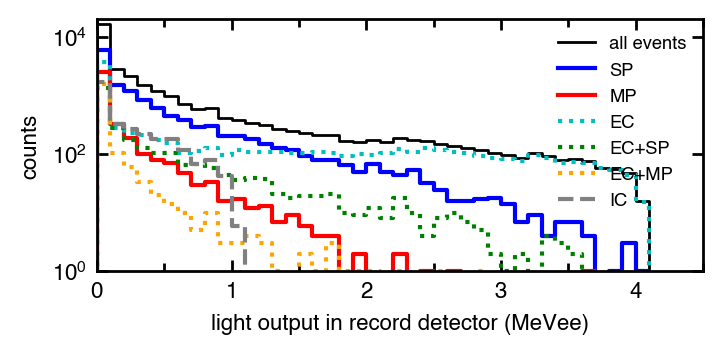

In [120]:

bin =120
axis,y_80MeV_All      =sorting(LO_data_80MeV['Rec_LO'] ,bin,0,12)
axis,y_80MeV_SP       =sorting(LO_data_80MeV_SP["Rec_LO"] ,bin,0,12)
axis,y_80MeV_MS       =sorting(LO_data_80MeV_MS["Rec_LO"] ,bin,0,12)
axis,y_80MeV_P_C_e    =sorting(LO_data_80MeV_Proton_carbon_elastic["Rec_LO"] ,bin,0,12)
axis,y_80MeV_P_C_ine  =sorting(LO_data_80MeV_Proton_carbon_inelastic["Rec_LO"] ,bin,0,12)
axis,y_80MeV_C_MS     =sorting(LO_data_80MeV_C_MS["Rec_LO"] ,bin,0,12)
#axis,y_80MeV_1P_MC    =sorting(LO_data_80MeV_1P_MC["Rec_LO"] ,bin,0,12)
axis,y_80MeV_C_only    =sorting(LO_data_80MeV_Proton_carbon_elastic_only["Rec_LO"] ,bin,0,12)

bar_axis,bar_y_80MeV_All      =bar_plot(axis,y_80MeV_All    ,0.1)
bar_axis,bar_y_80MeV_SP       =bar_plot(axis,y_80MeV_SP     ,0.1)
bar_axis,bar_y_80MeV_MS       =bar_plot(axis,y_80MeV_MS     ,0.1)
bar_axis,bar_y_80MeV_P_C_e    =bar_plot(axis,y_80MeV_P_C_e  ,0.1)
bar_axis,bar_y_80MeV_P_C_ine  =bar_plot(axis,y_80MeV_P_C_ine,0.1)
bar_axis,bar_y_80MeV_C_MS     =bar_plot(axis,y_80MeV_C_MS   ,0.1)
#bar_axis,bar_y_80MeV_1P_MC    =bar_plot(axis,y_80MeV_1P_MC  ,0.1)
bar_axis,bar_y_80MeV_C_only    =bar_plot(axis,y_80MeV_C_only  ,0.1)

fig = fig_pre_def(7.7,3.2,1)# 圖片大小
ax = fig.add_subplot(1, 1, 1)          # 產生1x1格圖片、在第一格
plt.plot(bar_axis,bar_y_80MeV_All,'-k',linewidth =1,label = 'all events')
plt.plot(bar_axis,bar_y_80MeV_SP,'b',label = 'SP')# single elastic scattering proton')
plt.plot(bar_axis,bar_y_80MeV_MS,'-r',label ='MP')# multiple elastic scattering protons')
plt.plot(bar_axis,bar_y_80MeV_C_only ,':c',label ='EC')# (elastic carbon)')
plt.plot(bar_axis,bar_y_80MeV_P_C_e,':g',label ='EC+SP')# single elastic scattering proton and elastic scattering carbon')
plt.plot(bar_axis,bar_y_80MeV_C_MS ,':',color='orange',label ='EC+MP')# (multiple carbons and protons)')
plt.plot(bar_axis,bar_y_80MeV_P_C_ine,'--',color='gray',label ='IC')# inelastic carbon')


bar_all = bar_y_80MeV_SP+bar_y_80MeV_MS+bar_y_80MeV_P_C_e+bar_y_80MeV_P_C_ine+bar_y_80MeV_C_MS
#plt.plot(bar_axis,bar_all,'-',color='orange',label ='All_test')


#plt.plot(bar_axis,bar_y_80MeV_1P_MC,'--',color='gray',label ='one proton + multiple elatic carbon')
#plt.plot(bar_axis,bar_y_80MeV_C_MS-bar_y_80MeV_1P_MC,'--',color='orange',label ='multi proton + multiple carbon')
#plt.plot(axis,y_80MeV_SP+y_80MeV_MS+y_80MeV_C_SP+y_80MeV_C_MS,'--c',label ='sum')

fig_post_def(xlim=(0,4.5),xticks=(1,0.5)
             ,ylim=(1,100)
             ,xlabel="light output in record detector (MeVee)",ylabel="counts"
             #,xticks = (1,0.5),yticks = (0.2,0.1)
             ,lg_fs=6.6,n_col =1
             ) 
plt.yscale('log')
plt.ylim(1,20000)
plt.savefig('/Users/thlin/Dropbox/Research/Publication/2023 NSTOF/Figure/Python_export/Fig2_th0_LO_rec.svg', format="svg")

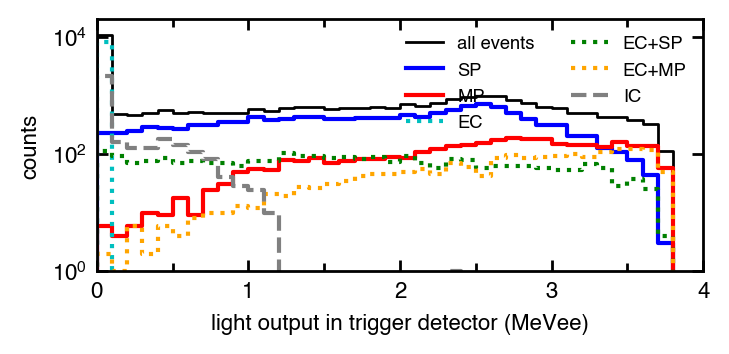

In [121]:

bin =120
axis,y_80MeV_All      =sorting(LO_data_80MeV['Tri_LO'] ,bin,0,12)
axis,y_80MeV_SP       =sorting(LO_data_80MeV_SP["Tri_LO"] ,bin,0,12)
axis,y_80MeV_MS       =sorting(LO_data_80MeV_MS["Tri_LO"] ,bin,0,12)
axis,y_80MeV_P_C_e    =sorting(LO_data_80MeV_Proton_carbon_elastic["Tri_LO"] ,bin,0,12)
axis,y_80MeV_P_C_ine  =sorting(LO_data_80MeV_Proton_carbon_inelastic["Tri_LO"] ,bin,0,12)
axis,y_80MeV_C_MS     =sorting(LO_data_80MeV_C_MS["Tri_LO"] ,bin,0,12)
#axis,y_80MeV_1P_MC    =sorting(LO_data_80MeV_1P_MC["Tri_LO"] ,bin,0,12)
axis,y_80MeV_C_only    =sorting(LO_data_80MeV_Proton_carbon_elastic_only["Tri_LO"] ,bin,0,12)


bar_axis,bar_y_80MeV_All       =bar_plot(axis,y_80MeV_All    ,0.1)
bar_axis,bar_y_80MeV_SP        =bar_plot(axis,y_80MeV_SP     ,0.1)
bar_axis,bar_y_80MeV_MS        =bar_plot(axis,y_80MeV_MS     ,0.1)
bar_axis,bar_y_80MeV_P_C_e     =bar_plot(axis,y_80MeV_P_C_e  ,0.1)
bar_axis,bar_y_80MeV_P_C_ine   =bar_plot(axis,y_80MeV_P_C_ine,0.1)
bar_axis,bar_y_80MeV_C_MS      =bar_plot(axis,y_80MeV_C_MS   ,0.1)
#bar_axis,bar_y_80MeV_1P_MC     =bar_plot(axis,y_80MeV_1P_MC  ,0.1)
bar_axis,bar_y_80MeV_C_only    =bar_plot(axis,y_80MeV_C_only ,0.1)

fig = fig_pre_def(7.7,3.2,1)# 圖片大小
ax = fig.add_subplot(1, 1, 1)          # 產生1x1格圖片、在第一格
plt.plot(bar_axis,bar_y_80MeV_All,'-k',linewidth =1,label = 'all events')
plt.plot(bar_axis,bar_y_80MeV_SP,'b',label = 'SP')# single elastic scattering proton')
plt.plot(bar_axis,bar_y_80MeV_MS,'-r',label ='MP')# multiple elastic scattering protons')
plt.plot(bar_axis,bar_y_80MeV_C_only ,':c',label ='EC')# (elastic carbon)')
plt.plot(bar_axis,bar_y_80MeV_P_C_e,':g',label ='EC+SP')# single elastic scattering proton and elastic scattering carbon')
plt.plot(bar_axis,bar_y_80MeV_C_MS ,':',color='orange',label ='EC+MP')# (multiple carbons and protons)')
plt.plot(bar_axis,bar_y_80MeV_P_C_ine,'--',color='gray',label ='IC')# inelastic carbon')


bar_all = bar_y_80MeV_SP+bar_y_80MeV_MS+bar_y_80MeV_P_C_e+bar_y_80MeV_P_C_ine+bar_y_80MeV_C_MS
#plt.plot(bar_axis,bar_all,'-',color='orange',label ='All_test')


#plt.plot(bar_axis,bar_y_80MeV_1P_MC,'--',color='gray',label ='one proton + multiple elatic carbon')
#plt.plot(bar_axis,bar_y_80MeV_C_MS-bar_y_80MeV_1P_MC,'--',color='orange',label ='multi proton + multiple carbon')
#plt.plot(axis,y_80MeV_SP+y_80MeV_MS+y_80MeV_C_SP+y_80MeV_C_MS,'--c',label ='sum')

fig_post_def(xlim=(0,4),xticks=(1,0.5)
             ,ylim=(1,100)
             ,xlabel="light output in trigger detector (MeVee)",ylabel="counts"
             #,xticks = (1,0.5),yticks = (0.2,0.1)
             ,lg_fs=6.6,n_col =2
             ) 
plt.yscale('log')
plt.ylim(1,20000)
plt.savefig('/Users/thlin/Dropbox/Research/Publication/2023 NSTOF/Figure/Python_export/Fig2_th0_E_tri.svg', format="svg")

(1, 20000)

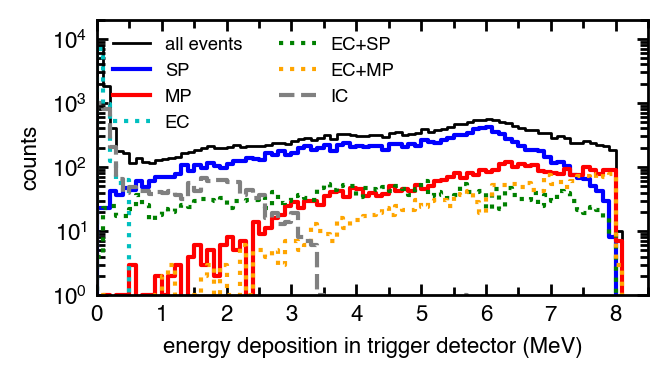

In [107]:

bin =120
axis,y_80MeV_All      =sorting(LO_data_80MeV['Recoil_p_E'] ,bin,0,12)
axis,y_80MeV_SP       =sorting(LO_data_80MeV_SP["Recoil_p_E"] ,bin,0,12)
axis,y_80MeV_MS       =sorting(LO_data_80MeV_MS["Recoil_p_E"] ,bin,0,12)
axis,y_80MeV_P_C_e    =sorting(LO_data_80MeV_Proton_carbon_elastic["Recoil_p_E"] ,bin,0,12)
axis,y_80MeV_P_C_ine  =sorting(LO_data_80MeV_Proton_carbon_inelastic["Recoil_p_E"] ,bin,0,12)
axis,y_80MeV_C_MS     =sorting(LO_data_80MeV_C_MS["Recoil_p_E"] ,bin,0,12)
#axis,y_80MeV_1P_MC    =sorting(LO_data_80MeV_1P_MC["Recoil_p_E"] ,bin,0,12)
axis,y_80MeV_C_only    =sorting(LO_data_80MeV_Proton_carbon_elastic_only["Recoil_p_E"] ,bin,0,12)


bar_axis,bar_y_80MeV_All       =bar_plot(axis,y_80MeV_All    ,0.1)
bar_axis,bar_y_80MeV_SP        =bar_plot(axis,y_80MeV_SP     ,0.1)
bar_axis,bar_y_80MeV_MS        =bar_plot(axis,y_80MeV_MS     ,0.1)
bar_axis,bar_y_80MeV_P_C_e     =bar_plot(axis,y_80MeV_P_C_e  ,0.1)
bar_axis,bar_y_80MeV_P_C_ine   =bar_plot(axis,y_80MeV_P_C_ine,0.1)
bar_axis,bar_y_80MeV_C_MS      =bar_plot(axis,y_80MeV_C_MS   ,0.1)
#bar_axis,bar_y_80MeV_1P_MC     =bar_plot(axis,y_80MeV_1P_MC  ,0.1)
bar_axis,bar_y_80MeV_C_only    =bar_plot(axis,y_80MeV_C_only ,0.1)

fig = fig_pre_def(7,3.5,1)# 圖片大小
ax = fig.add_subplot(1, 1, 1)          # 產生1x1格圖片、在第一格
plt.plot(bar_axis,bar_y_80MeV_All,'-k',linewidth =1,label = 'all events')
plt.plot(bar_axis,bar_y_80MeV_SP,'b',label = 'SP')# single elastic scattering proton')
plt.plot(bar_axis,bar_y_80MeV_MS,'-r',label ='MP')# multiple elastic scattering protons')
plt.plot(bar_axis,bar_y_80MeV_C_only ,':c',label ='EC')# (elastic carbon)')
plt.plot(bar_axis,bar_y_80MeV_P_C_e,':g',label ='EC+SP')# single elastic scattering proton and elastic scattering carbon')
plt.plot(bar_axis,bar_y_80MeV_C_MS ,':',color='orange',label ='EC+MP')# (multiple carbons and protons)')
plt.plot(bar_axis,bar_y_80MeV_P_C_ine,'--',color='gray',label ='IC')# inelastic carbon')


bar_all = bar_y_80MeV_SP+bar_y_80MeV_MS+bar_y_80MeV_P_C_e+bar_y_80MeV_P_C_ine+bar_y_80MeV_C_MS
#plt.plot(bar_axis,bar_all,'-',color='orange',label ='All_test')


#plt.plot(bar_axis,bar_y_80MeV_1P_MC,'--',color='gray',label ='one proton + multiple elatic carbon')
#plt.plot(bar_axis,bar_y_80MeV_C_MS-bar_y_80MeV_1P_MC,'--',color='orange',label ='multi proton + multiple carbon')
#plt.plot(axis,y_80MeV_SP+y_80MeV_MS+y_80MeV_C_SP+y_80MeV_C_MS,'--c',label ='sum')

fig_post_def(xlim=(0,8.5),xticks=(1,0.5)
             ,ylim=(0,1000)
             ,xlabel="energy deposition in trigger detector (MeV)",ylabel="counts"
             #,xticks = (1,0.5),yticks = (0.2,0.1)
             ,lg_fs=6.6,n_col =2
             ) 
plt.yscale('log')
plt.ylim(1,20000)

(1, 20000)

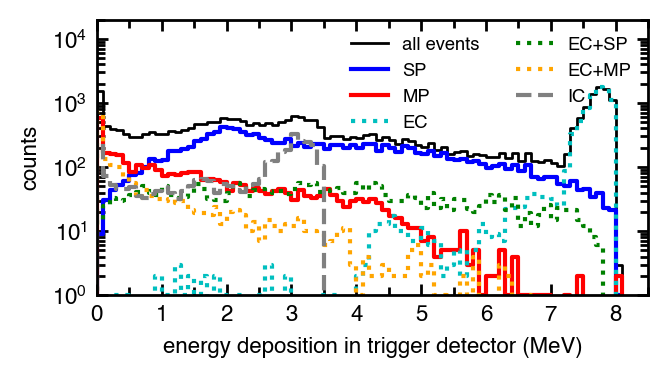

In [108]:

bin =120
axis,y_80MeV_All      =sorting(LO_data_80MeV['Rec_nE'] ,bin,0,12)
axis,y_80MeV_SP       =sorting(LO_data_80MeV_SP["Rec_nE"] ,bin,0,12)
axis,y_80MeV_MS       =sorting(LO_data_80MeV_MS["Rec_nE"] ,bin,0,12)
axis,y_80MeV_P_C_e    =sorting(LO_data_80MeV_Proton_carbon_elastic["Rec_nE"] ,bin,0,12)
axis,y_80MeV_P_C_ine  =sorting(LO_data_80MeV_Proton_carbon_inelastic["Rec_nE"] ,bin,0,12)
axis,y_80MeV_C_MS     =sorting(LO_data_80MeV_C_MS["Rec_nE"] ,bin,0,12)
#axis,y_80MeV_1P_MC    =sorting(LO_data_80MeV_1P_MC["Rec_nE"] ,bin,0,12)
axis,y_80MeV_C_only    =sorting(LO_data_80MeV_Proton_carbon_elastic_only["Rec_nE"] ,bin,0,12)


bar_axis,bar_y_80MeV_All       =bar_plot(axis,y_80MeV_All    ,0.1)
bar_axis,bar_y_80MeV_SP        =bar_plot(axis,y_80MeV_SP     ,0.1)
bar_axis,bar_y_80MeV_MS        =bar_plot(axis,y_80MeV_MS     ,0.1)
bar_axis,bar_y_80MeV_P_C_e     =bar_plot(axis,y_80MeV_P_C_e  ,0.1)
bar_axis,bar_y_80MeV_P_C_ine   =bar_plot(axis,y_80MeV_P_C_ine,0.1)
bar_axis,bar_y_80MeV_C_MS      =bar_plot(axis,y_80MeV_C_MS   ,0.1)
#bar_axis,bar_y_80MeV_1P_MC     =bar_plot(axis,y_80MeV_1P_MC  ,0.1)
bar_axis,bar_y_80MeV_C_only    =bar_plot(axis,y_80MeV_C_only ,0.1)

fig = fig_pre_def(7,3.5,1)# 圖片大小
ax = fig.add_subplot(1, 1, 1)          # 產生1x1格圖片、在第一格
plt.plot(bar_axis,bar_y_80MeV_All,'-k',linewidth =1,label = 'all events')
plt.plot(bar_axis,bar_y_80MeV_SP,'b',label = 'SP')# single elastic scattering proton')
plt.plot(bar_axis,bar_y_80MeV_MS,'-r',label ='MP')# multiple elastic scattering protons')
plt.plot(bar_axis,bar_y_80MeV_C_only ,':c',label ='EC')# (elastic carbon)')
plt.plot(bar_axis,bar_y_80MeV_P_C_e,':g',label ='EC+SP')# single elastic scattering proton and elastic scattering carbon')
plt.plot(bar_axis,bar_y_80MeV_C_MS ,':',color='orange',label ='EC+MP')# (multiple carbons and protons)')
plt.plot(bar_axis,bar_y_80MeV_P_C_ine,'--',color='gray',label ='IC')# inelastic carbon')


bar_all = bar_y_80MeV_SP+bar_y_80MeV_MS+bar_y_80MeV_P_C_e+bar_y_80MeV_P_C_ine+bar_y_80MeV_C_MS
#plt.plot(bar_axis,bar_all,'-',color='orange',label ='All_test')


#plt.plot(bar_axis,bar_y_80MeV_1P_MC,'--',color='gray',label ='one proton + multiple elatic carbon')
#plt.plot(bar_axis,bar_y_80MeV_C_MS-bar_y_80MeV_1P_MC,'--',color='orange',label ='multi proton + multiple carbon')
#plt.plot(axis,y_80MeV_SP+y_80MeV_MS+y_80MeV_C_SP+y_80MeV_C_MS,'--c',label ='sum')

fig_post_def(xlim=(0,8.5),xticks=(1,0.5)
             ,ylim=(0,1000)
             ,xlabel="energy deposition in trigger detector (MeV)",ylabel="counts"
             #,xticks = (1,0.5),yticks = (0.2,0.1)
             ,lg_fs=6.6,n_col =2
             ) 
plt.yscale('log')
plt.ylim(1,20000)

# 8MeV 0.125 MeVee 

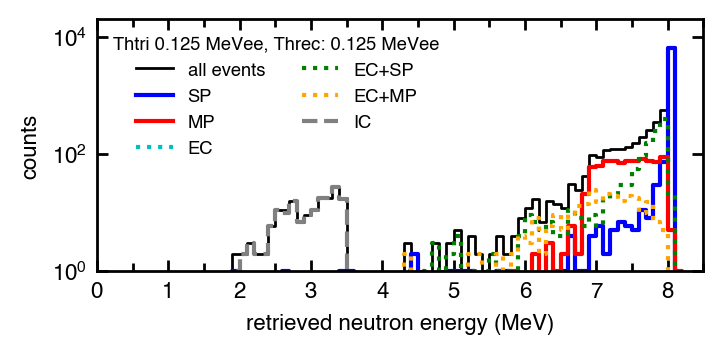

In [127]:
LOmask_Rec_E = C_data_80MeV["Tri_pE"]+C_data_80MeV["Rec_nE"]<10.01
LOmask_Rec_U = C_data_80MeV['Rec_LO']>0.125
LOmask_U = C_data_80MeV['Tri_LO']>0.125
LOmask_L = C_data_80MeV['Tri_LO']<10

LOmask_All = C_data_80MeV['Tri_p_num']>0
LOmask_SP   = C_data_80MeV['Tri_p_num']==1
LOmask_MS_L = C_data_80MeV['Tri_p_num']>1
LOmask_MS_U = C_data_80MeV['Tri_p_num']<100
LOmask_C = C_data_80MeV['Tri_p_num']==100
LOmask_C_SP = C_data_80MeV['Tri_p_num']==101
LOmask_C_MS = C_data_80MeV['Tri_p_num']>101
LOmask_C_MS_U = C_data_80MeV['Tri_p_num']<200
LOmask_C_1 = C_data_80MeV['Tri_p_num']==200
LOmask_1P_MC_1 = C_data_80MeV['Tri_p_num']==201
LOmask_1P_MC_1_L = C_data_80MeV['Tri_p_num']>201
LOmask_1P_MC_1_U = C_data_80MeV['Tri_p_num']<300
LOmask_C_2 = C_data_80MeV['Tri_p_num']==300
LOmask_1P_MC_2 = C_data_80MeV['Tri_p_num']==301
LOmask_1P_MC_2_L = C_data_80MeV['Tri_p_num']>301
LOmask_1P_MC_2_U = C_data_80MeV['Tri_p_num']<400
LOmask_C_3 = C_data_80MeV['Tri_p_num']==400
LOmask_1P_MC_3 = C_data_80MeV['Tri_p_num']==401
LOmask_1P_MC_3_L = C_data_80MeV['Tri_p_num']>401
LOmask_1P_MC_3_U = C_data_80MeV['Tri_p_num']<500
LOmask_C_4 = C_data_80MeV['Tri_p_num']==500
LOmask_1P_MC_4 = C_data_80MeV['Tri_p_num']==501
LOmask_1P_MC_4_L = C_data_80MeV['Tri_p_num']>501
LOmask_1P_MC_4_U = C_data_80MeV['Tri_p_num']<600
LOmask_C_inlastic = C_data_80MeV['inelastic']==1
LOmask_C_elastic = C_data_80MeV['inelastic']==0
LOmask_C_except_Al = C_data_80MeV['inelastic']<2

# All
LO_data_80MeV         = C_data_80MeV[(LOmask_Rec_E&LOmask_Rec_U&LOmask_U&LOmask_L&LOmask_All&LOmask_C_except_Al)]
# single recoil proton
LO_data_80MeV_SP      = C_data_80MeV[(LOmask_Rec_E&LOmask_Rec_U&LOmask_U&LOmask_L&LOmask_SP&LOmask_C_elastic)]
# multiple scattering proton
LO_data_80MeV_MS      = C_data_80MeV[(LOmask_Rec_E&LOmask_Rec_U&LOmask_U&LOmask_L&LOmask_MS_L&LOmask_MS_U&LOmask_C_elastic)]
# elastic carbon involved 
LO_data_80MeV_Proton_carbon_elastic = C_data_80MeV[(LOmask_Rec_E&LOmask_Rec_U&LOmask_U&LOmask_L&LOmask_C_elastic&(LOmask_C_SP|LOmask_1P_MC_1|LOmask_1P_MC_2|LOmask_1P_MC_3|LOmask_1P_MC_4))]

# Multiple carbon and proton
LO_data_80MeV_C_MS    = C_data_80MeV[(LOmask_Rec_E&LOmask_Rec_U&LOmask_U&LOmask_L&LOmask_C_elastic&
                                      (#LOmask_C_1|LOmask_C|LOmask_C_2|LOmask_C_3|LOmask_C_4|
                                       (LOmask_C_MS&LOmask_C_MS_U)|(LOmask_1P_MC_1_L&LOmask_1P_MC_1_U)|(LOmask_1P_MC_2_L&LOmask_1P_MC_2_U)
                                       |(LOmask_1P_MC_3_L&LOmask_1P_MC_3_U)|(LOmask_1P_MC_4_L&LOmask_1P_MC_4_U)))]
#LO_data_80MeV_1P_MC   = C_data_80MeV[(LOmask_Rec_E&LOmask_Rec_U&LOmask_U&LOmask_L&LOmask_C_elastic&(LOmask_1P_MC_1|LOmask_1P_MC_2))]
# inelastic carbon 
LO_data_80MeV_Proton_carbon_inelastic   = C_data_80MeV[(LOmask_Rec_E&LOmask_Rec_U&LOmask_U&LOmask_L&LOmask_C_inlastic)]
# only elastic carbon involved 
LO_data_80MeV_Proton_carbon_elastic_only = C_data_80MeV[(LOmask_Rec_E&LOmask_Rec_U&LOmask_U&LOmask_L&LOmask_C_elastic&(LOmask_C|LOmask_C_1|LOmask_C_2|LOmask_C_3|LOmask_C_4))]

bin =120
axis,y_80MeV_All      =sorting(LO_data_80MeV["Total_E"] ,bin,0,12)
axis,y_80MeV_SP       =sorting(LO_data_80MeV_SP["Total_E"] ,bin,0,12)
axis,y_80MeV_MS       =sorting(LO_data_80MeV_MS["Total_E"] ,bin,0,12)
axis,y_80MeV_P_C_e    =sorting(LO_data_80MeV_Proton_carbon_elastic["Total_E"] ,bin,0,12)
axis,y_80MeV_P_C_ine  =sorting(LO_data_80MeV_Proton_carbon_inelastic["Total_E"] ,bin,0,12)
axis,y_80MeV_C_MS     =sorting(LO_data_80MeV_C_MS["Total_E"] ,bin,0,12)
#axis,y_80MeV_1P_MC    =sorting(LO_data_80MeV_1P_MC["Total_E"] ,bin,0,12)
axis,y_80MeV_C_only    =sorting(LO_data_80MeV_Proton_carbon_elastic_only["Total_E"] ,bin,0,12)


bar_axis,bar_y_80MeV_All      =bar_plot(axis,y_80MeV_All    ,0.1)
bar_axis,bar_y_80MeV_SP       =bar_plot(axis,y_80MeV_SP     ,0.1)
bar_axis,bar_y_80MeV_MS       =bar_plot(axis,y_80MeV_MS     ,0.1)
bar_axis,bar_y_80MeV_P_C_e    =bar_plot(axis,y_80MeV_P_C_e  ,0.1)
bar_axis,bar_y_80MeV_P_C_ine  =bar_plot(axis,y_80MeV_P_C_ine,0.1)
bar_axis,bar_y_80MeV_C_MS     =bar_plot(axis,y_80MeV_C_MS   ,0.1)
#bar_axis,bar_y_80MeV_1P_MC    =bar_plot(axis,y_80MeV_1P_MC  ,0.1)
bar_axis,bar_y_80MeV_C_only    =bar_plot(axis,y_80MeV_C_only  ,0.1)

fig = fig_pre_def(7.7,3.2,1)# 圖片大小
ax = fig.add_subplot(1, 1, 1)          # 產生1x1格圖片、在第一格
plt.plot(bar_axis,bar_y_80MeV_All,'-k',linewidth =1,label = 'all events')
plt.plot(bar_axis,bar_y_80MeV_SP,'b',label = 'SP')# single elastic scattering proton')
plt.plot(bar_axis,bar_y_80MeV_MS,'-r',label ='MP')# multiple elastic scattering protons')
plt.plot(bar_axis,bar_y_80MeV_C_only ,':c',label ='EC')# (elastic carbon)')
plt.plot(bar_axis,bar_y_80MeV_P_C_e,':g',label ='EC+SP')# single elastic scattering proton and elastic scattering carbon')
plt.plot(bar_axis,bar_y_80MeV_C_MS ,':',color='orange',label ='EC+MP')# (multiple carbons and protons)')
plt.plot(bar_axis,bar_y_80MeV_P_C_ine,'--',color='gray',label ='IC')# inelastic carbon')



bar_all = bar_y_80MeV_SP+bar_y_80MeV_MS+bar_y_80MeV_P_C_e+bar_y_80MeV_P_C_ine+bar_y_80MeV_C_MS+bar_y_80MeV_C_only
#plt.plot(bar_axis,bar_all,'-',color='orange',label ='All_test')


#plt.plot(bar_axis,bar_y_80MeV_1P_MC,'--',color='gray',label ='one proton + multiple elatic carbon')
#plt.plot(bar_axis,bar_y_80MeV_C_MS-bar_y_80MeV_1P_MC,'--',color='orange',label ='multi proton + multiple carbon')
#plt.plot(axis,y_80MeV_SP+y_80MeV_MS+y_80MeV_C_SP+y_80MeV_C_MS,'--c',label ='sum')

fig_post_def(xlim=(0,8.5),xticks=(1,0.5)
             ,ylim=(1,20000)
             ,xlabel="retrieved neutron energy (MeV)",ylabel="counts"
             #,xticks = (1,0.5),yticks = (0.2,0.1)
             ,lg_fs=6.6,n_col =2
             ,title = 'Thtri 0.125 MeVee, Threc: 0.125 MeVee'
             ) 
plt.yscale('log')

plt.savefig('/Users/thlin/Dropbox/Research/Publication/2023 NSTOF/Figure/Python_export/Fig3_th0125_E_ret.svg', format="svg")

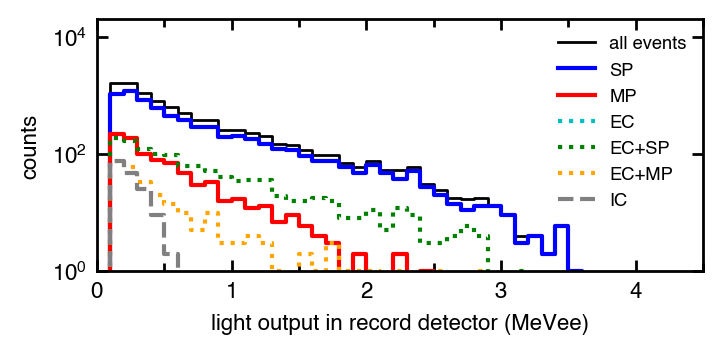

In [128]:

bin =120
axis,y_80MeV_All      =sorting(LO_data_80MeV['Rec_LO'] ,bin,0,12)
axis,y_80MeV_SP       =sorting(LO_data_80MeV_SP["Rec_LO"] ,bin,0,12)
axis,y_80MeV_MS       =sorting(LO_data_80MeV_MS["Rec_LO"] ,bin,0,12)
axis,y_80MeV_P_C_e    =sorting(LO_data_80MeV_Proton_carbon_elastic["Rec_LO"] ,bin,0,12)
axis,y_80MeV_P_C_ine  =sorting(LO_data_80MeV_Proton_carbon_inelastic["Rec_LO"] ,bin,0,12)
axis,y_80MeV_C_MS     =sorting(LO_data_80MeV_C_MS["Rec_LO"] ,bin,0,12)
#axis,y_80MeV_1P_MC    =sorting(LO_data_80MeV_1P_MC["Rec_LO"] ,bin,0,12)
axis,y_80MeV_C_only    =sorting(LO_data_80MeV_Proton_carbon_elastic_only["Rec_LO"] ,bin,0,12)

bar_axis,bar_y_80MeV_All      =bar_plot(axis,y_80MeV_All    ,0.1)
bar_axis,bar_y_80MeV_SP       =bar_plot(axis,y_80MeV_SP     ,0.1)
bar_axis,bar_y_80MeV_MS       =bar_plot(axis,y_80MeV_MS     ,0.1)
bar_axis,bar_y_80MeV_P_C_e    =bar_plot(axis,y_80MeV_P_C_e  ,0.1)
bar_axis,bar_y_80MeV_P_C_ine  =bar_plot(axis,y_80MeV_P_C_ine,0.1)
bar_axis,bar_y_80MeV_C_MS     =bar_plot(axis,y_80MeV_C_MS   ,0.1)
#bar_axis,bar_y_80MeV_1P_MC    =bar_plot(axis,y_80MeV_1P_MC  ,0.1)
bar_axis,bar_y_80MeV_C_only    =bar_plot(axis,y_80MeV_C_only  ,0.1)

fig = fig_pre_def(7.7,3.2,1)# 圖片大小
ax = fig.add_subplot(1, 1, 1)          # 產生1x1格圖片、在第一格
plt.plot(bar_axis,bar_y_80MeV_All,'-k',linewidth =1,label = 'all events')
plt.plot(bar_axis,bar_y_80MeV_SP,'b',label = 'SP')# single elastic scattering proton')
plt.plot(bar_axis,bar_y_80MeV_MS,'-r',label ='MP')# multiple elastic scattering protons')
plt.plot(bar_axis,bar_y_80MeV_C_only ,':c',label ='EC')# (elastic carbon)')
plt.plot(bar_axis,bar_y_80MeV_P_C_e,':g',label ='EC+SP')# single elastic scattering proton and elastic scattering carbon')
plt.plot(bar_axis,bar_y_80MeV_C_MS ,':',color='orange',label ='EC+MP')# (multiple carbons and protons)')
plt.plot(bar_axis,bar_y_80MeV_P_C_ine,'--',color='gray',label ='IC')# inelastic carbon')


bar_all = bar_y_80MeV_SP+bar_y_80MeV_MS+bar_y_80MeV_P_C_e+bar_y_80MeV_P_C_ine+bar_y_80MeV_C_MS
#plt.plot(bar_axis,bar_all,'-',color='orange',label ='All_test')


#plt.plot(bar_axis,bar_y_80MeV_1P_MC,'--',color='gray',label ='one proton + multiple elatic carbon')
#plt.plot(bar_axis,bar_y_80MeV_C_MS-bar_y_80MeV_1P_MC,'--',color='orange',label ='multi proton + multiple carbon')
#plt.plot(axis,y_80MeV_SP+y_80MeV_MS+y_80MeV_C_SP+y_80MeV_C_MS,'--c',label ='sum')

fig_post_def(xlim=(0,4.5),xticks=(1,0.5)
             ,ylim=(1,100)
             ,xlabel="light output in record detector (MeVee)",ylabel="counts"
             #,xticks = (1,0.5),yticks = (0.2,0.1)
             ,lg_fs=6.6,n_col =1
             ) 
plt.yscale('log')
plt.ylim(1,20000)
plt.savefig('/Users/thlin/Dropbox/Research/Publication/2023 NSTOF/Figure/Python_export/Fig3_th0125_LO_rec.svg', format="svg")

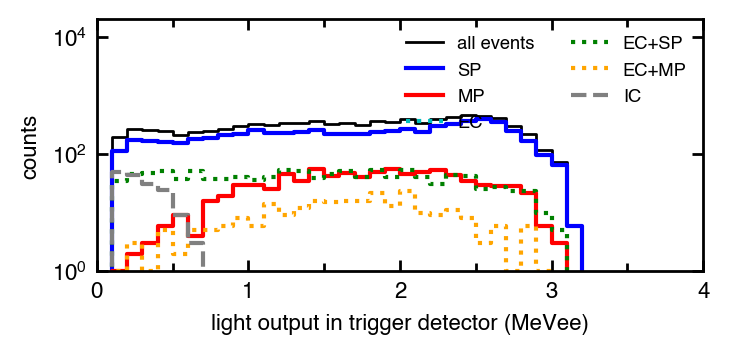

In [129]:

bin =120
axis,y_80MeV_All      =sorting(LO_data_80MeV['Tri_LO'] ,bin,0,12)
axis,y_80MeV_SP       =sorting(LO_data_80MeV_SP["Tri_LO"] ,bin,0,12)
axis,y_80MeV_MS       =sorting(LO_data_80MeV_MS["Tri_LO"] ,bin,0,12)
axis,y_80MeV_P_C_e    =sorting(LO_data_80MeV_Proton_carbon_elastic["Tri_LO"] ,bin,0,12)
axis,y_80MeV_P_C_ine  =sorting(LO_data_80MeV_Proton_carbon_inelastic["Tri_LO"] ,bin,0,12)
axis,y_80MeV_C_MS     =sorting(LO_data_80MeV_C_MS["Tri_LO"] ,bin,0,12)
#axis,y_80MeV_1P_MC    =sorting(LO_data_80MeV_1P_MC["Tri_LO"] ,bin,0,12)
axis,y_80MeV_C_only    =sorting(LO_data_80MeV_Proton_carbon_elastic_only["Tri_LO"] ,bin,0,12)


bar_axis,bar_y_80MeV_All       =bar_plot(axis,y_80MeV_All    ,0.1)
bar_axis,bar_y_80MeV_SP        =bar_plot(axis,y_80MeV_SP     ,0.1)
bar_axis,bar_y_80MeV_MS        =bar_plot(axis,y_80MeV_MS     ,0.1)
bar_axis,bar_y_80MeV_P_C_e     =bar_plot(axis,y_80MeV_P_C_e  ,0.1)
bar_axis,bar_y_80MeV_P_C_ine   =bar_plot(axis,y_80MeV_P_C_ine,0.1)
bar_axis,bar_y_80MeV_C_MS      =bar_plot(axis,y_80MeV_C_MS   ,0.1)
#bar_axis,bar_y_80MeV_1P_MC     =bar_plot(axis,y_80MeV_1P_MC  ,0.1)
bar_axis,bar_y_80MeV_C_only    =bar_plot(axis,y_80MeV_C_only ,0.1)

fig = fig_pre_def(7.7,3.2,1)# 圖片大小
ax = fig.add_subplot(1, 1, 1)          # 產生1x1格圖片、在第一格
plt.plot(bar_axis,bar_y_80MeV_All,'-k',linewidth =1,label = 'all events')
plt.plot(bar_axis,bar_y_80MeV_SP,'b',label = 'SP')# single elastic scattering proton')
plt.plot(bar_axis,bar_y_80MeV_MS,'-r',label ='MP')# multiple elastic scattering protons')
plt.plot(bar_axis,bar_y_80MeV_C_only ,':c',label ='EC')# (elastic carbon)')
plt.plot(bar_axis,bar_y_80MeV_P_C_e,':g',label ='EC+SP')# single elastic scattering proton and elastic scattering carbon')
plt.plot(bar_axis,bar_y_80MeV_C_MS ,':',color='orange',label ='EC+MP')# (multiple carbons and protons)')
plt.plot(bar_axis,bar_y_80MeV_P_C_ine,'--',color='gray',label ='IC')# inelastic carbon')


bar_all = bar_y_80MeV_SP+bar_y_80MeV_MS+bar_y_80MeV_P_C_e+bar_y_80MeV_P_C_ine+bar_y_80MeV_C_MS
#plt.plot(bar_axis,bar_all,'-',color='orange',label ='All_test')


#plt.plot(bar_axis,bar_y_80MeV_1P_MC,'--',color='gray',label ='one proton + multiple elatic carbon')
#plt.plot(bar_axis,bar_y_80MeV_C_MS-bar_y_80MeV_1P_MC,'--',color='orange',label ='multi proton + multiple carbon')
#plt.plot(axis,y_80MeV_SP+y_80MeV_MS+y_80MeV_C_SP+y_80MeV_C_MS,'--c',label ='sum')

fig_post_def(xlim=(0,4),xticks=(1,0.5)
             ,ylim=(1,100)
             ,xlabel="light output in trigger detector (MeVee)",ylabel="counts"
             #,xticks = (1,0.5),yticks = (0.2,0.1)
             ,lg_fs=6.6,n_col =2
             ) 
plt.yscale('log')
plt.ylim(1,20000)
plt.savefig('/Users/thlin/Dropbox/Research/Publication/2023 NSTOF/Figure/Python_export/Fig3_th0125_LO_tri.svg', format="svg")

# 8MeV 0.5 MeVee 0.125MeVee 

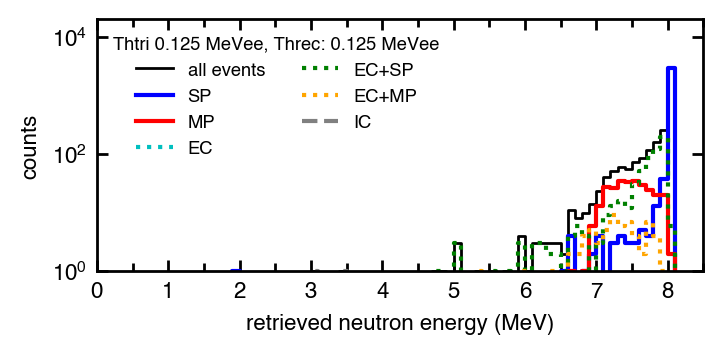

In [130]:
LOmask_Rec_E = C_data_80MeV["Tri_pE"]+C_data_80MeV["Rec_nE"]<10.01
LOmask_Rec_U = C_data_80MeV['Rec_LO']>0.5
LOmask_U = C_data_80MeV['Tri_LO']>0.125
LOmask_L = C_data_80MeV['Tri_LO']<10

LOmask_All = C_data_80MeV['Tri_p_num']>0
LOmask_SP   = C_data_80MeV['Tri_p_num']==1
LOmask_MS_L = C_data_80MeV['Tri_p_num']>1
LOmask_MS_U = C_data_80MeV['Tri_p_num']<100
LOmask_C = C_data_80MeV['Tri_p_num']==100
LOmask_C_SP = C_data_80MeV['Tri_p_num']==101
LOmask_C_MS = C_data_80MeV['Tri_p_num']>101
LOmask_C_MS_U = C_data_80MeV['Tri_p_num']<200
LOmask_C_1 = C_data_80MeV['Tri_p_num']==200
LOmask_1P_MC_1 = C_data_80MeV['Tri_p_num']==201
LOmask_1P_MC_1_L = C_data_80MeV['Tri_p_num']>201
LOmask_1P_MC_1_U = C_data_80MeV['Tri_p_num']<300
LOmask_C_2 = C_data_80MeV['Tri_p_num']==300
LOmask_1P_MC_2 = C_data_80MeV['Tri_p_num']==301
LOmask_1P_MC_2_L = C_data_80MeV['Tri_p_num']>301
LOmask_1P_MC_2_U = C_data_80MeV['Tri_p_num']<400
LOmask_C_3 = C_data_80MeV['Tri_p_num']==400
LOmask_1P_MC_3 = C_data_80MeV['Tri_p_num']==401
LOmask_1P_MC_3_L = C_data_80MeV['Tri_p_num']>401
LOmask_1P_MC_3_U = C_data_80MeV['Tri_p_num']<500
LOmask_C_4 = C_data_80MeV['Tri_p_num']==500
LOmask_1P_MC_4 = C_data_80MeV['Tri_p_num']==501
LOmask_1P_MC_4_L = C_data_80MeV['Tri_p_num']>501
LOmask_1P_MC_4_U = C_data_80MeV['Tri_p_num']<600
LOmask_C_inlastic = C_data_80MeV['inelastic']==1
LOmask_C_elastic = C_data_80MeV['inelastic']==0
LOmask_C_except_Al = C_data_80MeV['inelastic']<2

# All
LO_data_80MeV         = C_data_80MeV[(LOmask_Rec_E&LOmask_Rec_U&LOmask_U&LOmask_L&LOmask_All&LOmask_C_except_Al)]
# single recoil proton
LO_data_80MeV_SP      = C_data_80MeV[(LOmask_Rec_E&LOmask_Rec_U&LOmask_U&LOmask_L&LOmask_SP&LOmask_C_elastic)]
# multiple scattering proton
LO_data_80MeV_MS      = C_data_80MeV[(LOmask_Rec_E&LOmask_Rec_U&LOmask_U&LOmask_L&LOmask_MS_L&LOmask_MS_U&LOmask_C_elastic)]
# elastic carbon involved 
LO_data_80MeV_Proton_carbon_elastic = C_data_80MeV[(LOmask_Rec_E&LOmask_Rec_U&LOmask_U&LOmask_L&LOmask_C_elastic&(LOmask_C_SP|LOmask_1P_MC_1|LOmask_1P_MC_2|LOmask_1P_MC_3|LOmask_1P_MC_4))]

# Multiple carbon and proton
LO_data_80MeV_C_MS    = C_data_80MeV[(LOmask_Rec_E&LOmask_Rec_U&LOmask_U&LOmask_L&LOmask_C_elastic&
                                      (#LOmask_C_1|LOmask_C|LOmask_C_2|LOmask_C_3|LOmask_C_4|
                                       (LOmask_C_MS&LOmask_C_MS_U)|(LOmask_1P_MC_1_L&LOmask_1P_MC_1_U)|(LOmask_1P_MC_2_L&LOmask_1P_MC_2_U)
                                       |(LOmask_1P_MC_3_L&LOmask_1P_MC_3_U)|(LOmask_1P_MC_4_L&LOmask_1P_MC_4_U)))]
#LO_data_80MeV_1P_MC   = C_data_80MeV[(LOmask_Rec_E&LOmask_Rec_U&LOmask_U&LOmask_L&LOmask_C_elastic&(LOmask_1P_MC_1|LOmask_1P_MC_2))]
# inelastic carbon 
LO_data_80MeV_Proton_carbon_inelastic   = C_data_80MeV[(LOmask_Rec_E&LOmask_Rec_U&LOmask_U&LOmask_L&LOmask_C_inlastic)]
# only elastic carbon involved 
LO_data_80MeV_Proton_carbon_elastic_only = C_data_80MeV[(LOmask_Rec_E&LOmask_Rec_U&LOmask_U&LOmask_L&LOmask_C_elastic&(LOmask_C|LOmask_C_1|LOmask_C_2|LOmask_C_3|LOmask_C_4))]

bin =120
axis,y_80MeV_All      =sorting(LO_data_80MeV["Total_E"] ,bin,0,12)
axis,y_80MeV_SP       =sorting(LO_data_80MeV_SP["Total_E"] ,bin,0,12)
axis,y_80MeV_MS       =sorting(LO_data_80MeV_MS["Total_E"] ,bin,0,12)
axis,y_80MeV_P_C_e    =sorting(LO_data_80MeV_Proton_carbon_elastic["Total_E"] ,bin,0,12)
axis,y_80MeV_P_C_ine  =sorting(LO_data_80MeV_Proton_carbon_inelastic["Total_E"] ,bin,0,12)
axis,y_80MeV_C_MS     =sorting(LO_data_80MeV_C_MS["Total_E"] ,bin,0,12)
#axis,y_80MeV_1P_MC    =sorting(LO_data_80MeV_1P_MC["Total_E"] ,bin,0,12)
axis,y_80MeV_C_only    =sorting(LO_data_80MeV_Proton_carbon_elastic_only["Total_E"] ,bin,0,12)


bar_axis,bar_y_80MeV_All      =bar_plot(axis,y_80MeV_All    ,0.1)
bar_axis,bar_y_80MeV_SP       =bar_plot(axis,y_80MeV_SP     ,0.1)
bar_axis,bar_y_80MeV_MS       =bar_plot(axis,y_80MeV_MS     ,0.1)
bar_axis,bar_y_80MeV_P_C_e    =bar_plot(axis,y_80MeV_P_C_e  ,0.1)
bar_axis,bar_y_80MeV_P_C_ine  =bar_plot(axis,y_80MeV_P_C_ine,0.1)
bar_axis,bar_y_80MeV_C_MS     =bar_plot(axis,y_80MeV_C_MS   ,0.1)
#bar_axis,bar_y_80MeV_1P_MC    =bar_plot(axis,y_80MeV_1P_MC  ,0.1)
bar_axis,bar_y_80MeV_C_only    =bar_plot(axis,y_80MeV_C_only  ,0.1)

fig = fig_pre_def(7.7,3.2,1)# 圖片大小
ax = fig.add_subplot(1, 1, 1)          # 產生1x1格圖片、在第一格
plt.plot(bar_axis,bar_y_80MeV_All,'-k',linewidth =1,label = 'all events')
plt.plot(bar_axis,bar_y_80MeV_SP,'b',label = 'SP')# single elastic scattering proton')
plt.plot(bar_axis,bar_y_80MeV_MS,'-r',label ='MP')# multiple elastic scattering protons')
plt.plot(bar_axis,bar_y_80MeV_C_only ,':c',label ='EC')# (elastic carbon)')
plt.plot(bar_axis,bar_y_80MeV_P_C_e,':g',label ='EC+SP')# single elastic scattering proton and elastic scattering carbon')
plt.plot(bar_axis,bar_y_80MeV_C_MS ,':',color='orange',label ='EC+MP')# (multiple carbons and protons)')
plt.plot(bar_axis,bar_y_80MeV_P_C_ine,'--',color='gray',label ='IC')# inelastic carbon')



bar_all = bar_y_80MeV_SP+bar_y_80MeV_MS+bar_y_80MeV_P_C_e+bar_y_80MeV_P_C_ine+bar_y_80MeV_C_MS+bar_y_80MeV_C_only
#plt.plot(bar_axis,bar_all,'-',color='orange',label ='All_test')


#plt.plot(bar_axis,bar_y_80MeV_1P_MC,'--',color='gray',label ='one proton + multiple elatic carbon')
#plt.plot(bar_axis,bar_y_80MeV_C_MS-bar_y_80MeV_1P_MC,'--',color='orange',label ='multi proton + multiple carbon')
#plt.plot(axis,y_80MeV_SP+y_80MeV_MS+y_80MeV_C_SP+y_80MeV_C_MS,'--c',label ='sum')

fig_post_def(xlim=(0,8.5),xticks=(1,0.5)
             ,ylim=(1,20000)
             ,xlabel="retrieved neutron energy (MeV)",ylabel="counts"
             #,xticks = (1,0.5),yticks = (0.2,0.1)
             ,lg_fs=6.6,n_col =2
             ,title = 'Thtri 0.125 MeVee, Threc: 0.5 MeVee'
             ) 
plt.yscale('log')

plt.savefig('/Users/thlin/Dropbox/Research/Publication/2023 NSTOF/Figure/Python_export/Fig4_th0125_05_E_ret.svg', format="svg")

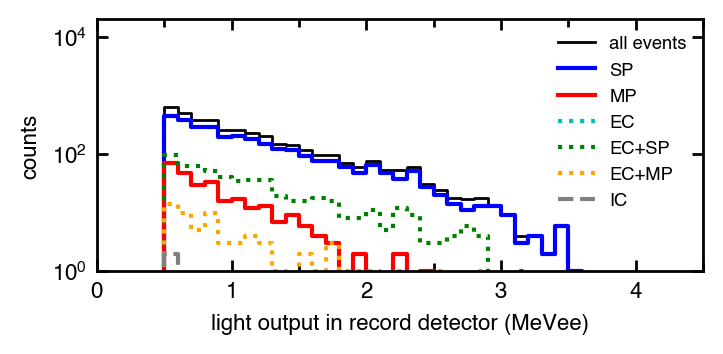

In [131]:

bin =120
axis,y_80MeV_All      =sorting(LO_data_80MeV['Rec_LO'] ,bin,0,12)
axis,y_80MeV_SP       =sorting(LO_data_80MeV_SP["Rec_LO"] ,bin,0,12)
axis,y_80MeV_MS       =sorting(LO_data_80MeV_MS["Rec_LO"] ,bin,0,12)
axis,y_80MeV_P_C_e    =sorting(LO_data_80MeV_Proton_carbon_elastic["Rec_LO"] ,bin,0,12)
axis,y_80MeV_P_C_ine  =sorting(LO_data_80MeV_Proton_carbon_inelastic["Rec_LO"] ,bin,0,12)
axis,y_80MeV_C_MS     =sorting(LO_data_80MeV_C_MS["Rec_LO"] ,bin,0,12)
#axis,y_80MeV_1P_MC    =sorting(LO_data_80MeV_1P_MC["Rec_LO"] ,bin,0,12)
axis,y_80MeV_C_only    =sorting(LO_data_80MeV_Proton_carbon_elastic_only["Rec_LO"] ,bin,0,12)

bar_axis,bar_y_80MeV_All      =bar_plot(axis,y_80MeV_All    ,0.1)
bar_axis,bar_y_80MeV_SP       =bar_plot(axis,y_80MeV_SP     ,0.1)
bar_axis,bar_y_80MeV_MS       =bar_plot(axis,y_80MeV_MS     ,0.1)
bar_axis,bar_y_80MeV_P_C_e    =bar_plot(axis,y_80MeV_P_C_e  ,0.1)
bar_axis,bar_y_80MeV_P_C_ine  =bar_plot(axis,y_80MeV_P_C_ine,0.1)
bar_axis,bar_y_80MeV_C_MS     =bar_plot(axis,y_80MeV_C_MS   ,0.1)
#bar_axis,bar_y_80MeV_1P_MC    =bar_plot(axis,y_80MeV_1P_MC  ,0.1)
bar_axis,bar_y_80MeV_C_only    =bar_plot(axis,y_80MeV_C_only  ,0.1)

fig = fig_pre_def(7.7,3.2,1)# 圖片大小
ax = fig.add_subplot(1, 1, 1)          # 產生1x1格圖片、在第一格
plt.plot(bar_axis,bar_y_80MeV_All,'-k',linewidth =1,label = 'all events')
plt.plot(bar_axis,bar_y_80MeV_SP,'b',label = 'SP')# single elastic scattering proton')
plt.plot(bar_axis,bar_y_80MeV_MS,'-r',label ='MP')# multiple elastic scattering protons')
plt.plot(bar_axis,bar_y_80MeV_C_only ,':c',label ='EC')# (elastic carbon)')
plt.plot(bar_axis,bar_y_80MeV_P_C_e,':g',label ='EC+SP')# single elastic scattering proton and elastic scattering carbon')
plt.plot(bar_axis,bar_y_80MeV_C_MS ,':',color='orange',label ='EC+MP')# (multiple carbons and protons)')
plt.plot(bar_axis,bar_y_80MeV_P_C_ine,'--',color='gray',label ='IC')# inelastic carbon')


bar_all = bar_y_80MeV_SP+bar_y_80MeV_MS+bar_y_80MeV_P_C_e+bar_y_80MeV_P_C_ine+bar_y_80MeV_C_MS
#plt.plot(bar_axis,bar_all,'-',color='orange',label ='All_test')


#plt.plot(bar_axis,bar_y_80MeV_1P_MC,'--',color='gray',label ='one proton + multiple elatic carbon')
#plt.plot(bar_axis,bar_y_80MeV_C_MS-bar_y_80MeV_1P_MC,'--',color='orange',label ='multi proton + multiple carbon')
#plt.plot(axis,y_80MeV_SP+y_80MeV_MS+y_80MeV_C_SP+y_80MeV_C_MS,'--c',label ='sum')

fig_post_def(xlim=(0,4.5),xticks=(1,0.5)
             ,ylim=(1,100)
             ,xlabel="light output in record detector (MeVee)",ylabel="counts"
             #,xticks = (1,0.5),yticks = (0.2,0.1)
             ,lg_fs=6.6,n_col =1
             ) 
plt.yscale('log')
plt.ylim(1,20000)
plt.savefig('/Users/thlin/Dropbox/Research/Publication/2023 NSTOF/Figure/Python_export/Fig4_th0125_05_LO_rec.svg', format="svg")

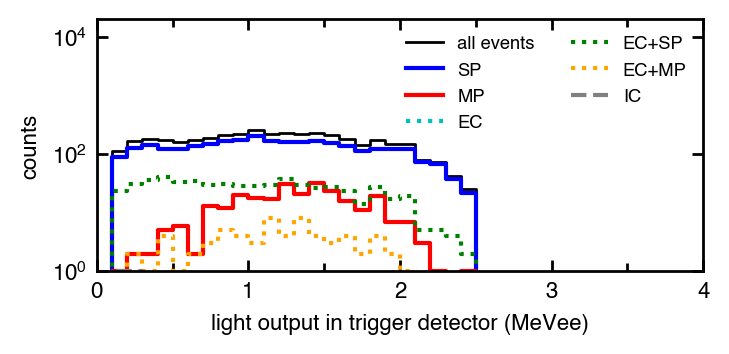

In [132]:

bin =120
axis,y_80MeV_All      =sorting(LO_data_80MeV['Tri_LO'] ,bin,0,12)
axis,y_80MeV_SP       =sorting(LO_data_80MeV_SP["Tri_LO"] ,bin,0,12)
axis,y_80MeV_MS       =sorting(LO_data_80MeV_MS["Tri_LO"] ,bin,0,12)
axis,y_80MeV_P_C_e    =sorting(LO_data_80MeV_Proton_carbon_elastic["Tri_LO"] ,bin,0,12)
axis,y_80MeV_P_C_ine  =sorting(LO_data_80MeV_Proton_carbon_inelastic["Tri_LO"] ,bin,0,12)
axis,y_80MeV_C_MS     =sorting(LO_data_80MeV_C_MS["Tri_LO"] ,bin,0,12)
#axis,y_80MeV_1P_MC    =sorting(LO_data_80MeV_1P_MC["Tri_LO"] ,bin,0,12)
axis,y_80MeV_C_only    =sorting(LO_data_80MeV_Proton_carbon_elastic_only["Tri_LO"] ,bin,0,12)


bar_axis,bar_y_80MeV_All       =bar_plot(axis,y_80MeV_All    ,0.1)
bar_axis,bar_y_80MeV_SP        =bar_plot(axis,y_80MeV_SP     ,0.1)
bar_axis,bar_y_80MeV_MS        =bar_plot(axis,y_80MeV_MS     ,0.1)
bar_axis,bar_y_80MeV_P_C_e     =bar_plot(axis,y_80MeV_P_C_e  ,0.1)
bar_axis,bar_y_80MeV_P_C_ine   =bar_plot(axis,y_80MeV_P_C_ine,0.1)
bar_axis,bar_y_80MeV_C_MS      =bar_plot(axis,y_80MeV_C_MS   ,0.1)
#bar_axis,bar_y_80MeV_1P_MC     =bar_plot(axis,y_80MeV_1P_MC  ,0.1)
bar_axis,bar_y_80MeV_C_only    =bar_plot(axis,y_80MeV_C_only ,0.1)

fig = fig_pre_def(7.7,3.2,1)# 圖片大小
ax = fig.add_subplot(1, 1, 1)          # 產生1x1格圖片、在第一格
plt.plot(bar_axis,bar_y_80MeV_All,'-k',linewidth =1,label = 'all events')
plt.plot(bar_axis,bar_y_80MeV_SP,'b',label = 'SP')# single elastic scattering proton')
plt.plot(bar_axis,bar_y_80MeV_MS,'-r',label ='MP')# multiple elastic scattering protons')
plt.plot(bar_axis,bar_y_80MeV_C_only ,':c',label ='EC')# (elastic carbon)')
plt.plot(bar_axis,bar_y_80MeV_P_C_e,':g',label ='EC+SP')# single elastic scattering proton and elastic scattering carbon')
plt.plot(bar_axis,bar_y_80MeV_C_MS ,':',color='orange',label ='EC+MP')# (multiple carbons and protons)')
plt.plot(bar_axis,bar_y_80MeV_P_C_ine,'--',color='gray',label ='IC')# inelastic carbon')


bar_all = bar_y_80MeV_SP+bar_y_80MeV_MS+bar_y_80MeV_P_C_e+bar_y_80MeV_P_C_ine+bar_y_80MeV_C_MS
#plt.plot(bar_axis,bar_all,'-',color='orange',label ='All_test')


#plt.plot(bar_axis,bar_y_80MeV_1P_MC,'--',color='gray',label ='one proton + multiple elatic carbon')
#plt.plot(bar_axis,bar_y_80MeV_C_MS-bar_y_80MeV_1P_MC,'--',color='orange',label ='multi proton + multiple carbon')
#plt.plot(axis,y_80MeV_SP+y_80MeV_MS+y_80MeV_C_SP+y_80MeV_C_MS,'--c',label ='sum')

fig_post_def(xlim=(0,4),xticks=(1,0.5)
             ,ylim=(1,100)
             ,xlabel="light output in trigger detector (MeVee)",ylabel="counts"
             #,xticks = (1,0.5),yticks = (0.2,0.1)
             ,lg_fs=6.6,n_col =2
             ) 
plt.yscale('log')
plt.ylim(1,20000)
plt.savefig('/Users/thlin/Dropbox/Research/Publication/2023 NSTOF/Figure/Python_export/Fig4_th0125_05_LO_tri.svg', format="svg")

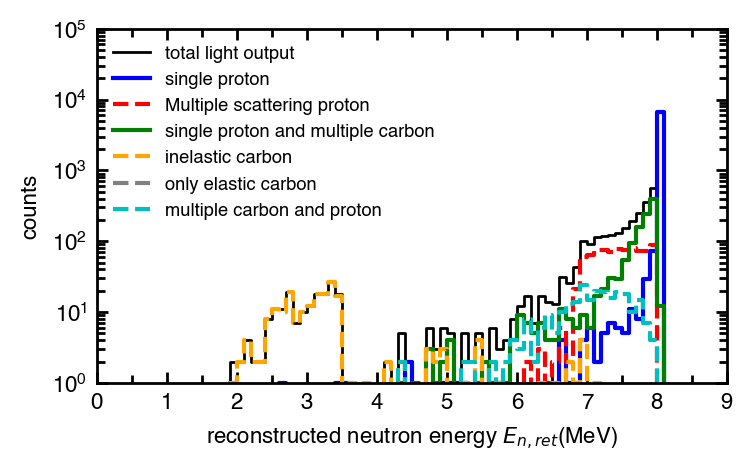

In [43]:
LOmask_Rec_E = C_data_80MeV["Tri_pE"]+C_data_80MeV["Rec_nE"]<8.01
LOmask_Rec_U = C_data_80MeV['Rec_LO']>0.125
LOmask_U = C_data_80MeV['Tri_LO']>0.125
LOmask_L = C_data_80MeV['Tri_LO']<10

LOmask_All = C_data_80MeV['Tri_p_num']>0
LOmask_SP   = C_data_80MeV['Tri_p_num']==1
LOmask_MS_L = C_data_80MeV['Tri_p_num']>1
LOmask_MS_U = C_data_80MeV['Tri_p_num']<100
LOmask_C = C_data_80MeV['Tri_p_num']==100
LOmask_C_SP = C_data_80MeV['Tri_p_num']==101
LOmask_C_MS = C_data_80MeV['Tri_p_num']>101
LOmask_C_MS_U = C_data_80MeV['Tri_p_num']<200
LOmask_C_1 = C_data_80MeV['Tri_p_num']==200
LOmask_1P_MC_1 = C_data_80MeV['Tri_p_num']==201
LOmask_1P_MC_1_L = C_data_80MeV['Tri_p_num']>201
LOmask_1P_MC_1_U = C_data_80MeV['Tri_p_num']<300
LOmask_C_2 = C_data_80MeV['Tri_p_num']==300
LOmask_1P_MC_2 = C_data_80MeV['Tri_p_num']==301
LOmask_1P_MC_2_L = C_data_80MeV['Tri_p_num']>301
LOmask_1P_MC_2_U = C_data_80MeV['Tri_p_num']<400
LOmask_C_3 = C_data_80MeV['Tri_p_num']==400
LOmask_1P_MC_3 = C_data_80MeV['Tri_p_num']==401
LOmask_1P_MC_3_L = C_data_80MeV['Tri_p_num']>401
LOmask_1P_MC_3_U = C_data_80MeV['Tri_p_num']<500
LOmask_C_4 = C_data_80MeV['Tri_p_num']==500
LOmask_1P_MC_4 = C_data_80MeV['Tri_p_num']==501
LOmask_1P_MC_4_L = C_data_80MeV['Tri_p_num']>501
LOmask_1P_MC_4_U = C_data_80MeV['Tri_p_num']<600
LOmask_C_inlastic = C_data_80MeV['inelastic']>=1
LOmask_C_elastic = C_data_80MeV['inelastic']==0

LO_data_80MeV         = C_data_80MeV[(LOmask_Rec_E&LOmask_Rec_U&LOmask_U&LOmask_L&LOmask_All)]
LO_data_80MeV_SP      = C_data_80MeV[(LOmask_Rec_E&LOmask_Rec_U&LOmask_U&LOmask_L&LOmask_SP&LOmask_C_elastic)]
LO_data_80MeV_MS      = C_data_80MeV[(LOmask_Rec_E&LOmask_Rec_U&LOmask_U&LOmask_L&LOmask_MS_L&LOmask_MS_U&LOmask_C_elastic)]
LO_data_80MeV_Proton_carbon_elastic = C_data_80MeV[(LOmask_Rec_E&LOmask_Rec_U&LOmask_U&LOmask_L&LOmask_C_elastic&(LOmask_C_SP|LOmask_1P_MC_1|LOmask_1P_MC_2|LOmask_1P_MC_3|LOmask_1P_MC_4))]
LO_data_80MeV_Proton_carbon_inelastic   = C_data_80MeV[(LOmask_Rec_U&LOmask_U&LOmask_L&LOmask_C_inlastic)]
LO_data_80MeV_C_MS    = C_data_80MeV[(LOmask_Rec_E&LOmask_Rec_U&LOmask_U&LOmask_L&LOmask_C_elastic&
                                      (LOmask_C_1|LOmask_C|LOmask_C_2|LOmask_C_3|LOmask_C_4|
                                       (LOmask_C_MS&LOmask_C_MS_U)|(LOmask_1P_MC_1_L&LOmask_1P_MC_1_U)|(LOmask_1P_MC_2_L&LOmask_1P_MC_2_U)
                                       |(LOmask_1P_MC_3_L&LOmask_1P_MC_3_U)|(LOmask_1P_MC_4_L&LOmask_1P_MC_4_U)))]
LO_data_80MeV_1P_MC   = C_data_80MeV[(LOmask_Rec_E&LOmask_Rec_U&LOmask_U&LOmask_L&LOmask_C_elastic&(LOmask_1P_MC_1|LOmask_1P_MC_2))]
LO_data_80MeV_Proton_carbon_inelastic   = C_data_80MeV[(LOmask_Rec_E&LOmask_Rec_U&LOmask_U&LOmask_L&LOmask_C_inlastic)]
LO_data_80MeV_Proton_carbon_elastic_only = C_data_80MeV[(LOmask_Rec_E&LOmask_Rec_U&LOmask_U&LOmask_L&LOmask_C_elastic&(LOmask_C|LOmask_C_1|LOmask_C_2|LOmask_C_3|LOmask_C_4))]

bin =120
axis,y_80MeV_All      =sorting(LO_data_80MeV["Total_E"] ,bin,0,12)
axis,y_80MeV_SP       =sorting(LO_data_80MeV_SP["Total_E"] ,bin,0,12)
axis,y_80MeV_MS       =sorting(LO_data_80MeV_MS["Total_E"] ,bin,0,12)
axis,y_80MeV_P_C_e    =sorting(LO_data_80MeV_Proton_carbon_elastic["Total_E"] ,bin,0,12)
axis,y_80MeV_P_C_ine  =sorting(LO_data_80MeV_Proton_carbon_inelastic["Total_E"] ,bin,0,12)
axis,y_80MeV_C_MS     =sorting(LO_data_80MeV_C_MS["Total_E"] ,bin,0,12)
axis,y_80MeV_1P_MC    =sorting(LO_data_80MeV_1P_MC["Total_E"] ,bin,0,12)
axis,y_80MeV_C_only    =sorting(LO_data_80MeV_Proton_carbon_elastic_only["Total_E"] ,bin,0,12)


bar_axis,bar_y_80MeV_All      =bar_plot(axis,y_80MeV_All    ,0.1)
bar_axis,bar_y_80MeV_SP       =bar_plot(axis,y_80MeV_SP     ,0.1)
bar_axis,bar_y_80MeV_MS       =bar_plot(axis,y_80MeV_MS     ,0.1)
bar_axis,bar_y_80MeV_P_C_e    =bar_plot(axis,y_80MeV_P_C_e  ,0.1)
bar_axis,bar_y_80MeV_P_C_ine  =bar_plot(axis,y_80MeV_P_C_ine,0.1)
bar_axis,bar_y_80MeV_C_MS     =bar_plot(axis,y_80MeV_C_MS   ,0.1)
bar_axis,bar_y_80MeV_1P_MC    =bar_plot(axis,y_80MeV_1P_MC  ,0.1)
bar_axis,bar_y_80MeV_C_only    =bar_plot(axis,y_80MeV_C_only  ,0.1)

fig = fig_pre_def(8,4.5,1)# 圖片大小
ax = fig.add_subplot(1, 1, 1)          # 產生1x1格圖片、在第一格
plt.plot(bar_axis,bar_y_80MeV_All,'-k',linewidth =1,label = 'total light output')
plt.plot(bar_axis,bar_y_80MeV_SP,'b',label = 'single proton')
plt.plot(bar_axis,bar_y_80MeV_MS,'--r',label ='Multiple scattering proton')
plt.plot(bar_axis,bar_y_80MeV_P_C_e,'-g',label ='single proton and multiple carbon')
plt.plot(bar_axis,bar_y_80MeV_P_C_ine,'--',color='orange',label ='inelastic carbon')
plt.plot(bar_axis,bar_y_80MeV_C_only ,'--',color='gray',label ='only elastic carbon')
plt.plot(bar_axis,bar_y_80MeV_C_MS ,'--c',label ='multiple carbon and proton')

bar_all = bar_y_80MeV_SP+bar_y_80MeV_MS+bar_y_80MeV_P_C_e+bar_y_80MeV_P_C_ine+bar_y_80MeV_C_MS
#plt.plot(bar_axis,bar_all,'-',color='orange',label ='All_test')


#plt.plot(bar_axis,bar_y_80MeV_1P_MC,'--',color='gray',label ='one proton + multiple elatic carbon')
#plt.plot(bar_axis,bar_y_80MeV_C_MS-bar_y_80MeV_1P_MC,'--',color='orange',label ='multi proton + multiple carbon')
#plt.plot(axis,y_80MeV_SP+y_80MeV_MS+y_80MeV_C_SP+y_80MeV_C_MS,'--c',label ='sum')

fig_post_def(xlim=(0,9),xticks=(1,0.5)
             ,ylim=(1,100000)
             ,xlabel="reconstructed neutron energy $E_{n,ret}$(MeV)",ylabel="counts"
             #,xticks = (1,0.5),yticks = (0.2,0.1)
             ,lg_fs=6.6,n_col =1
             ) 
plt.yscale('log')

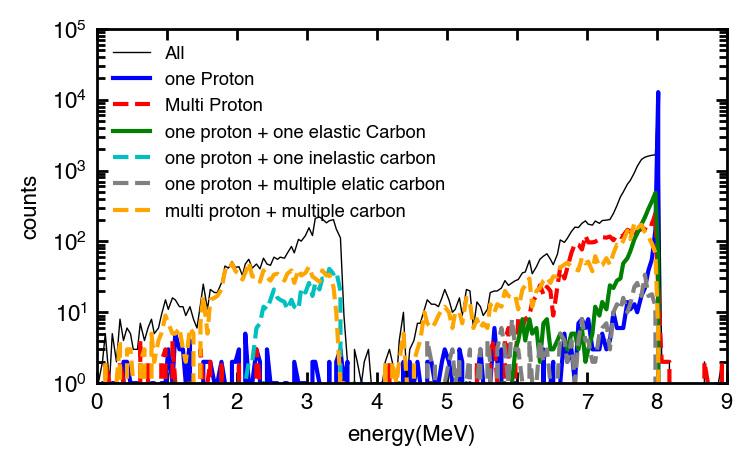

In [44]:
LOmask_Rec_U = C_data_80MeV['Rec_LO']>0
LOmask_U = C_data_80MeV['Tri_LO']>0
LOmask_L = C_data_80MeV['Tri_LO']<10

LOmask_SP   = C_data_80MeV['Tri_p_num']==1
LOmask_MS_L = C_data_80MeV['Tri_p_num']>1
LOmask_MS_U = C_data_80MeV['Tri_p_num']<50
LOmask_C_SP = C_data_80MeV['Tri_p_num']==101
LOmask_C_MS = C_data_80MeV['Tri_p_num']>101
LOmask_1P_MC_1 = C_data_80MeV['Tri_p_num']==201
LOmask_1P_MC_2 = C_data_80MeV['Tri_p_num']==301
LOmask_C_inlastic = C_data_80MeV['inelastic']==1
LOmask_C_elastic = C_data_80MeV['inelastic']==0

LO_data_80MeV         = C_data_80MeV[(LOmask_Rec_U&LOmask_U&LOmask_L)]
LO_data_80MeV_SP      = C_data_80MeV[(LOmask_Rec_U&LOmask_U&LOmask_L&LOmask_SP)]
LO_data_80MeV_MS      = C_data_80MeV[(LOmask_Rec_U&LOmask_U&LOmask_L&LOmask_MS_L&LOmask_MS_U)]
LO_data_80MeV_Proton_carbon_elastic    = C_data_80MeV[(LOmask_Rec_U&LOmask_U&LOmask_L&LOmask_C_SP&LOmask_C_elastic)]
LO_data_80MeV_Proton_carbon_inelastic    = C_data_80MeV[(LOmask_Rec_U&LOmask_U&LOmask_L&LOmask_C_SP&LOmask_C_inlastic)]
LO_data_80MeV_C_MS    = C_data_80MeV[(LOmask_Rec_U&LOmask_U&LOmask_L&LOmask_C_MS)]
LO_data_80MeV_1P_MC    = C_data_80MeV[(LOmask_Rec_U&LOmask_U&LOmask_L&LOmask_C_elastic&(LOmask_1P_MC_1|LOmask_1P_MC_2))]

bin =240
axis,y_80MeV_All   =sorting(LO_data_80MeV["Total_E"] ,bin,0,12)
axis,y_80MeV_SP    =sorting(LO_data_80MeV_SP["Total_E"] ,bin,0,12)
axis,y_80MeV_MS    =sorting(LO_data_80MeV_MS["Total_E"] ,bin,0,12)
axis,y_80MeV_P_C_e  =sorting(LO_data_80MeV_Proton_carbon_elastic["Total_E"] ,bin,0,12)
axis,y_80MeV_P_C_ine  =sorting(LO_data_80MeV_Proton_carbon_inelastic["Total_E"] ,bin,0,12)
axis,y_80MeV_C_MS  =sorting(LO_data_80MeV_C_MS["Total_E"] ,bin,0,12)
axis,y_80MeV_1P_MC  =sorting(LO_data_80MeV_1P_MC["Total_E"] ,bin,0,12)

fig = fig_pre_def(8,4.5,1)# 圖片大小
ax = fig.add_subplot(1, 1, 1)          # 產生1x1格圖片、在第一格
plt.plot(axis,y_80MeV_All,'-k',linewidth =0.5,label = 'All')
plt.plot(axis,y_80MeV_SP,'b',label = 'one Proton')
plt.plot(axis,y_80MeV_MS,'--r',label ='Multi Proton')
plt.plot(axis,y_80MeV_P_C_e,'-g',label ='one proton + one elastic Carbon')
plt.plot(axis,y_80MeV_P_C_ine,'--c',label ='one proton + one inelastic carbon')
plt.plot(axis,y_80MeV_1P_MC,'--',color='gray',label ='one proton + multiple elatic carbon')
plt.plot(axis,y_80MeV_C_MS-y_80MeV_1P_MC,'--',color='orange',label ='multi proton + multiple carbon')
#plt.plot(axis,y_80MeV_SP+y_80MeV_MS+y_80MeV_C_SP+y_80MeV_C_MS,'--c',label ='sum')

fig_post_def(xlim=(0,9)
             ,ylim=(1,100000)
             ,xlabel="energy(MeV)",ylabel="counts"
             #,xticks = (1,0.5),yticks = (0.2,0.1)
             ,lg_fs=6.6,n_col =1
             ) 
plt.yscale('log')

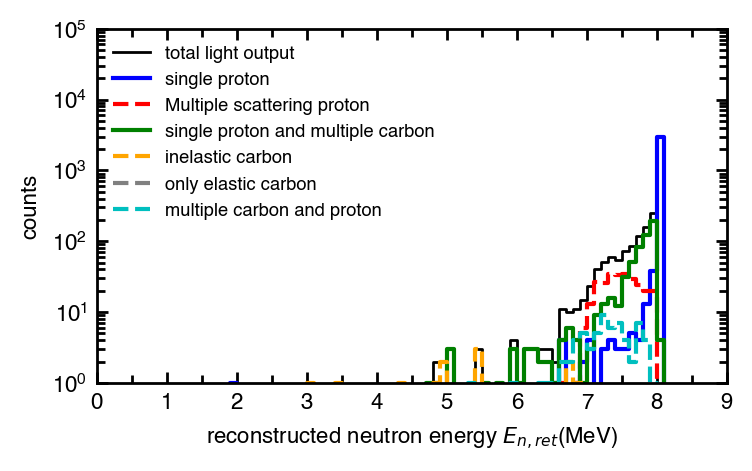

In [45]:
LOmask_Rec_E = C_data_80MeV["Tri_pE"]+C_data_80MeV["Rec_nE"]<8.01
LOmask_Rec_U = C_data_80MeV['Rec_LO']>0.5
LOmask_U = C_data_80MeV['Tri_LO']>0.125
LOmask_L = C_data_80MeV['Tri_LO']<10

LOmask_All = C_data_80MeV['Tri_p_num']>0
LOmask_SP   = C_data_80MeV['Tri_p_num']==1
LOmask_MS_L = C_data_80MeV['Tri_p_num']>1
LOmask_MS_U = C_data_80MeV['Tri_p_num']<100
LOmask_C = C_data_80MeV['Tri_p_num']==100
LOmask_C_SP = C_data_80MeV['Tri_p_num']==101
LOmask_C_MS = C_data_80MeV['Tri_p_num']>101
LOmask_C_MS_U = C_data_80MeV['Tri_p_num']<200
LOmask_C_1 = C_data_80MeV['Tri_p_num']==200
LOmask_1P_MC_1 = C_data_80MeV['Tri_p_num']==201
LOmask_1P_MC_1_L = C_data_80MeV['Tri_p_num']>201
LOmask_1P_MC_1_U = C_data_80MeV['Tri_p_num']<300
LOmask_C_2 = C_data_80MeV['Tri_p_num']==300
LOmask_1P_MC_2 = C_data_80MeV['Tri_p_num']==301
LOmask_1P_MC_2_L = C_data_80MeV['Tri_p_num']>301
LOmask_1P_MC_2_U = C_data_80MeV['Tri_p_num']<400
LOmask_C_3 = C_data_80MeV['Tri_p_num']==400
LOmask_1P_MC_3 = C_data_80MeV['Tri_p_num']==401
LOmask_1P_MC_3_L = C_data_80MeV['Tri_p_num']>401
LOmask_1P_MC_3_U = C_data_80MeV['Tri_p_num']<500
LOmask_C_4 = C_data_80MeV['Tri_p_num']==500
LOmask_1P_MC_4 = C_data_80MeV['Tri_p_num']==501
LOmask_1P_MC_4_L = C_data_80MeV['Tri_p_num']>501
LOmask_1P_MC_4_U = C_data_80MeV['Tri_p_num']<600
LOmask_C_inlastic = C_data_80MeV['inelastic']>=1
LOmask_C_elastic = C_data_80MeV['inelastic']==0

LO_data_80MeV         = C_data_80MeV[(LOmask_Rec_E&LOmask_Rec_U&LOmask_U&LOmask_L&LOmask_All)]
LO_data_80MeV_SP      = C_data_80MeV[(LOmask_Rec_E&LOmask_Rec_U&LOmask_U&LOmask_L&LOmask_SP&LOmask_C_elastic)]
LO_data_80MeV_MS      = C_data_80MeV[(LOmask_Rec_E&LOmask_Rec_U&LOmask_U&LOmask_L&LOmask_MS_L&LOmask_MS_U&LOmask_C_elastic)]
LO_data_80MeV_Proton_carbon_elastic = C_data_80MeV[(LOmask_Rec_E&LOmask_Rec_U&LOmask_U&LOmask_L&LOmask_C_elastic&(LOmask_C_SP|LOmask_1P_MC_1|LOmask_1P_MC_2|LOmask_1P_MC_3|LOmask_1P_MC_4))]
LO_data_80MeV_Proton_carbon_inelastic   = C_data_80MeV[(LOmask_Rec_U&LOmask_U&LOmask_L&LOmask_C_inlastic)]
LO_data_80MeV_C_MS    = C_data_80MeV[(LOmask_Rec_E&LOmask_Rec_U&LOmask_U&LOmask_L&LOmask_C_elastic&
                                      (LOmask_C_1|LOmask_C|LOmask_C_2|LOmask_C_3|LOmask_C_4|
                                       (LOmask_C_MS&LOmask_C_MS_U)|(LOmask_1P_MC_1_L&LOmask_1P_MC_1_U)|(LOmask_1P_MC_2_L&LOmask_1P_MC_2_U)
                                       |(LOmask_1P_MC_3_L&LOmask_1P_MC_3_U)|(LOmask_1P_MC_4_L&LOmask_1P_MC_4_U)))]
LO_data_80MeV_1P_MC   = C_data_80MeV[(LOmask_Rec_E&LOmask_Rec_U&LOmask_U&LOmask_L&LOmask_C_elastic&(LOmask_1P_MC_1|LOmask_1P_MC_2))]
LO_data_80MeV_Proton_carbon_inelastic   = C_data_80MeV[(LOmask_Rec_E&LOmask_Rec_U&LOmask_U&LOmask_L&LOmask_C_inlastic)]
LO_data_80MeV_Proton_carbon_elastic_only = C_data_80MeV[(LOmask_Rec_E&LOmask_Rec_U&LOmask_U&LOmask_L&LOmask_C_elastic&(LOmask_C|LOmask_C_1|LOmask_C_2|LOmask_C_3|LOmask_C_4))]

bin =120
axis,y_80MeV_All      =sorting(LO_data_80MeV["Total_E"] ,bin,0,12)
axis,y_80MeV_SP       =sorting(LO_data_80MeV_SP["Total_E"] ,bin,0,12)
axis,y_80MeV_MS       =sorting(LO_data_80MeV_MS["Total_E"] ,bin,0,12)
axis,y_80MeV_P_C_e    =sorting(LO_data_80MeV_Proton_carbon_elastic["Total_E"] ,bin,0,12)
axis,y_80MeV_P_C_ine  =sorting(LO_data_80MeV_Proton_carbon_inelastic["Total_E"] ,bin,0,12)
axis,y_80MeV_C_MS     =sorting(LO_data_80MeV_C_MS["Total_E"] ,bin,0,12)
axis,y_80MeV_1P_MC    =sorting(LO_data_80MeV_1P_MC["Total_E"] ,bin,0,12)
axis,y_80MeV_C_only    =sorting(LO_data_80MeV_Proton_carbon_elastic_only["Total_E"] ,bin,0,12)


bar_axis,bar_y_80MeV_All      =bar_plot(axis,y_80MeV_All    ,0.1)
bar_axis,bar_y_80MeV_SP       =bar_plot(axis,y_80MeV_SP     ,0.1)
bar_axis,bar_y_80MeV_MS       =bar_plot(axis,y_80MeV_MS     ,0.1)
bar_axis,bar_y_80MeV_P_C_e    =bar_plot(axis,y_80MeV_P_C_e  ,0.1)
bar_axis,bar_y_80MeV_P_C_ine  =bar_plot(axis,y_80MeV_P_C_ine,0.1)
bar_axis,bar_y_80MeV_C_MS     =bar_plot(axis,y_80MeV_C_MS   ,0.1)
bar_axis,bar_y_80MeV_1P_MC    =bar_plot(axis,y_80MeV_1P_MC  ,0.1)
bar_axis,bar_y_80MeV_C_only    =bar_plot(axis,y_80MeV_C_only  ,0.1)

fig = fig_pre_def(8,4.5,1)# 圖片大小
ax = fig.add_subplot(1, 1, 1)          # 產生1x1格圖片、在第一格
plt.plot(bar_axis,bar_y_80MeV_All,'-k',linewidth =1,label = 'total light output')
plt.plot(bar_axis,bar_y_80MeV_SP,'b',label = 'single proton')
plt.plot(bar_axis,bar_y_80MeV_MS,'--r',label ='Multiple scattering proton')
plt.plot(bar_axis,bar_y_80MeV_P_C_e,'-g',label ='single proton and multiple carbon')
plt.plot(bar_axis,bar_y_80MeV_P_C_ine,'--',color='orange',label ='inelastic carbon')
plt.plot(bar_axis,bar_y_80MeV_C_only ,'--',color='gray',label ='only elastic carbon')
plt.plot(bar_axis,bar_y_80MeV_C_MS ,'--c',label ='multiple carbon and proton')

bar_all = bar_y_80MeV_SP+bar_y_80MeV_MS+bar_y_80MeV_P_C_e+bar_y_80MeV_P_C_ine+bar_y_80MeV_C_MS
#plt.plot(bar_axis,bar_all,'-',color='orange',label ='All_test')


#plt.plot(bar_axis,bar_y_80MeV_1P_MC,'--',color='gray',label ='one proton + multiple elatic carbon')
#plt.plot(bar_axis,bar_y_80MeV_C_MS-bar_y_80MeV_1P_MC,'--',color='orange',label ='multi proton + multiple carbon')
#plt.plot(axis,y_80MeV_SP+y_80MeV_MS+y_80MeV_C_SP+y_80MeV_C_MS,'--c',label ='sum')

fig_post_def(xlim=(0,9),xticks=(1,0.5)
             ,ylim=(1,100000)
             ,xlabel="reconstructed neutron energy $E_{n,ret}$(MeV)",ylabel="counts"
             #,xticks = (1,0.5),yticks = (0.2,0.1)
             ,lg_fs=6.6,n_col =1
             ) 
plt.yscale('log')

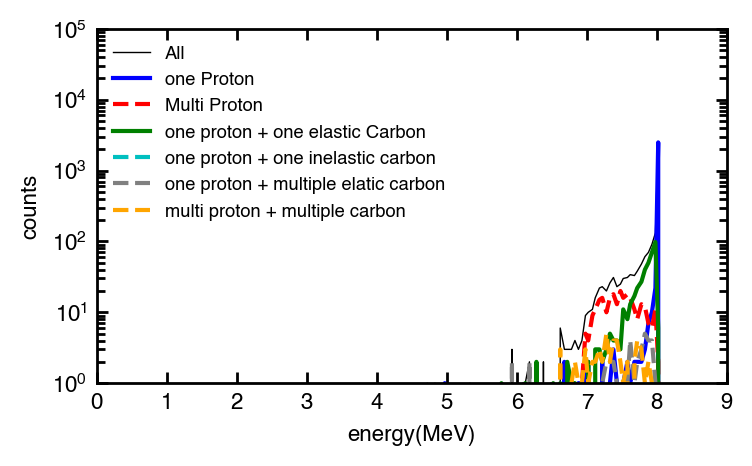

In [46]:
LOmask_Rec_U = C_data_80MeV['Rec_LO']>0.5
LOmask_U = C_data_80MeV['Tri_LO']>0.5
LOmask_L = C_data_80MeV['Tri_LO']<10

LOmask_SP   = C_data_80MeV['Tri_p_num']==1
LOmask_MS_L = C_data_80MeV['Tri_p_num']>1
LOmask_MS_U = C_data_80MeV['Tri_p_num']<50
LOmask_C_SP = C_data_80MeV['Tri_p_num']==101
LOmask_C_MS = C_data_80MeV['Tri_p_num']>101
LOmask_1P_MC_1 = C_data_80MeV['Tri_p_num']==201
LOmask_1P_MC_2 = C_data_80MeV['Tri_p_num']==301
LOmask_C_inlastic = C_data_80MeV['inelastic']==1
LOmask_C_elastic = C_data_80MeV['inelastic']==0

LO_data_80MeV         = C_data_80MeV[(LOmask_Rec_U&LOmask_U&LOmask_L)]
LO_data_80MeV_SP      = C_data_80MeV[(LOmask_Rec_U&LOmask_U&LOmask_L&LOmask_SP)]
LO_data_80MeV_MS      = C_data_80MeV[(LOmask_Rec_U&LOmask_U&LOmask_L&LOmask_MS_L&LOmask_MS_U)]
LO_data_80MeV_Proton_carbon_elastic    = C_data_80MeV[(LOmask_Rec_U&LOmask_U&LOmask_L&LOmask_C_SP&LOmask_C_elastic)]
LO_data_80MeV_Proton_carbon_inelastic    = C_data_80MeV[(LOmask_Rec_U&LOmask_U&LOmask_L&LOmask_C_SP&LOmask_C_inlastic)]
LO_data_80MeV_C_MS    = C_data_80MeV[(LOmask_Rec_U&LOmask_U&LOmask_L&LOmask_C_MS)]
LO_data_80MeV_1P_MC    = C_data_80MeV[(LOmask_Rec_U&LOmask_U&LOmask_L&LOmask_C_elastic&(LOmask_1P_MC_1|LOmask_1P_MC_2))]

bin =240
axis,y_80MeV_All   =sorting(LO_data_80MeV["Total_E"] ,bin,0,12)
axis,y_80MeV_SP    =sorting(LO_data_80MeV_SP["Total_E"] ,bin,0,12)
axis,y_80MeV_MS    =sorting(LO_data_80MeV_MS["Total_E"] ,bin,0,12)
axis,y_80MeV_P_C_e  =sorting(LO_data_80MeV_Proton_carbon_elastic["Total_E"] ,bin,0,12)
axis,y_80MeV_P_C_ine  =sorting(LO_data_80MeV_Proton_carbon_inelastic["Total_E"] ,bin,0,12)
axis,y_80MeV_C_MS  =sorting(LO_data_80MeV_C_MS["Total_E"] ,bin,0,12)
axis,y_80MeV_1P_MC  =sorting(LO_data_80MeV_1P_MC["Total_E"] ,bin,0,12)

fig = fig_pre_def(8,4.5,1)# 圖片大小
ax = fig.add_subplot(1, 1, 1)          # 產生1x1格圖片、在第一格
plt.plot(axis,y_80MeV_All,'-k',linewidth =0.5,label = 'All')
plt.plot(axis,y_80MeV_SP,'b',label = 'one Proton')
plt.plot(axis,y_80MeV_MS,'--r',label ='Multi Proton')
plt.plot(axis,y_80MeV_P_C_e,'-g',label ='one proton + one elastic Carbon')
plt.plot(axis,y_80MeV_P_C_ine,'--c',label ='one proton + one inelastic carbon')
plt.plot(axis,y_80MeV_1P_MC,'--',color='gray',label ='one proton + multiple elatic carbon')
plt.plot(axis,y_80MeV_C_MS-y_80MeV_1P_MC,'--',color='orange',label ='multi proton + multiple carbon')
#plt.plot(axis,y_80MeV_SP+y_80MeV_MS+y_80MeV_C_SP+y_80MeV_C_MS,'--c',label ='sum')

fig_post_def(xlim=(0,9)
             ,ylim=(1,100000)
             ,xlabel="energy(MeV)",ylabel="counts"
             #,xticks = (1,0.5),yticks = (0.2,0.1)
             ,lg_fs=6.6,n_col =1
             ) 
plt.yscale('log')

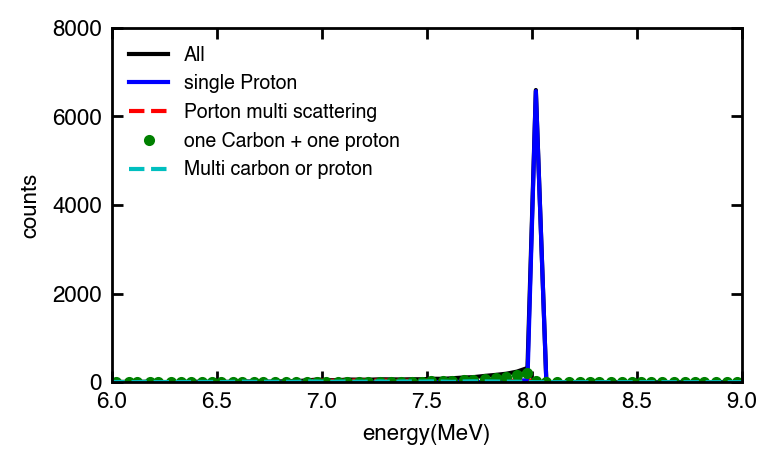

In [47]:
LOmask_Rec_U = C_data_80MeV['Rec_LO']>0.125
LOmask_U = C_data_80MeV['Tri_LO']>0.125
LOmask_L = C_data_80MeV['Tri_LO']<5

LOmask_SP   = C_data_80MeV['Tri_p_num']==1
LOmask_MS_L = C_data_80MeV['Tri_p_num']>1
LOmask_MS_U = C_data_80MeV['Tri_p_num']<20
LOmask_C_SP = C_data_80MeV['Tri_p_num']==101
LOmask_C_MS = C_data_80MeV['Tri_p_num']>101
LO_data_80MeV         = C_data_80MeV[(LOmask_Rec_U&LOmask_U&LOmask_L)]
LO_data_80MeV_SP      = C_data_80MeV[(LOmask_Rec_U&LOmask_U&LOmask_L&LOmask_SP)]
LO_data_80MeV_MS      = C_data_80MeV[(LOmask_Rec_U&LOmask_U&LOmask_L&LOmask_MS_L&LOmask_MS_U)]
LO_data_80MeV_C_SP    = C_data_80MeV[(LOmask_Rec_U&LOmask_U&LOmask_L&LOmask_C_SP)]
LO_data_80MeV_C_MS    = C_data_80MeV[(LOmask_Rec_U&LOmask_U&LOmask_L&LOmask_C_MS)]

bin =240
axis,y_80MeV_All   =sorting(LO_data_80MeV["Total_E"] ,bin,0,12)
axis,y_80MeV_SP    =sorting(LO_data_80MeV_SP["Total_E"] ,bin,0,12)
axis,y_80MeV_MS    =sorting(LO_data_80MeV_MS["Total_E"] ,bin,0,12)
axis,y_80MeV_C_SP  =sorting(LO_data_80MeV_C_SP["Total_E"] ,bin,0,12)
axis,y_80MeV_C_MS  =sorting(LO_data_80MeV_C_MS["Total_E"] ,bin,0,12)

fig = fig_pre_def(8,4.5,1)# 圖片大小
ax = fig.add_subplot(1, 1, 1)          # 產生1x1格圖片、在第一格
plt.plot(axis,y_80MeV_All,'k',label = 'All')
plt.plot(axis,y_80MeV_SP,'b',label = 'single Proton')
plt.plot(axis,y_80MeV_MS,'--r',label ='Porton multi scattering')
plt.plot(axis,y_80MeV_C_SP,'.g',label ='one Carbon + one proton')
plt.plot(axis,y_80MeV_C_MS,'--c',label ='Multi carbon or proton')
#plt.plot(axis,y_80MeV_SP+y_80MeV_MS+y_80MeV_C_SP+y_80MeV_C_MS,'--c',label ='sum')

fig_post_def(xlim=(6,9)
             ,ylim=(0,8000)
             ,xlabel="energy(MeV)",ylabel="counts"
             #,xticks = (1,0.5),yticks = (0.2,0.1)
             ,lg_fs=7,n_col =1
             ) 
#plt.yscale('log')

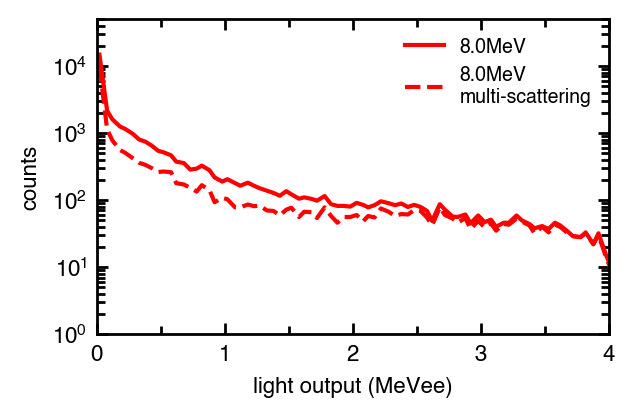

In [423]:
fig = fig_pre_def(6.5,4,1)# 圖片大小
ax = fig.add_subplot(1, 1, 1)          # 產生1x1格圖片、在第一格

for i in np.arange(10,130,10):
    mask_diff = globals()["C_data_80MeV"]["Tri_p_num"]>1
    globals()["C_data_80MeV_ex_SC"]=globals()["C_data_80MeV"][mask_diff]
    
    axis,globals()["y_C_data_80MeV_ex_SC"]=sorting(globals()["C_data_80MeV_ex_SC"]["Rec_LO"] ,240,0,12)
    axis,globals()["y_C_data_80MeV"]=sorting(globals()["C_data_80MeV"]["Rec_LO"] ,240,0,12)
    #globals()["y_"+str(i)+"MeV_LO"]         = ER_function_improve(axis,axis,globals()["y_"+str(i)+"MeV"],0.113,0.065,0.06)#,3.245e-02 , 5.701e-02 , 1.084e-01)
    #globals()["y_"+str(i)+"MeV_scatter_LO"] = ER_function_improve(axis,axis,globals()["y_"+str(i)+"MeV_scatter"],0.113,0.065,0.06)#,3.245e-02 , 5.701e-02 , 1.084e-01)
    
i=80
plt.plot(axis,globals()["y_C_data_80MeV"],'r',label=str(i/10)+"MeV")
plt.plot(axis,globals()["y_C_data_80MeV_ex_SC"],'--r',label=str(i/10)+"MeV\nmulti-scattering")
      
fig_post_def(xlim=(0,4),xticks = (1,0.5)#,ylim=(0,500)
             ,lg_fs=7,n_col =1
             
             ,xlabel="light output (MeVee)",ylabel="counts")  
plt.yscale('log')
plt.ylim(1,50000)
plt.savefig('/Users/thlin/Dropbox/Research/Publication/2023 NSTOF/Figure/Python_export/Fig3_rec_LO.svg', format="svg")

In [84]:
print(LO_data_80MeV_SP.head())
print(LO_data_80MeV_C_SP.head())

    core  counts    Tri_LO   Tri_pE   Rec_nE    Rec_LO  Tri_p_num  inelastic  \
21   0.0    22.0  0.730671  2.44729  5.55404  1.595710        1.0        0.0   
23   0.0    24.0  1.911800  4.83298  3.16964  0.781608        1.0        0.0   
44   0.0    45.0  1.575330  4.20114  3.80114  0.811740        1.0        0.0   
46   0.0    47.0  1.105120  3.26591  4.73586  0.517174        1.0        0.0   
48   0.0    49.0  1.967170  4.93481  3.06786  0.577797        1.0        0.0   

    carbon_LO  Recoil_p_E  Recoil_p_E_diff   Total_E  
21        0.0    2.447286         0.999998  8.001326  
23        0.0    4.832982         1.000000  8.002622  
44        0.0    4.201139         1.000000  8.002279  
46        0.0    3.265909         1.000000  8.001769  
48        0.0    4.934816         1.000001  8.002676  
     core  counts    Tri_LO   Tri_pE   Rec_nE    Rec_LO  Tri_p_num  inelastic  \
16    0.0    17.0  1.003950  3.07035  4.93131  1.018100      101.0        0.0   
71    0.0    72.0  1.614390

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


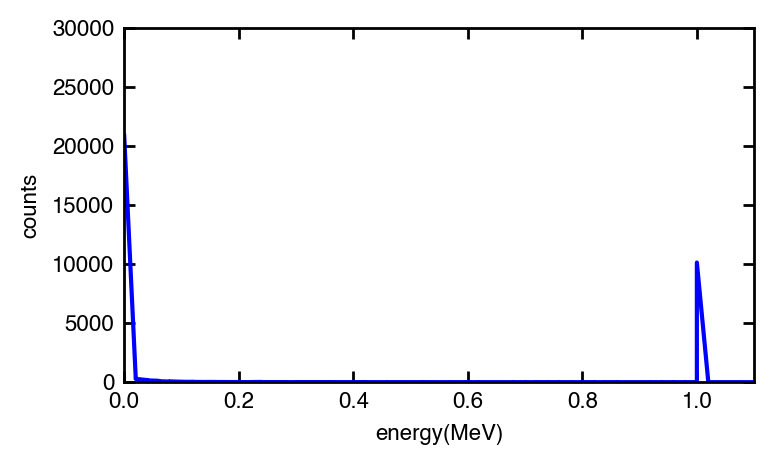

In [100]:
C_data_80MeV_ratio = C_data_80MeV.copy()
C_data_80MeV_ratio['C_ratio'] = C_data_80MeV['carbon_LO']/C_data_80MeV['Tri_LO']

fig = fig_pre_def(8,4.5,1)# 圖片大小
ax = fig.add_subplot(1, 1, 1)          # 產生1x1格圖片、在第一格

axis,y_LO_ratio  =sorting(C_data_80MeV_ratio['C_ratio']  ,120,0,1.2)
plt.plot(axis,y_LO_ratio,'b')
fig_post_def(xlim=(0,1.1)
             ,ylim=(0,30000)
             ,xlabel="energy(MeV)",ylabel="counts"
             #,xticks = (1,0.5),yticks = (0.2,0.1)
             ,lg_fs=7,n_col =1
             ) 


In [101]:
Rmask = C_data_80MeV_ratio['C_ratio'] >0.9
C_data_80MeV_R = C_data_80MeV_ratio[(Rmask)]
print(C_data_80MeV_R)


       core  counts    Tri_LO    Tri_pE   Rec_nE    Rec_LO  Tri_p_num  \
0       0.0     1.0  0.007836  0.460929  7.53924  0.018545      100.0   
2       0.0     3.0  0.005223  0.307253  7.69286  0.007389      100.0   
3       0.0     4.0  0.001549  0.091130  7.90890  0.003717      100.0   
5       0.0     6.0  0.015522  0.913077  2.61704  0.406747      100.0   
10      0.0    11.0  0.004253  0.250195  7.74990  0.033731      100.0   
...     ...     ...       ...       ...      ...       ...        ...   
32813  31.0   994.0  0.003233  0.190148  7.80992  2.412290      100.0   
32814  31.0   995.0  0.006917  0.406897  7.56263  0.006437      100.0   
32815  31.0   996.0  0.002838  0.166953  7.83311  3.501450      100.0   
32816  31.0   997.0  0.000804  0.047304  7.95271  3.709240      100.0   
32821  31.0  1002.0  0.001662  0.097771  7.90226  0.796175      100.0   

       inelastic  carbon_LO  Recoil_p_E  Recoil_p_E_diff   Total_E  C_ratio  
0            0.0   0.007836    0.091479      

In [110]:
Emask_U = C_data_80MeV['Total_E']<4
Emask_L = C_data_80MeV['Total_E']>3
C_data_80MeV_3 = C_data_80MeV[(Emask_U&Emask_L)]
print(C_data_80MeV_3)

       core  counts    Tri_LO    Tri_pE   Rec_nE    Rec_LO  Tri_p_num  \
60      0.0    61.0  0.001986  0.116802  3.44851  0.015006      100.0   
76      0.0    77.0  0.011280  0.663531  2.92367  0.034326      100.0   
80      0.0    81.0  0.004822  0.283669  3.30801  0.844559      200.0   
89      0.0    90.0  0.005934  0.349050  3.22682  0.222682      100.0   
108     0.0   109.0  0.005151  0.303002  3.29178  0.014530      100.0   
...     ...     ...       ...       ...      ...       ...        ...   
32714  31.0   895.0  0.010349  0.608764  2.92033  0.608064      100.0   
32720  31.0   901.0  0.004646  0.273278  3.25994  0.025115      100.0   
32745  31.0   926.0  0.006894  0.405542  3.12784  0.721240      100.0   
32787  31.0   968.0  0.486701  2.141110  1.44060  0.148783      201.0   
32790  31.0   971.0  0.002015  0.118551  3.45036  1.031260      100.0   

       inelastic  carbon_LO  Recoil_p_E  Recoil_p_E_diff   Total_E  
60           1.0   0.001986    0.032060         0.2744

In [117]:
np.cos(np.radians(60))

0.5000000000000001

In [120]:
def recoil_energy(E,A,degree):
    deg = np.radians(degree)
    E_scattered = E*((np.cos(deg)+(A**2-np.sin(deg)**2)**0.5)/(A+1))**2
    return(E_scattered)

In [134]:
print(recoil_energy(8,12,80))

6.968700856606119


32834
17763


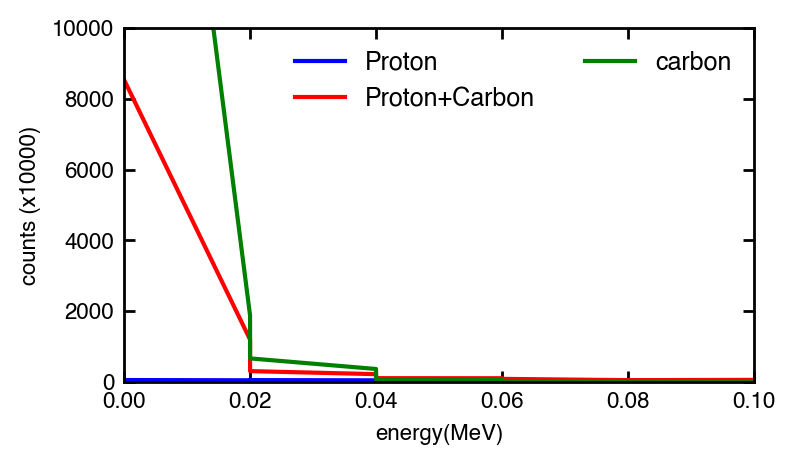

In [ ]:
print(sum(C_y_80MeV))
print(sum(y_80MeV))

#Cmask = C_data_80MeV
#    globals()["mask_"+str(int(i))+"MeV_rec"] =  globals()["dataE_"+str(int(i))+"MeV"]['carbon_light']>rec_LO_threshold
#    globals()["pro_"+str(int(i))+"MeV"] = globals()["dataE_"+str(int(i))+"MeV"][(globals()["mask_"+str(int(i))+"MeV_tri"]&globals()["mask_"+str(int(i))+"MeV_rec"])]
fig = fig_pre_def(8,4.5,1)# 圖片大小
ax = fig.add_subplot(1, 1, 1)          # 產生1x1格圖片、在第一格
plt.plot(axis,y_80MeV,'b',label = 'Proton')
plt.plot(axis,C_y_80MeV,'r',label ='Proton+Carbon')

plt.plot(axis,C_LO_y_80MeV,'g',label = 'carbon')

fig_post_def(xlim=(0,0.1),ylim=(0,10000)
             ,xlabel="energy(MeV)",ylabel="counts (x"+str(divider)+")"
             #,xticks = (1,0.5),yticks = (0.2,0.1)
             ,lg_fs=9,n_col =2
             ) 

In [ ]:
axis,E_y_80MeV=sorting(globals()["data_80MeV"][''] ,1200,0,12)
plt.plot()

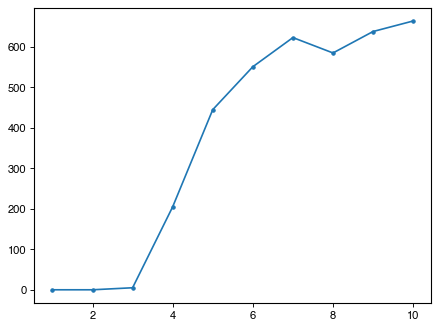

In [ ]:
output_effeciency = np.arange(1,11,1)[:,np.newaxis]
output_effeciency = np.column_stack((output_effeciency,eff[:,np.newaxis]))
plt.plot(output_effeciency[:,0],output_effeciency[:,1],'.-')

# Inelastic scattering equation

In [432]:
def En_inelastic(E,A,degree):
    deg =np.radians(degree)
    Q =-4.439
    E_n1 = ((1/(A+1))*(np.cos(deg)*(E**0.5)+((E*(np.cos(deg)**2+A**2-1))+A*(A+1)*Q)**0.5))**2
    E_n1_2 = ((1/(A+1))*(np.cos(deg)*(E**0.5)-((E*(np.cos(deg)**2+A**2-1))+A*(A+1)*Q)**0.5))**2
    return E_n1, E_n1_2

In [433]:
En_inelastic(10,12,60)

(4.902604631044434, 3.8845669665887024)

In [128]:
deg =np.radians(60)
print(np.cos(deg))

0.5000000000000001


In [ ]:
def recoil_energy(E,A,degree):
    deg = np.radians(degree)
    E_scattered = E*((np.cos(deg)+(A**2-np.sin(deg)**2)**0.5)/(A+1))**2
    return(E_scattered)

In [316]:
data_80MeV=[]
i=27.0
for ii in np.arange(0,32,1):
    if ii ==0:
        globals()["C_data_"+str(int(i*10))+"MeV"]= pd.read_csv("../../../../data/NSTOF_simulation_mono_Energy/Output202405_BERT_HP_simulation_60deg_mono_E_2E9/202404_BERT_C_EJ309_N_scatter_exp_60deg_2E9_All_in_one_"+str(i)+"MeV_"+str(int(ii))+".txt", sep="\s+", header=None)
    else:
        temp = pd.read_csv("../../../../data/NSTOF_simulation_mono_Energy/output202405_BERT_HP_simulation_60deg_mono_E_2E9/202404_BERT_C_EJ309_N_scatter_exp_60deg_2E9_All_in_one_"+str(i)+"MeV_"+str(int(ii))+".txt", sep="\s+", header=None)
        globals()["C_data_"+str(int(i*10))+"MeV"] = np.vstack((globals()["data_"+str(int(i*10))+"MeV"],temp))
i=270
globals()["C_data_"+str(int(i))+"MeV"] = pd.DataFrame(globals()["data_"+str(int(i))+"MeV"],columns=["core","counts","Tri_LO","Tri_pE","Rec_nE","Rec_LO","Tri_p_num","inelastic","carbon_LO"])


In [319]:
globals()["C_data_270MeV"] = globals()["C_data_"+str(int(i))+"MeV"].copy()
globals()["C_data_270MeV"]["Recoil_p_E"] = globals()["C_data_"+str(int(i))+"MeV"]['Tri_LO'].apply(lambda x:P_Energy_inter[int(x*100000)])
globals()["C_data_270MeV"]["Recoil_p_E_diff"] = globals()["C_data_"+str(int(i))+"MeV"]['Recoil_p_E']/globals()["C_data_"+str(int(i))+"MeV"]['Tri_pE']
globals()["C_data_270MeV"]["Total_E"] = globals()["C_data_"+str(int(i))+"MeV"]['Rec_nE']+globals()["C_data_"+str(int(i))+"MeV"]['Recoil_p_E']
maskT = C_data_270MeV['Rec_nE']>0.0
CT_data_270MeV = C_data_270MeV[maskT]
axis,C_y_270MeV=sorting(globals()["CT_data_270MeV"]["Tri_LO"] ,1200,0,12)
axis,C_LO_y_270MeV=sorting(globals()["C_data_270MeV"]["carbon_LO"] ,1200,0,12)
axis,CT_y_270MeV=sorting(globals()["CT_data_270MeV"]["Tri_LO"] ,1200,0,12)

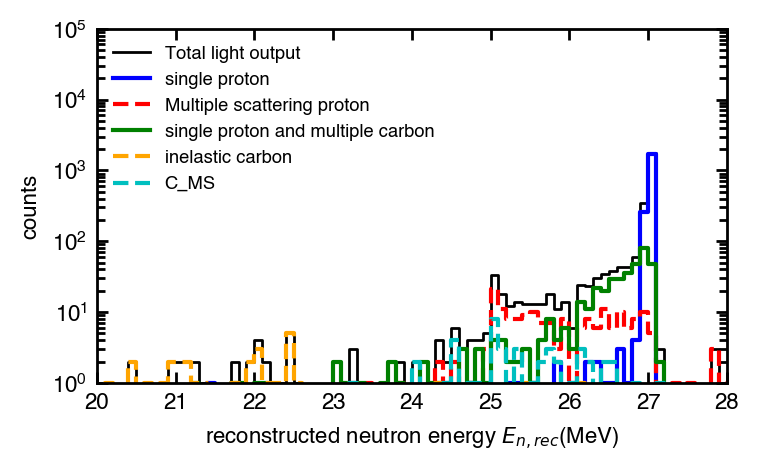

In [333]:
LOmask_Rec_E = C_data_270MeV["Tri_pE"]+C_data_270MeV["Rec_nE"]<30
LOmask_Rec_U = C_data_270MeV['Rec_LO']>0.125
LOmask_U = C_data_270MeV['Tri_LO']>0.125
LOmask_L = C_data_270MeV['Tri_LO']<30

LOmask_All  = C_data_270MeV['Tri_p_num']>0
LOmask_SP   = C_data_270MeV['Tri_p_num']==1
LOmask_MS_L = C_data_270MeV['Tri_p_num']>1
LOmask_MS_U = C_data_270MeV['Tri_p_num']<100
LOmask_C    = C_data_270MeV['Tri_p_num']==100
LOmask_C_SP = C_data_270MeV['Tri_p_num']==101
LOmask_C_MS = C_data_270MeV['Tri_p_num']>101
LOmask_C_MS_U = C_data_270MeV['Tri_p_num']<200
LOmask_C_1 = C_data_270MeV['Tri_p_num']==200
LOmask_1P_MC_1 = C_data_270MeV['Tri_p_num']==201
LOmask_1P_MC_1_L = C_data_270MeV['Tri_p_num']>201
LOmask_1P_MC_1_U = C_data_270MeV['Tri_p_num']<300
LOmask_C_2 = C_data_270MeV['Tri_p_num']==300
LOmask_1P_MC_2 = C_data_270MeV['Tri_p_num']==301
LOmask_1P_MC_2_L = C_data_270MeV['Tri_p_num']>301
LOmask_1P_MC_2_U = C_data_270MeV['Tri_p_num']<400
LOmask_C_3 = C_data_270MeV['Tri_p_num']==400
LOmask_1P_MC_3 = C_data_270MeV['Tri_p_num']==401
LOmask_1P_MC_3_L = C_data_270MeV['Tri_p_num']>401
LOmask_1P_MC_3_U = C_data_270MeV['Tri_p_num']<500
LOmask_C_4 = C_data_270MeV['Tri_p_num']==500
LOmask_1P_MC_4 = C_data_270MeV['Tri_p_num']==501
LOmask_1P_MC_4_L = C_data_270MeV['Tri_p_num']>501
LOmask_1P_MC_4_U = C_data_270MeV['Tri_p_num']<600
LOmask_C_inlastic = C_data_270MeV['inelastic']>=1
LOmask_C_elastic = C_data_270MeV['inelastic']==0

LO_data_270MeV         = C_data_270MeV[(LOmask_Rec_E&LOmask_Rec_U&LOmask_U&LOmask_L&LOmask_All)]
LO_data_270MeV_SP      = C_data_270MeV[(LOmask_Rec_E&LOmask_Rec_U&LOmask_U&LOmask_L&LOmask_SP&LOmask_C_elastic)]
LO_data_270MeV_MS      = C_data_270MeV[(LOmask_Rec_E&LOmask_Rec_U&LOmask_U&LOmask_L&LOmask_MS_L&LOmask_MS_U&LOmask_C_elastic)]
LO_data_270MeV_Proton_carbon_elastic = C_data_270MeV[(LOmask_Rec_E&LOmask_Rec_U&LOmask_U&LOmask_L&LOmask_C_elastic&(LOmask_C_SP|LOmask_1P_MC_1|LOmask_1P_MC_2|LOmask_1P_MC_3|LOmask_1P_MC_4))]
LO_data_270MeV_Proton_carbon_inelastic   = C_data_270MeV[(LOmask_Rec_U&LOmask_U&LOmask_L&LOmask_C_inlastic)]
LO_data_270MeV_C_MS    = C_data_270MeV[(LOmask_Rec_E&LOmask_Rec_U&LOmask_U&LOmask_L&LOmask_C_elastic&
                                      (LOmask_C_1|LOmask_C|LOmask_C_2|LOmask_C_3|LOmask_C_4|
                                       (LOmask_C_MS&LOmask_C_MS_U)|(LOmask_1P_MC_1_L&LOmask_1P_MC_1_U)|(LOmask_1P_MC_2_L&LOmask_1P_MC_2_U)
                                       |(LOmask_1P_MC_3_L&LOmask_1P_MC_3_U)|(LOmask_1P_MC_4_L&LOmask_1P_MC_4_U)))]
LO_data_270MeV_1P_MC   = C_data_270MeV[(LOmask_Rec_E&LOmask_Rec_U&LOmask_U&LOmask_L&LOmask_C_elastic&(LOmask_1P_MC_1|LOmask_1P_MC_2))]
LO_data_270MeV_Proton_carbon_inelastic   = C_data_270MeV[(LOmask_Rec_E&LOmask_Rec_U&LOmask_U&LOmask_L&LOmask_C_inlastic)]
LO_data_270MeV_Proton_carbon_elastic_only = C_data_270MeV[(LOmask_Rec_E&LOmask_Rec_U&LOmask_U&LOmask_L&LOmask_C_elastic&(LOmask_C|LOmask_C_1|LOmask_C_2|LOmask_C_3|LOmask_C_4))]

bin =300
axis,y_270MeV_All      =sorting(LO_data_270MeV["Total_E"] ,bin,0,30)
axis,y_270MeV_SP       =sorting(LO_data_270MeV_SP["Total_E"] ,bin,0,30)
axis,y_270MeV_MS       =sorting(LO_data_270MeV_MS["Total_E"] ,bin,0,30)
axis,y_270MeV_P_C_e    =sorting(LO_data_270MeV_Proton_carbon_elastic["Total_E"] ,bin,0,30)
axis,y_270MeV_P_C_ine  =sorting(LO_data_270MeV_Proton_carbon_inelastic["Total_E"] ,bin,0,30)
axis,y_270MeV_C_MS     =sorting(LO_data_270MeV_C_MS["Total_E"] ,bin,0,30)
axis,y_270MeV_1P_MC    =sorting(LO_data_270MeV_1P_MC["Total_E"] ,bin,0,30)
axis,y_270MeV_C_only   =sorting(LO_data_270MeV_Proton_carbon_elastic_only["Total_E"] ,bin,0,30)


bar_axis,bar_y_270MeV_All      =bar_plot(axis,y_270MeV_All    ,0.1)
bar_axis,bar_y_270MeV_SP       =bar_plot(axis,y_270MeV_SP     ,0.1)
bar_axis,bar_y_270MeV_MS       =bar_plot(axis,y_270MeV_MS     ,0.1)
bar_axis,bar_y_270MeV_P_C_e    =bar_plot(axis,y_270MeV_P_C_e  ,0.1)
bar_axis,bar_y_270MeV_P_C_ine  =bar_plot(axis,y_270MeV_P_C_ine,0.1)
bar_axis,bar_y_270MeV_C_MS     =bar_plot(axis,y_270MeV_C_MS   ,0.1)
bar_axis,bar_y_270MeV_1P_MC    =bar_plot(axis,y_270MeV_1P_MC  ,0.1)
bar_axis,bar_y_270MeV_C_only    =bar_plot(axis,y_270MeV_C_only  ,0.1)

fig = fig_pre_def(8,4.5,1)# 圖片大小
ax = fig.add_subplot(1, 1, 1)          # 產生1x1格圖片、在第一格
plt.plot(bar_axis,bar_y_270MeV_All,'-k',linewidth =1,label = 'Total light output')
plt.plot(bar_axis,bar_y_270MeV_SP,'b',label = 'single proton')
plt.plot(bar_axis,bar_y_270MeV_MS,'--r',label ='Multiple scattering proton')
plt.plot(bar_axis,bar_y_270MeV_P_C_e,'-g',label ='single proton and multiple carbon')
plt.plot(bar_axis,bar_y_270MeV_P_C_ine,'--',color='orange',label ='inelastic carbon')
plt.plot(bar_axis,bar_y_270MeV_C_MS ,'--c',label ='C_MS')
#plt.plot(bar_axis,bar_y_270MeV_C_only ,'--k',label ='C')
bar_all = bar_y_80MeV_SP+bar_y_80MeV_MS+bar_y_80MeV_P_C_e+bar_y_80MeV_P_C_ine+bar_y_80MeV_C_MS
#plt.plot(bar_axis,bar_all,'-',color='orange',label ='All_test')


#plt.plot(bar_axis,bar_y_80MeV_1P_MC,'--',color='gray',label ='one proton + multiple elatic carbon')
#plt.plot(bar_axis,bar_y_80MeV_C_MS-bar_y_80MeV_1P_MC,'--',color='orange',label ='multi proton + multiple carbon')
#plt.plot(axis,y_80MeV_SP+y_80MeV_MS+y_80MeV_C_SP+y_80MeV_C_MS,'--c',label ='sum')

fig_post_def(xlim=(20,28)
             ,ylim=(1,100000)
             ,xlabel="reconstructed neutron energy $E_{n,rec}$(MeV)",ylabel="counts"
             #,xticks = (1,0.5),yticks = (0.2,0.1)
             ,lg_fs=6.6,n_col =1
             ) 
plt.yscale('log')